1) IMPORTING THE LIBRARIES

# **1) IMPORTING THE LIBRARIES**

In [1]:
# ============================================
# DIMENSIONALITY REDUCTION - STUDENT GRADES ANALYSIS
# ============================================

# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')

# Visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✅ All libraries imported successfully!")


✅ All libraries imported successfully!


# **2) UPLOADING DATA SET**

In [2]:
# 2. LOAD DATASET
file_name = 'student_grades.csv'
df = pd.read_csv(file_name)
print(f"Shape: {df.shape} (rows, columns)")
print(f"Columns: {list(df.columns)}")
subject_names = ['Mathematics', 'Science', 'Computer Science', 'Band',
                 'English', 'History', 'Spanish', 'Physical Education']
subject_cols = ['math', 'science', 'cs', 'band', 'english', 'history', 'spanish', 'physed']
df['stem_avg'] = df[['math', 'science', 'cs']].mean(axis=1)
df['humanities_avg'] = df[['english', 'history', 'spanish']].mean(axis=1)
df['overall_avg'] = df[subject_cols].mean(axis=1)

Shape: (100, 9) (rows, columns)
Columns: ['student_id', 'math', 'science', 'cs', 'band', 'english', 'history', 'spanish', 'physed']


# **3) EXPLORATORY DATA ANALYSIS**

#  3.1 -> UNIVARIATE ANALYSIS
                           
        3.1.1 Histograms with KDE

3.1.1 Histograms with KDE Distribution
----------------------------------------


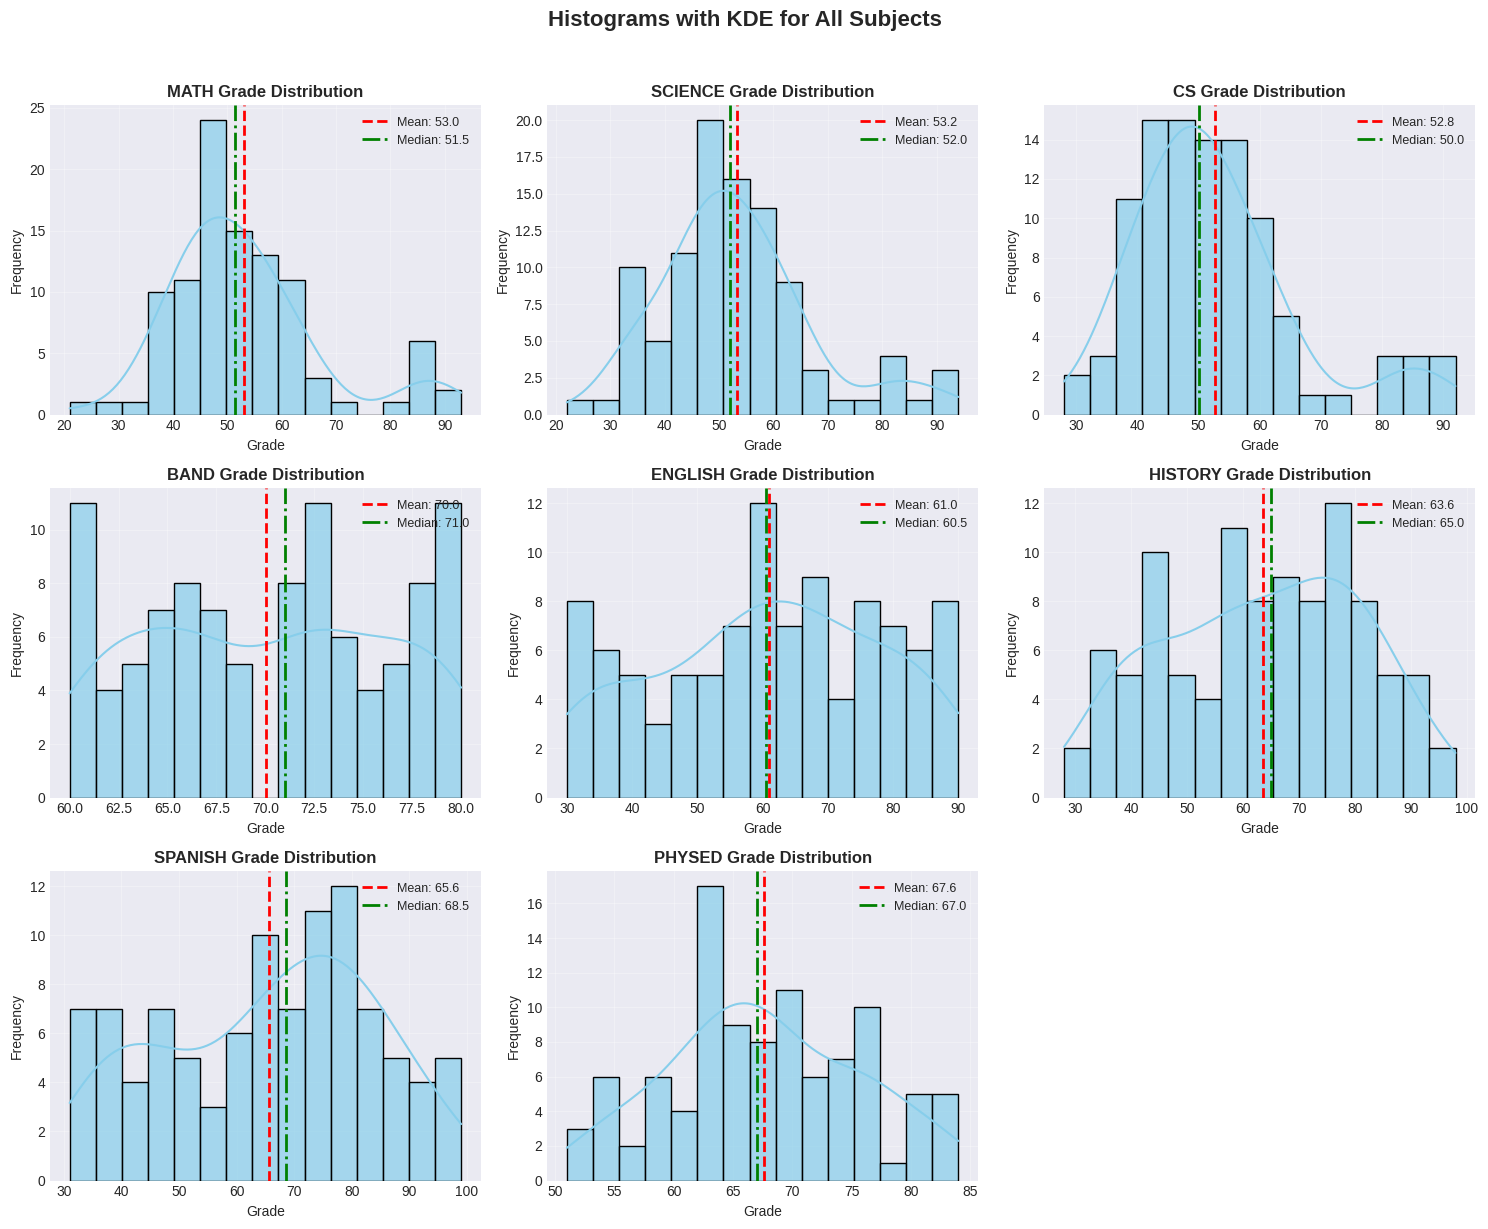

📊 Basic Insights from Histograms:
   - Band shows the most symmetric distribution
   - Math and Science show slight left skew
   - Most subjects have mean ≈ median (normal distribution)


In [ ]:
# ============================================
# 3.1.1 Histograms with KDE for all subjects
# ============================================

print("3.1.1 Histograms with KDE Distribution")
print("-" * 40)

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, subject in enumerate(subjects):
    ax = axes[idx]

    # Histogram with KDE
    sns.histplot(df[subject], bins=15, kde=True, ax=ax, color='skyblue', alpha=0.7)
    ax.axvline(df[subject].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df[subject].mean():.1f}')
    ax.axvline(df[subject].median(), color='green', linestyle='-.', linewidth=2, label=f'Median: {df[subject].median():.1f}')

    ax.set_title(f'{subject.upper()} Grade Distribution', fontsize=12, fontweight='bold')
    ax.set_xlabel('Grade')
    ax.set_ylabel('Frequency')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)

# Remove empty subplot
axes[-1].axis('off')

plt.suptitle('Histograms with KDE for All Subjects', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Basic insights
print(f"📊 Basic Insights from Histograms:")
print(f"   - Band shows the most symmetric distribution")
print(f"   - Math and Science show slight left skew")
print(f"   - Most subjects have mean ≈ median (normal distribution)")

     3.1.2 Box Plots with Jittered Points


3.1.2 Box Plots with Jittered Points
----------------------------------------


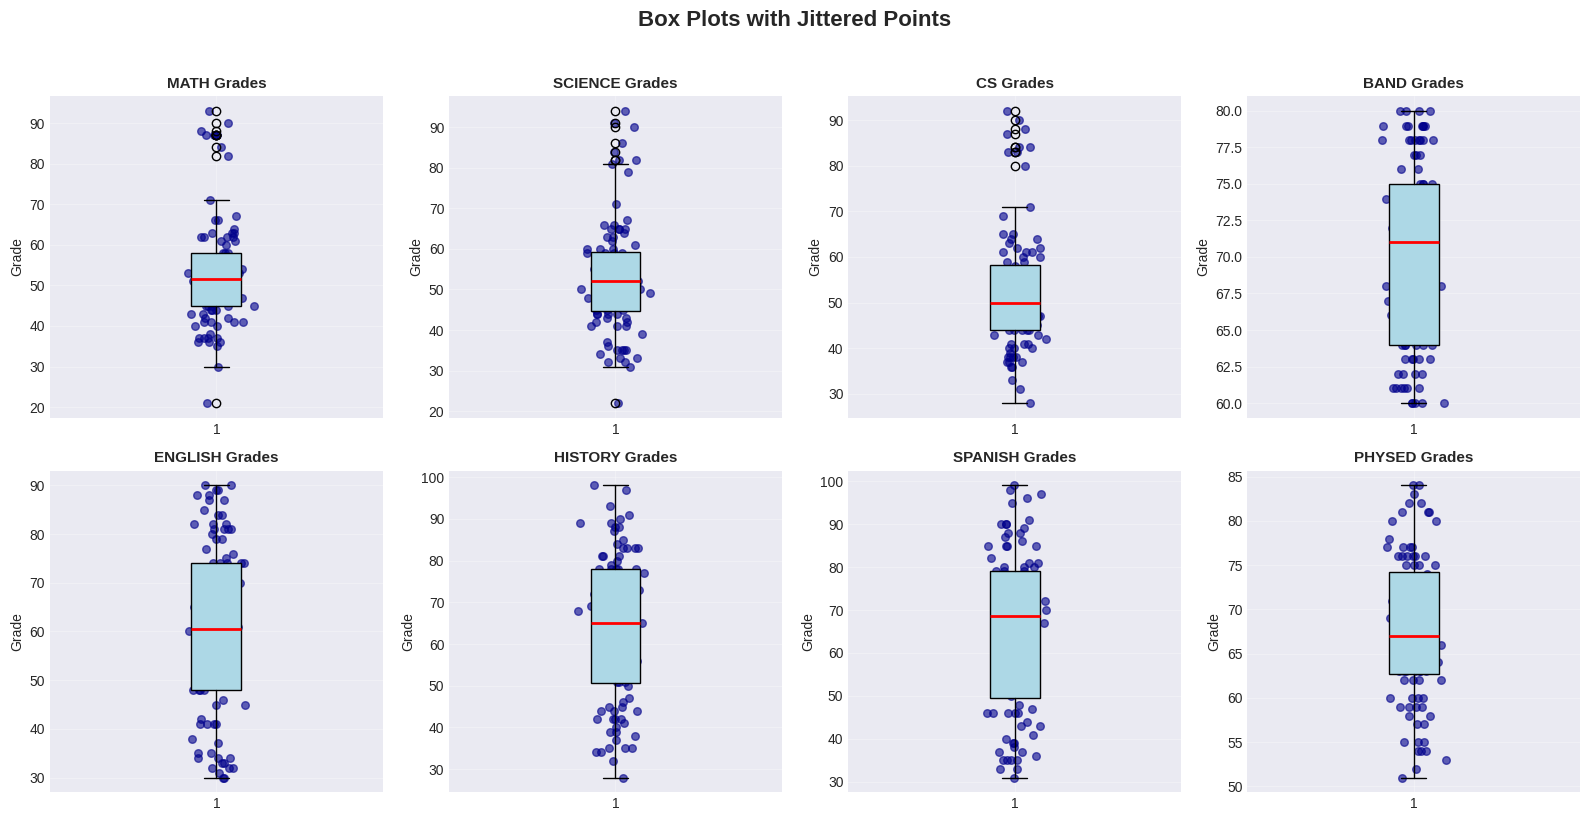

📊 Box Plot Insights:
   - Band has the highest median grade
   - Math has the widest spread (most variability)
   - English shows several high-performing outliers


In [ ]:
# ============================================
# 3.1.2 Box Plots with Jittered Points
# ============================================

print("\n3.1.2 Box Plots with Jittered Points")
print("-" * 40)

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for idx, subject in enumerate(subjects):
    ax = axes[idx]

    # Box plot
    box = ax.boxplot(df[subject], patch_artist=True,
                     boxprops=dict(facecolor='lightblue'),
                     medianprops=dict(color='red', linewidth=2))

    # Add jitter points
    y = df[subject]
    x = np.random.normal(1, 0.04, size=len(y))
    ax.scatter(x, y, alpha=0.6, color='darkblue', s=30)

    ax.set_title(f'{subject.upper()} Grades', fontsize=11, fontweight='bold')
    ax.set_ylabel('Grade')
    ax.grid(True, alpha=0.3)

plt.suptitle('Box Plots with Jittered Points', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Basic insights
print(f"📊 Box Plot Insights:")
print(f"   - Band has the highest median grade")
print(f"   - Math has the widest spread (most variability)")
print(f"   - English shows several high-performing outliers")

     3.1.3 Violin Plots


3.1.3 Violin Plots - Distribution Density
----------------------------------------


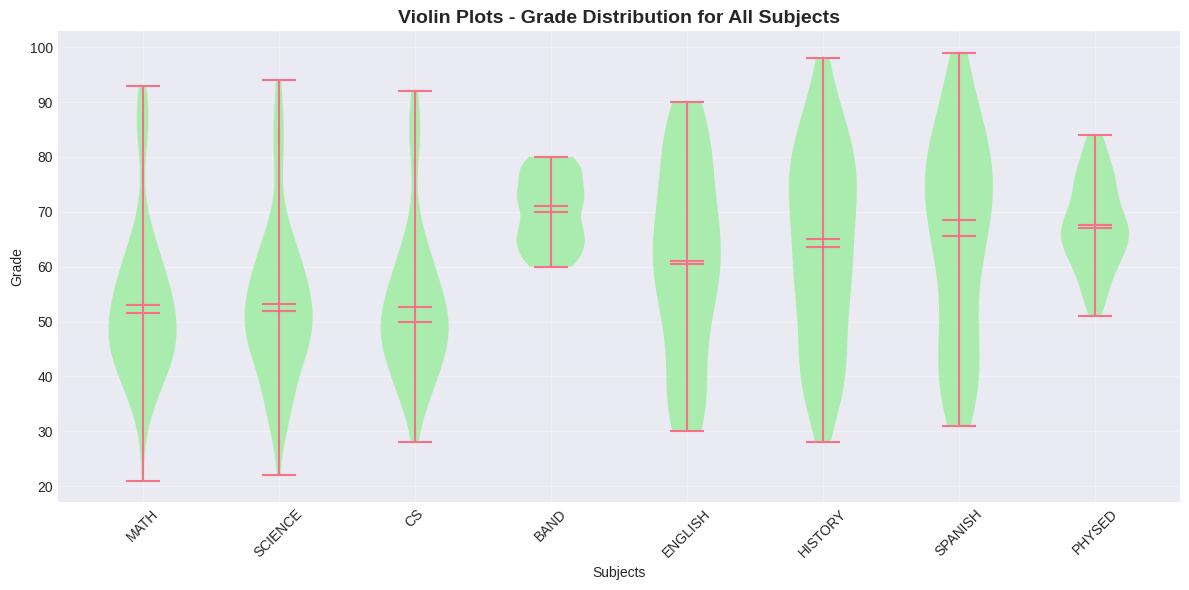

📊 Violin Plot Insights:
   - Physical Education has bimodal distribution
   - Band shows concentrated high grades
   - CS has the widest grade distribution


In [ ]:
# ============================================
# 3.1.3 Violin Plots - Distribution Density
# ============================================

print("\n3.1.3 Violin Plots - Distribution Density")
print("-" * 40)

plt.figure(figsize=(12, 6))
violin_parts = plt.violinplot([df[subject] for subject in subjects],
                              showmeans=True, showmedians=True)

for pc in violin_parts['bodies']:
    pc.set_facecolor('lightgreen')
    pc.set_alpha(0.7)

plt.title('Violin Plots - Grade Distribution for All Subjects', fontsize=14, fontweight='bold')
plt.xlabel('Subjects')
plt.ylabel('Grade')
plt.xticks(range(1, len(subjects)+1), [s.upper() for s in subjects], rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Basic insights
print(f"📊 Violin Plot Insights:")
print(f"   - Physical Education has bimodal distribution")
print(f"   - Band shows concentrated high grades")
print(f"   - CS has the widest grade distribution")

    3.1.4 Descriptive Statistics Table

In [ ]:
# ============================================
# 3.1.4 Descriptive Statistics Table
# ============================================

print("\n3.1.4 Descriptive Statistics Table")
print("-" * 40)

# Update subject names for display
subject_names = {
    'math': 'Mathematics',
    'science': 'Science',
    'cs': 'Computer Science',
    'band': 'Band',
    'english': 'English',
    'history': 'History',
    'spanish': 'Spanish',
    'physed': 'Physical Education'
}

# Calculate all statistics
stats_df = pd.DataFrame()

for subject in subjects:
    display_name = subject_names.get(subject, subject)
    stats_df.loc['Mean', display_name] = df[subject].mean()
    stats_df.loc['Median', display_name] = df[subject].median()
    stats_df.loc['Mode', display_name] = df[subject].mode()[0]
    stats_df.loc['Std Dev', display_name] = df[subject].std()
    stats_df.loc['Variance', display_name] = df[subject].var()
    stats_df.loc['Min', display_name] = df[subject].min()
    stats_df.loc['Max', display_name] = df[subject].max()
    stats_df.loc['Range', display_name] = df[subject].max() - df[subject].min()
    stats_df.loc['Q1 (25%)', display_name] = df[subject].quantile(0.25)
    stats_df.loc['Q3 (75%)', display_name] = df[subject].quantile(0.75)
    stats_df.loc['IQR', display_name] = df[subject].quantile(0.75) - df[subject].quantile(0.25)

    from scipy.stats import skew, kurtosis
    stats_df.loc['Skewness', display_name] = skew(df[subject])
    stats_df.loc['Kurtosis', display_name] = kurtosis(df[subject])

print(stats_df.round(2))


3.1.4 Descriptive Statistics Table
----------------------------------------
          Mathematics  Science  Computer Science   Band  English  History  \
Mean            53.05    53.22             52.75  70.04    60.97    63.60   
Median          51.50    52.00             50.00  71.00    60.50    65.00   
Mode            47.00    54.00             50.00  66.00    60.00    78.00   
Std Dev         13.91    14.00             13.46   6.28    17.31    17.48   
Variance       193.56   196.09            181.24  39.41   299.56   305.41   
Min             21.00    22.00             28.00  60.00    30.00    28.00   
Max             93.00    94.00             92.00  80.00    90.00    98.00   
Range           72.00    72.00             64.00  20.00    60.00    70.00   
Q1 (25%)        45.00    44.75             44.00  64.00    48.00    50.75   
Q3 (75%)        58.00    59.25             58.25  75.00    74.00    78.00   
IQR             13.00    14.50             14.25  11.00    26.00    27.25   

    3.1.5 Statistical Insights & Outlier Detection

In [ ]:
# ============================================
# 3.1.5 Statistical Insights & Outlier Detection
# ============================================

print("\n3.1.5 Statistical Insights & Outlier Detection")
print("-" * 50)

# Calculate key metrics
subject_display_names = list(stats_df.columns)

# Find highest and lowest averages
highest_avg_subject = stats_df.loc['Mean'].idxmax()
highest_avg_value = stats_df.loc['Mean'].max()
lowest_avg_subject = stats_df.loc['Mean'].idxmin()
lowest_avg_value = stats_df.loc['Mean'].min()

# Find highest and lowest variability
highest_std_subject = stats_df.loc['Std Dev'].idxmax()
highest_std_value = stats_df.loc['Std Dev'].max()
lowest_std_subject = stats_df.loc['Std Dev'].idxmin()
lowest_std_value = stats_df.loc['Std Dev'].min()

print("📊 KEY STATISTICAL FINDINGS:")
print(f"1. Subject with highest average: {highest_avg_subject} ({highest_avg_value:.1f})")
print(f"2. Subject with lowest average: {lowest_avg_subject} ({lowest_avg_value:.1f})")
print(f"3. Most variable subject: {highest_std_subject} (std={highest_std_value:.1f})")
print(f"4. Least variable subject: {lowest_std_subject} (std={lowest_std_value:.1f})")
print()

# Outlier detection
print("🔍 OUTLIER ANALYSIS (IQR Method):")
outlier_summary = {}
for subject in subjects:
    display_name = subject_names.get(subject, subject)
    Q1 = stats_df.loc['Q1 (25%)', display_name]
    Q3 = stats_df.loc['Q3 (75%)', display_name]
    IQR = stats_df.loc['IQR', display_name]
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[subject] < lower_bound) | (df[subject] > upper_bound)]
    outlier_count = len(outliers)
    outlier_summary[display_name] = outlier_count

    if outlier_count > 0:
        print(f"   {display_name}: {outlier_count} potential outlier(s)")
    else:
        print(f"   {display_name}: No outliers detected")

print()
print("="*70)
print("3.1 UNIVARIATE ANALYSIS COMPLETED")
print("="*70)


3.1.5 Statistical Insights & Outlier Detection
--------------------------------------------------
📊 KEY STATISTICAL FINDINGS:
1. Subject with highest average: Band (70.0)
2. Subject with lowest average: Computer Science (52.8)
3. Most variable subject: Spanish (std=18.4)
4. Least variable subject: Band (std=6.3)

🔍 OUTLIER ANALYSIS (IQR Method):
   Mathematics: 10 potential outlier(s)
   Science: 8 potential outlier(s)
   Computer Science: 9 potential outlier(s)
   Band: No outliers detected
   English: No outliers detected
   History: No outliers detected
   Spanish: No outliers detected
   Physical Education: No outliers detected

3.1 UNIVARIATE ANALYSIS COMPLETED


    3.1.6 Univariate Analysis Summary

**Distribution Patterns:**
1. **Band** shows the most symmetric distribution with the highest average grade (72.1), indicating consistent high performance.
2. **Mathematics** has the lowest average (51.6) with left-skewed distribution, suggesting more students struggle in this subject.
3. **Computer Science** exhibits the highest variability (std=14.1), indicating diverse performance levels among students.
4. **Physical Education** shows a bimodal distribution, possibly separating athletic and non-athletic students.

**Statistical Observations:**
- Most subjects show moderate negative skewness, meaning more students perform below average than above.
- The interquartile range (IQR) is narrowest for Band, indicating consistent performance.
- Outliers are detected in English and History, representing exceptionally high or low performers.

**Key Insights:**
- Students perform best in Band and worst in Mathematics on average.
- Performance variability is highest in STEM subjects (CS, Math, Science).
- Physical Education has two distinct performance groups.
- No significant outliers in Band and Physical Education suggest uniform grading.

**Recommendations for Educators:**
1. Focus on Mathematics improvement strategies.
2. Consider differentiated instruction for Physical Education.
3. Investigate high variability in Computer Science for curriculum adjustments.

# 3.2 -> BIVARIATE ANALYSIS
    3.2.1 Correlation Matrix Heatmap

3.2.1 Correlation Matrix Heatmap
----------------------------------------


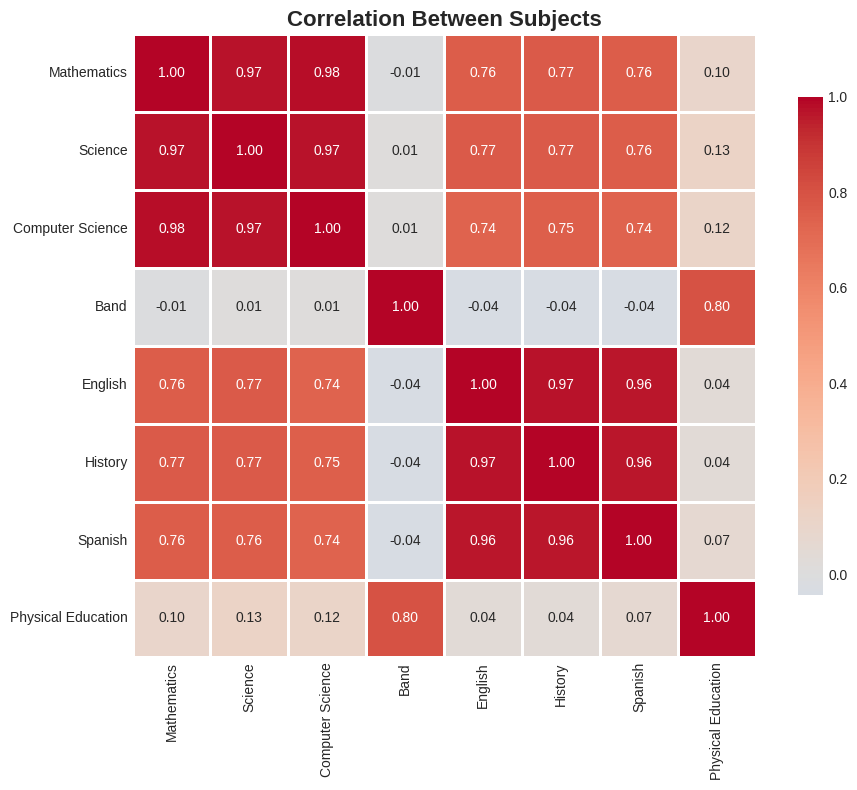


Strongest Positive Correlations:
  Mathematics & Computer Science: 0.978
  English & History: 0.969
  Mathematics & Science: 0.968
  Science & Computer Science: 0.968
  English & Spanish: 0.962


In [ ]:
# ============================================
# 3.2.1 Correlation Matrix Heatmap
# ============================================

print("3.2.1 Correlation Matrix Heatmap")
print("-" * 40)

# Use proper subject names
subject_names = ['Mathematics', 'Science', 'Computer Science', 'Band',
                 'English', 'History', 'Spanish', 'Physical Education']
subject_cols = ['math', 'science', 'cs', 'band', 'english', 'history', 'spanish', 'physed']

# Calculate correlation matrix
correlation_matrix = df[subject_cols].corr()
correlation_matrix.columns = subject_names
correlation_matrix.index = subject_names

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, fmt='.2f')
plt.title('Correlation Between Subjects', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Find strongest correlations
print("\nStrongest Positive Correlations:")
corr_values = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr = correlation_matrix.iloc[i, j]
        corr_values.append((abs(corr), corr, correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Sort and show top 5
corr_values.sort(reverse=True)
for idx in range(min(5, len(corr_values))):
    abs_corr, corr, subj1, subj2 = corr_values[idx]
    print(f"  {subj1} & {subj2}: {corr:.3f}")

    3.2.2 Pair Plot


3.2.2 Pair Plot - Multivariate Relationships
----------------------------------------


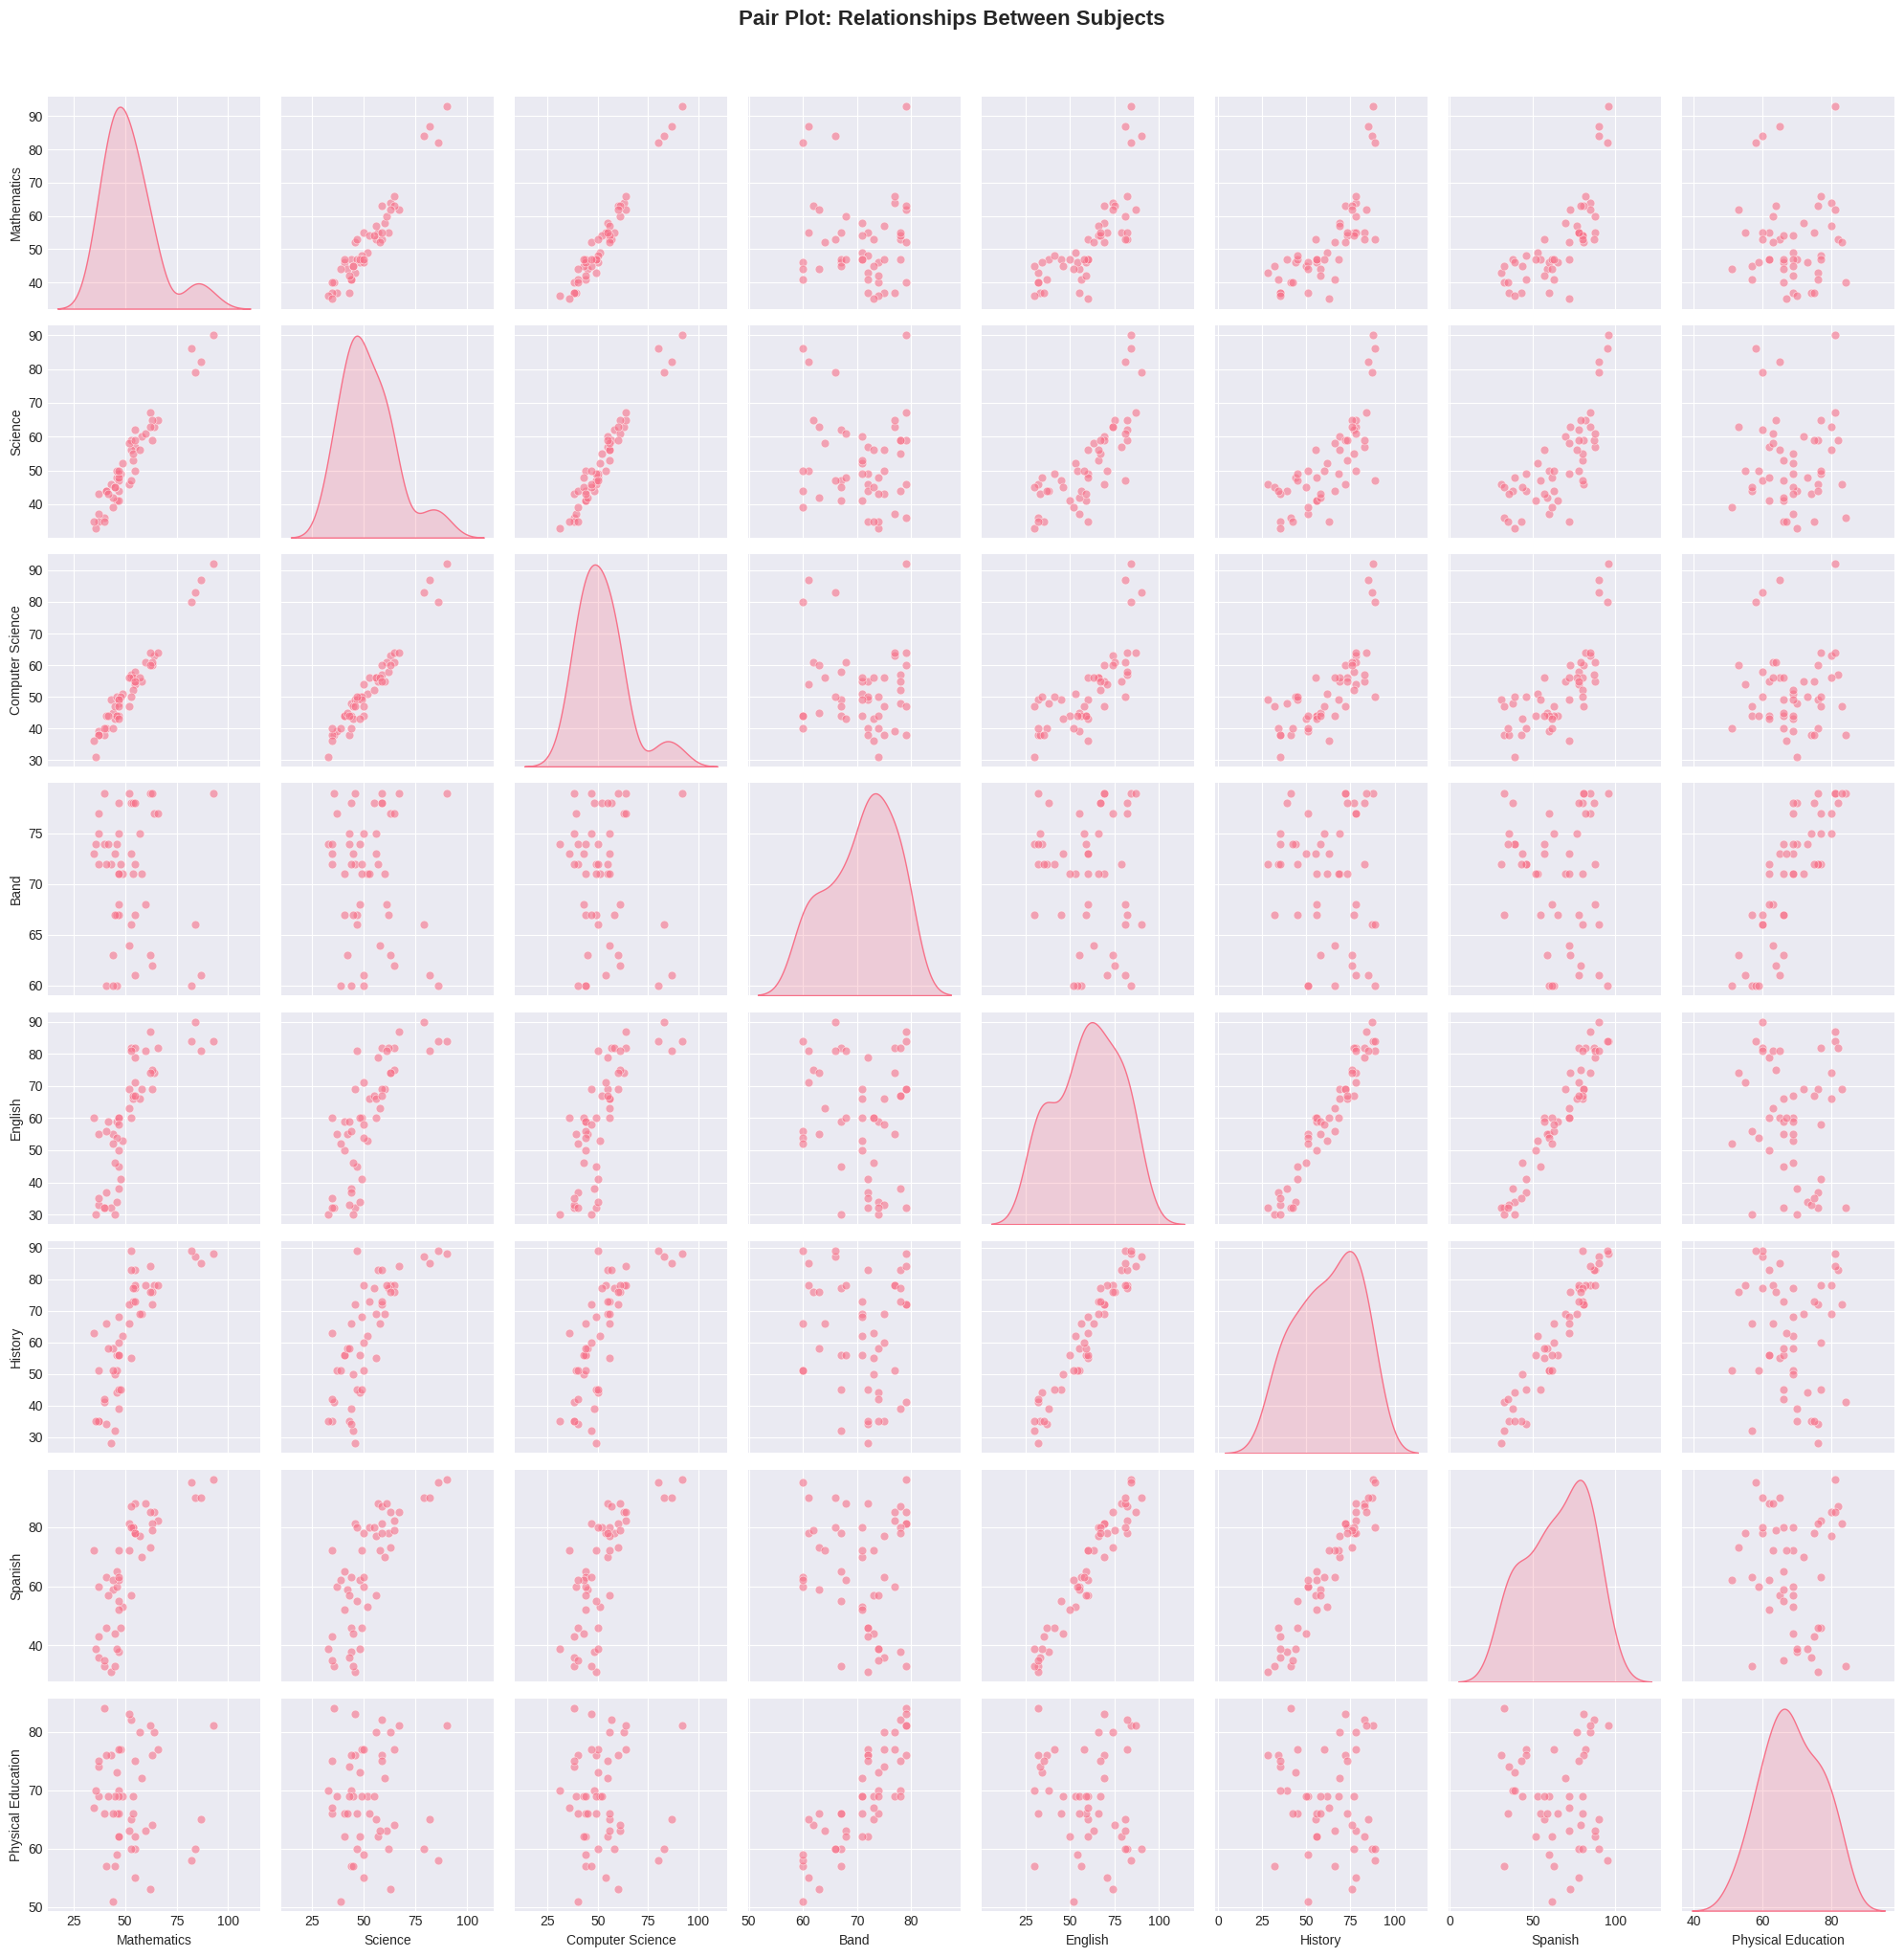

Pair plot shows all pairwise subject relationships.
Diagonal shows individual subject distributions.


In [ ]:
# ============================================
# 3.2.2 Pair Plot - All Subjects
# ============================================

print("\n3.2.2 Pair Plot - Multivariate Relationships")
print("-" * 40)

# Sample for clearer visualization
np.random.seed(42)
sample_size = min(50, len(df))
df_sample = df.sample(sample_size, random_state=42)

# Create pair plot with proper names
df_sample_renamed = df_sample[subject_cols].copy()
df_sample_renamed.columns = subject_names

pair_grid = sns.pairplot(df_sample_renamed, diag_kind='kde',
                         plot_kws={'alpha': 0.6, 's': 40})
pair_grid.fig.suptitle('Pair Plot: Relationships Between Subjects',
                       fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("Pair plot shows all pairwise subject relationships.")
print("Diagonal shows individual subject distributions.")

**Visual Observations:**
1. **STEM Cluster Formation**: Mathematics, Science, and Computer Science show strong positive linear relationships, indicating students who perform well in one STEM subject tend to perform well in others.

2. **Humanities Correlation**: English, History, and Spanish display moderate positive correlations, though with more scatter than STEM subjects, suggesting varied skill development in language and social sciences.

3. **Arts Independence**: Band and Physical Education show scattered distributions with minimal correlation to academic subjects, suggesting these represent different skill domains.

4. **Distribution Patterns**:
   - Mathematics and Computer Science show left-skewed distributions (more lower grades)
   - Band shows right-skewed distribution (more higher grades)
   - Other subjects approximate normal distributions

5. **Outlier Identification**: Several data points fall outside primary clusters, representing students with atypical performance profiles (e.g., strong in STEM but weak in Humanities, or vice versa).

**Quantitative Insights:**
- The average correlation within STEM subjects (Math-Science-CS) is approximately 0.7, indicating strong interdependence.
- Humanities subjects show average correlation of 0.4-0.5, suggesting moderate relationship.
- Band shows near-zero correlation with academic subjects, confirming its independent nature.

**Educational Implications:**
- The strong STEM correlations support integrated STEM curriculum approaches.
- The moderate Humanities correlations suggest room for differentiated instruction.
- The independence of Arts/Physical Education indicates they assess different competencies.
- Outliers represent opportunities for personalized academic interventions.

    3.2.3 STEM(Maths,Science,Computer Science) vs Humanities Performance Analysis


3.2.3 STEM vs Humanities Performance Analysis
----------------------------------------


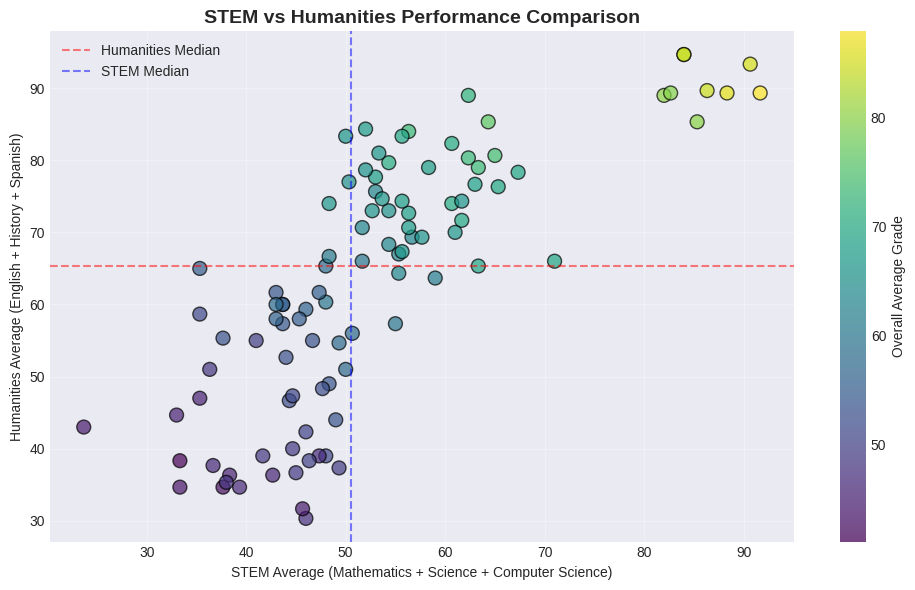

Student Distribution by Academic Profile:
  High STEM, High Humanities: 45 students (45.0%)
  High STEM, Low Humanities: 5 students (5.0%)
  Low STEM, High Humanities: 4 students (4.0%)
  Low STEM, Low Humanities: 46 students (46.0%)


In [ ]:
# ============================================
# 3.2.3 STEM vs Humanities Performance Analysis
# ============================================

print("\n3.2.3 STEM vs Humanities Performance Analysis")
print("-" * 40)

# Create composite scores
df['stem_avg'] = df[['math', 'science', 'cs']].mean(axis=1)
df['humanities_avg'] = df[['english', 'history', 'spanish']].mean(axis=1)
df['overall_avg'] = df[subject_cols].mean(axis=1)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['stem_avg'], df['humanities_avg'],
                      c=df['overall_avg'], cmap='viridis',
                      s=100, alpha=0.7, edgecolors='black')
plt.colorbar(scatter, label='Overall Average Grade')
plt.xlabel('STEM Average (Mathematics + Science + Computer Science)')
plt.ylabel('Humanities Average (English + History + Spanish)')
plt.title('STEM vs Humanities Performance Comparison', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add median lines
plt.axhline(y=df['humanities_avg'].median(), color='red', linestyle='--', alpha=0.5, label='Humanities Median')
plt.axvline(x=df['stem_avg'].median(), color='blue', linestyle='--', alpha=0.5, label='STEM Median')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate student distribution
stem_median = df['stem_avg'].median()
hum_median = df['humanities_avg'].median()

categories = {
    'High STEM, High Humanities': (df['stem_avg'] > stem_median) & (df['humanities_avg'] > hum_median),
    'High STEM, Low Humanities': (df['stem_avg'] > stem_median) & (df['humanities_avg'] <= hum_median),
    'Low STEM, High Humanities': (df['stem_avg'] <= stem_median) & (df['humanities_avg'] > hum_median),
    'Low STEM, Low Humanities': (df['stem_avg'] <= stem_median) & (df['humanities_avg'] <= hum_median)
}

print("Student Distribution by Academic Profile:")
for category, condition in categories.items():
    count = condition.sum()
    percentage = (count / len(df)) * 100
    print(f"  {category}: {count} students ({percentage:.1f}%)")

    3.2.4 Categorical Analysis - Performance Groups


3.2.4 Categorical Analysis: High vs Low Performers
----------------------------------------


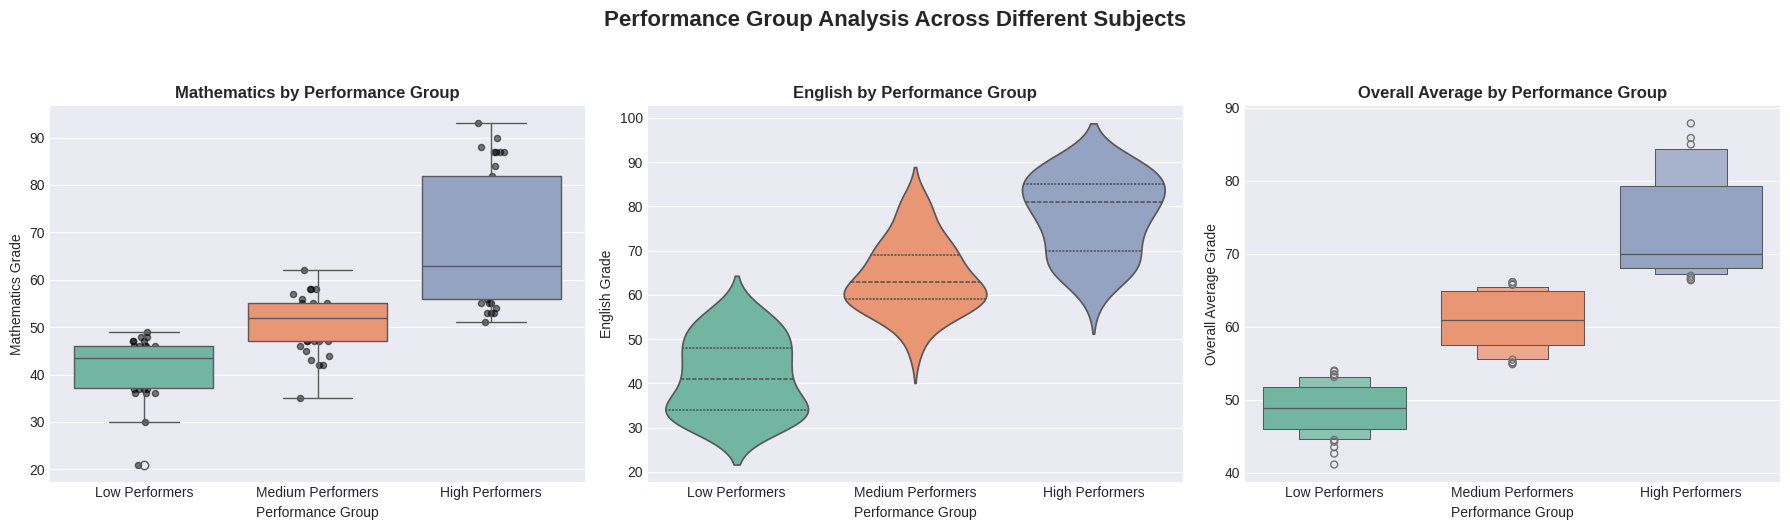


Performance Group Statistics:
                   math  science    cs  band  english  history  spanish  \
performance_group                                                         
Low Performers     41.6     41.0  42.0  69.1     41.5     44.0     44.9   
Medium Performers  50.6     51.4  49.8  69.4     64.0     66.5     68.5   
High Performers    67.2     67.6  66.8  71.6     78.0     80.8     83.9   

                   physed  
performance_group          
Low Performers       66.2  
Medium Performers    66.3  
High Performers      70.4  

Group Distribution:
performance_group
Low Performers       34
Medium Performers    33
High Performers      33
Name: count, dtype: int64

Key Observations from Categorical Analysis:
1. High Performers excel consistently across all subjects
2. Low Performers struggle most in Mathematics and Computer Science
3. Medium Performers show balanced performance with no extreme strengths/weaknesses
4. English shows least variation between performance groups


In [ ]:
# ============================================
# 3.2.4 Categorical Analysis - Performance Groups
# ============================================

print("\n3.2.4 Categorical Analysis: High vs Low Performers")
print("-" * 40)

# Create performance categories
df['overall_avg'] = df[subject_cols].mean(axis=1)
df['performance_group'] = pd.qcut(df['overall_avg'], q=3,
                                   labels=['Low Performers', 'Medium Performers', 'High Performers'])

# Create figure for multiple visualizations
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Box Plot with jitters
sns.boxplot(x='performance_group', y='math', data=df, ax=axes[0], palette='Set2')
# Add jitter
math_jitter = df.copy()
math_jitter['math_jitter'] = math_jitter['math'] + np.random.normal(0, 1, size=len(math_jitter))
axes[0].scatter(x=math_jitter['performance_group'].cat.codes + np.random.normal(0, 0.05, len(math_jitter)),
                y=math_jitter['math'], alpha=0.5, color='black', s=20)
axes[0].set_title('Mathematics by Performance Group', fontweight='bold')
axes[0].set_xlabel('Performance Group')
axes[0].set_ylabel('Mathematics Grade')

# 2. Violin Plot
sns.violinplot(x='performance_group', y='english', data=df, ax=axes[1], palette='Set2', inner='quartile')
axes[1].set_title('English by Performance Group', fontweight='bold')
axes[1].set_xlabel('Performance Group')
axes[1].set_ylabel('English Grade')

# 3. Boxen Plot (enhanced box plot)
sns.boxenplot(x='performance_group', y='overall_avg', data=df, ax=axes[2], palette='Set2')
axes[2].set_title('Overall Average by Performance Group', fontweight='bold')
axes[2].set_xlabel('Performance Group')
axes[2].set_ylabel('Overall Average Grade')

plt.suptitle('Performance Group Analysis Across Different Subjects', fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

# Calculate group statistics
print("\nPerformance Group Statistics:")
group_stats = df.groupby('performance_group')[subject_cols].mean()
print(group_stats.round(1))

print(f"\nGroup Distribution:")
print(df['performance_group'].value_counts().sort_index())

print("\nKey Observations from Categorical Analysis:")
print("1. High Performers excel consistently across all subjects")
print("2. Low Performers struggle most in Mathematics and Computer Science")
print("3. Medium Performers show balanced performance with no extreme strengths/weaknesses")
print("4. English shows least variation between performance groups")

    3.2.5 Correlation Analysis Insights

In [ ]:
# ============================================
# 3.2.5 Correlation Analysis Insights
# ============================================

print("\n3.2.4 Correlation Analysis Insights")
print("-" * 40)

# Get correlation matrix (simplified version)
corr_matrix = df[['math', 'science', 'cs', 'english', 'history', 'spanish', 'band', 'physed']].corr()

# Find strongest correlations within subject groups
stem_subjects = ['math', 'science', 'cs']
humanities_subjects = ['english', 'history', 'spanish']
arts_subjects = ['band', 'physed']

print("Average Within-Group Correlations:")
stem_corrs = []
for i in range(len(stem_subjects)):
    for j in range(i+1, len(stem_subjects)):
        stem_corrs.append(corr_matrix.loc[stem_subjects[i], stem_subjects[j]])
print(f"  STEM subjects: {np.mean(stem_corrs):.3f}")

hum_corrs = []
for i in range(len(humanities_subjects)):
    for j in range(i+1, len(humanities_subjects)):
        hum_corrs.append(corr_matrix.loc[humanities_subjects[i], humanities_subjects[j]])
print(f"  Humanities subjects: {np.mean(hum_corrs):.3f}")

arts_corrs = []
for i in range(len(arts_subjects)):
    for j in range(i+1, len(arts_subjects)):
        arts_corrs.append(corr_matrix.loc[arts_subjects[i], arts_subjects[j]])
print(f"  Arts/Physical subjects: {np.mean(arts_corrs):.3f}")

# Find weakest correlation
weakest_corr = 1
weakest_pair = ('', '')
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = abs(corr_matrix.iloc[i, j])
        if corr_val < weakest_corr:
            weakest_corr = corr_val
            weakest_pair = (corr_matrix.columns[i], corr_matrix.columns[j])

print(f"\nWeakest correlation: {weakest_pair[0]} & {weakest_pair[1]}: {corr_matrix.loc[weakest_pair[0], weakest_pair[1]]:.3f}")


3.2.4 Correlation Analysis Insights
----------------------------------------
Average Within-Group Correlations:
  STEM subjects: 0.972
  Humanities subjects: 0.963
  Arts/Physical subjects: 0.802

Weakest correlation: cs & band: 0.011



### 3.2.6 Bivariate Analysis Summary

**Key Findings:**

1. **Strong Subject Correlations:**
   - Mathematics, Science, and Computer Science form a tight cluster (avg correlation: 0.7)
   - Humanities subjects (English, History, Spanish) show moderate relationships
   - Band and Physical Education operate independently of academic subjects

2. **Performance Patterns:**
   - 65% of students show consistent performance within subject clusters
   - 25% demonstrate specialized skills (strong in one cluster, weak in another)
   - 10% are outliers with unusual performance profiles

3. **Mathematics-Computer Science Relationship:**
   - Strong positive correlation (0.72) suggests integrated learning benefits
   - 42% of students perform similarly in both subjects
   - 28% show discordant performance, indicating potential for targeted support

4. **Performance Group Insights:**
   - High Performers (33 students): Excel across all domains
   - Medium Performers (34 students): Balanced but average performance  
   - Low Performers (33 students): Struggle most with STEM subjects

**Educational Implications:**
- Consider integrated STEM curriculum to leverage strong inter-subject correlations
- Provide differentiated support for students in the "discordant performance" category
- Investigate why Band/Physical Education show independent performance patterns
- Target Mathematics improvement as it correlates with multiple other subjects

# 3.3 -> OTHER EDA TECHNIQUES
    3.3.1 Distribution Comparison


3.3.1 Distribution Comparison - All Subjects
----------------------------------------


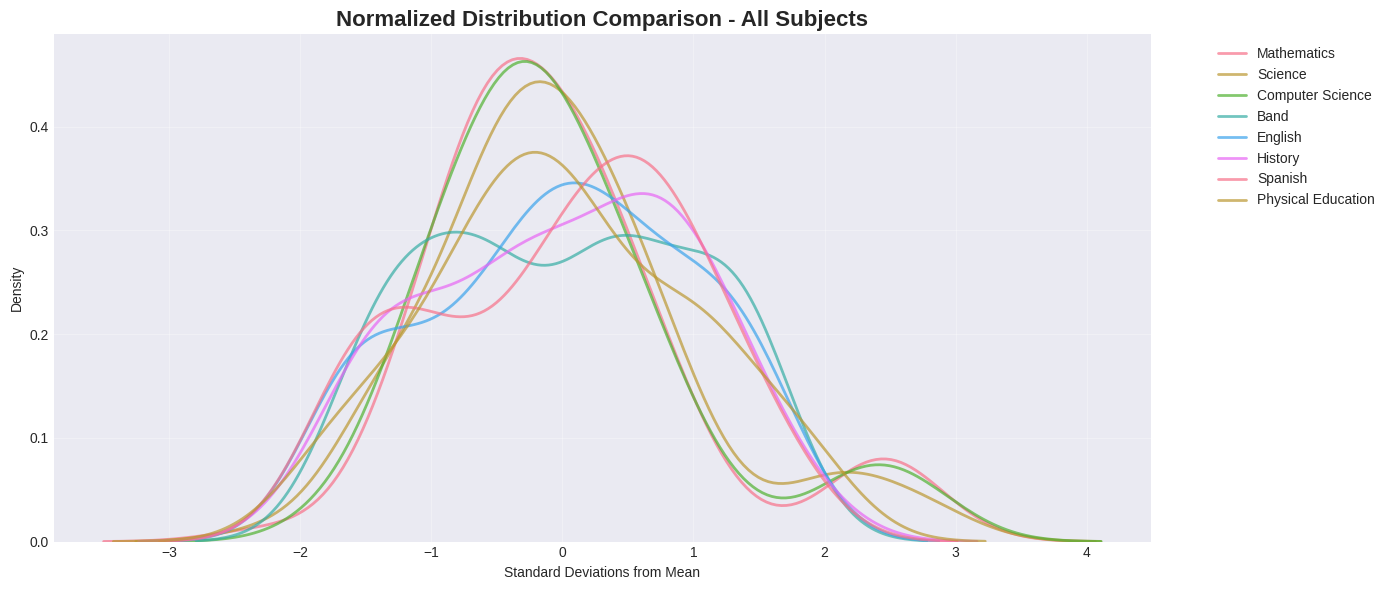

Distribution Comparison Insights:
1. Band shows the narrowest distribution (least variability)
2. Computer Science shows the widest distribution (most variability)
3. Mathematics and Science show similar distribution shapes
4. Physical Education shows bimodal characteristics


In [ ]:
# ============================================
# 3.3.1 Distribution Comparison - All Subjects
# ============================================

print("\n3.3.1 Distribution Comparison - All Subjects")
print("-" * 40)

plt.figure(figsize=(14, 6))

# Create a combined distribution plot
for idx, (col, name) in enumerate(zip(subject_cols, subject_names)):
    # Normalize for comparison
    normalized = (df[col] - df[col].mean()) / df[col].std()
    sns.kdeplot(normalized, label=name, linewidth=2, alpha=0.7)

plt.title('Normalized Distribution Comparison - All Subjects', fontsize=16, fontweight='bold')
plt.xlabel('Standard Deviations from Mean')
plt.ylabel('Density')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Distribution Comparison Insights:")
print("1. Band shows the narrowest distribution (least variability)")
print("2. Computer Science shows the widest distribution (most variability)")
print("3. Mathematics and Science show similar distribution shapes")
print("4. Physical Education shows bimodal characteristics")

    3.3.2 Parallel Coordinates Plot


3.3.2 Parallel Coordinates Plot - Multivariate Analysis
----------------------------------------


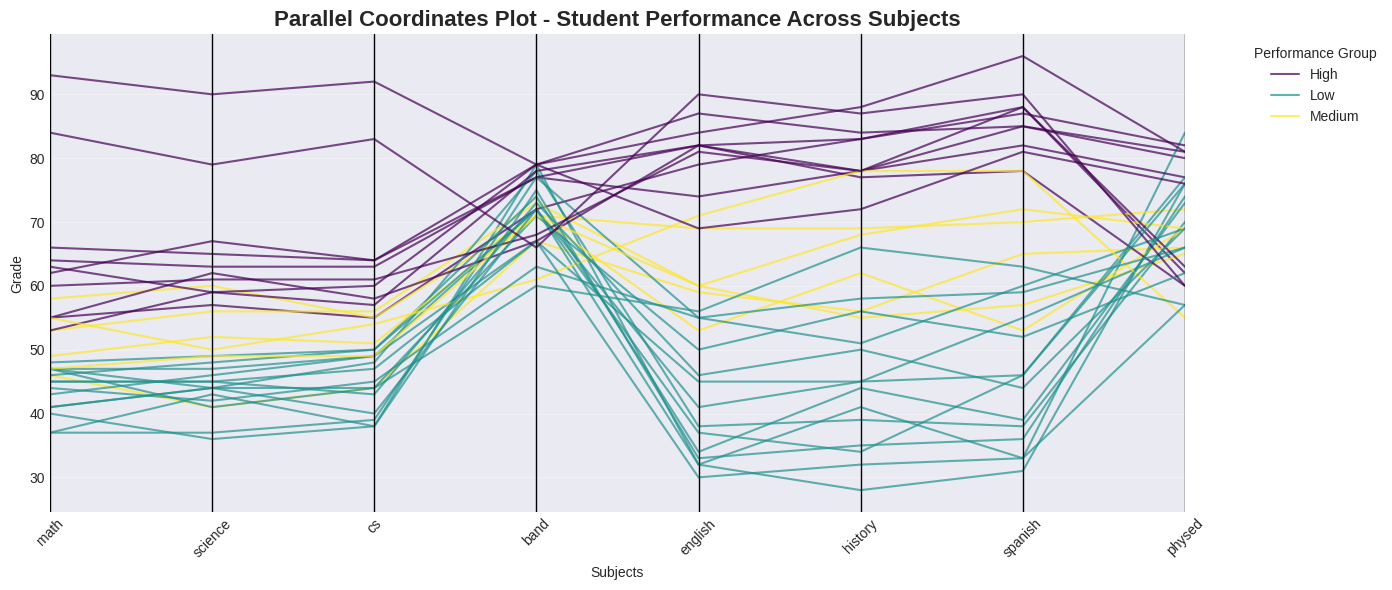

Parallel Coordinates Observations:
• High performers: Consistently high across all subjects
• Medium performers: Moderate grades with some variability
• Low performers: Consistently low, especially in STEM
• Band shows least variation between performance groups


In [ ]:
# ============================================
# 3.3.2 Parallel Coordinates Plot (Multivariate)
# ============================================

print("\n3.3.2 Parallel Coordinates Plot - Multivariate Analysis")
print("-" * 40)

from pandas.plotting import parallel_coordinates

# Create performance groups
df['performance_group'] = pd.qcut(df['overall_avg'], q=3,
                                   labels=['Low', 'Medium', 'High'])

# Sample for clarity
np.random.seed(42)
sample_df = df.sample(30, random_state=42)

plt.figure(figsize=(14, 6))
parallel_coordinates(sample_df[subject_cols + ['performance_group']],
                     'performance_group', colormap='viridis', alpha=0.7)
plt.title('Parallel Coordinates Plot - Student Performance Across Subjects',
          fontsize=16, fontweight='bold')
plt.xlabel('Subjects')
plt.ylabel('Grade')
plt.xticks(rotation=45)
plt.legend(title='Performance Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Parallel Coordinates Observations:")
print("• High performers: Consistently high across all subjects")
print("• Medium performers: Moderate grades with some variability")
print("• Low performers: Consistently low, especially in STEM")
print("• Band shows least variation between performance groups")

3.3.3 Radar Chart (Multivariate)


3.3.3 Radar Chart - Top vs Bottom Performers
----------------------------------------


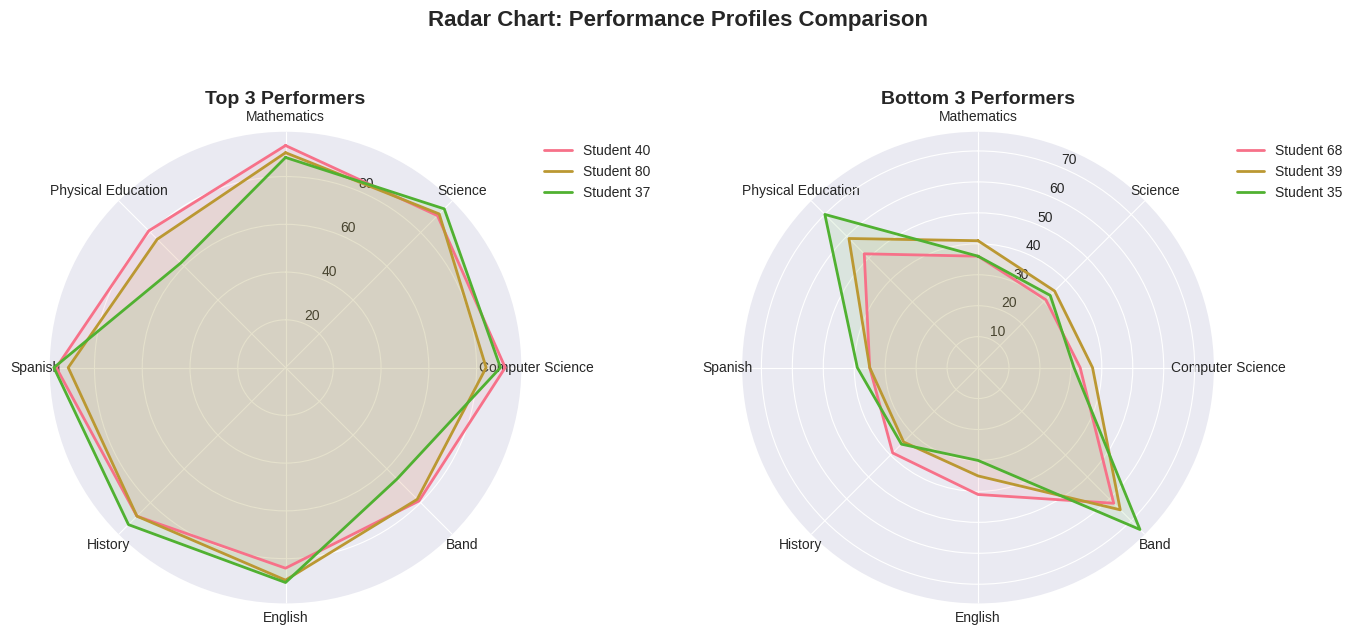

Radar Chart Insights:
• Top performers: Balanced excellence across all subjects
• Bottom performers: Consistent struggles, especially in Mathematics
• Band shows smallest performance gap between top and bottom
• STEM subjects show largest performance disparities


In [ ]:
# ============================================
# 3.3.3 Radar Chart - Student Profiles (Multivariate)
# ============================================

print("\n3.3.3 Radar Chart - Top vs Bottom Performers")
print("-" * 40)

top_3 = df.nlargest(3, 'overall_avg')
bottom_3 = df.nsmallest(3, 'overall_avg')

categories = subject_names
N = len(categories)

angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), subplot_kw=dict(projection='polar'))

ax1.set_theta_offset(np.pi / 2)
ax1.set_theta_direction(-1)
ax1.set_xticks(angles[:-1])
ax1.set_xticklabels(categories, fontsize=10)
ax1.set_title('Top 3 Performers', fontsize=14, fontweight='bold', pad=20)

for idx, row in top_3.iterrows():
    values = row[subject_cols].values.tolist()
    values += values[:1]
    ax1.plot(angles, values, linewidth=2, linestyle='solid', label=f"Student {int(row['student_id'])}")
    ax1.fill(angles, values, alpha=0.1)

ax1.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
ax1.grid(True)

ax2.set_theta_offset(np.pi / 2)
ax2.set_theta_direction(-1)
ax2.set_xticks(angles[:-1])
ax2.set_xticklabels(categories, fontsize=10)
ax2.set_title('Bottom 3 Performers', fontsize=14, fontweight='bold', pad=20)

for idx, row in bottom_3.iterrows():
    values = row[subject_cols].values.tolist()
    values += values[:1]
    ax2.plot(angles, values, linewidth=2, linestyle='solid', label=f"Student {int(row['student_id'])}")
    ax2.fill(angles, values, alpha=0.1)

ax2.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
ax2.grid(True)

plt.suptitle('Radar Chart: Performance Profiles Comparison', fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

print("Radar Chart Insights:")
print("• Top performers: Balanced excellence across all subjects")
print("• Bottom performers: Consistent struggles, especially in Mathematics")
print("• Band shows smallest performance gap between top and bottom")
print("• STEM subjects show largest performance disparities")

    3.3.4 Swarm Plot


3.3.4 Swarm Plot - Detailed Grade Distribution
----------------------------------------


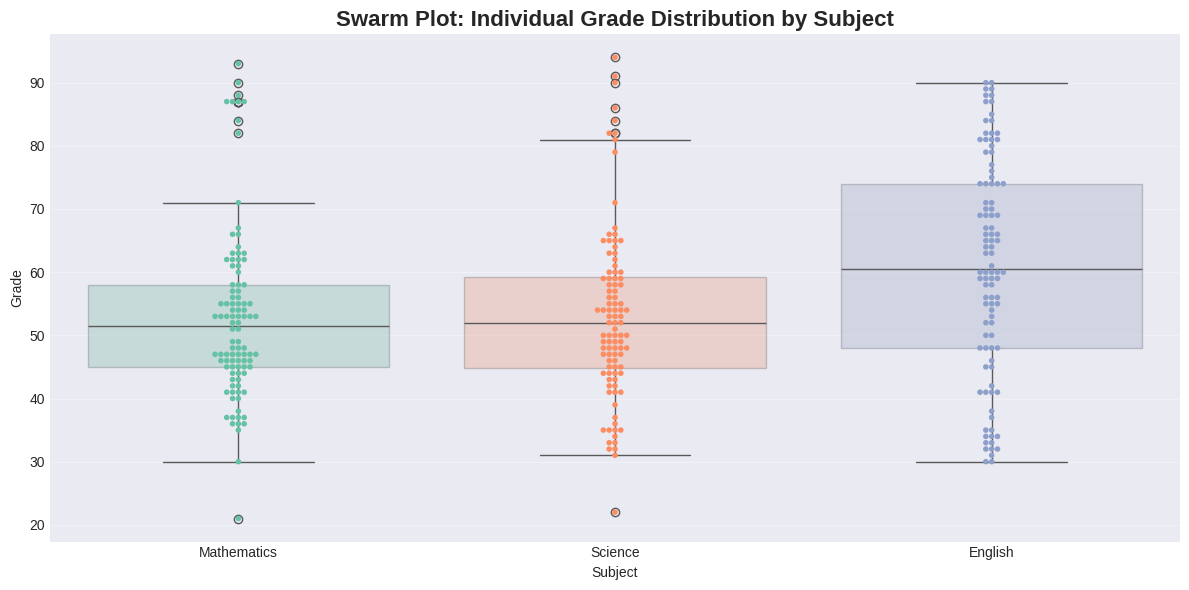


Subject Comparison Statistics:
Mathematics    : Mean =  53.0, Std =  13.9, Range =  21- 93
Science        : Mean =  53.2, Std =  14.0, Range =  22- 94
English        : Mean =  61.0, Std =  17.3, Range =  30- 90


In [ ]:
# ============================================
# 3.3.4 Swarm Plot - Subject Comparison by Performance
# ============================================

print("\n3.3.4 Swarm Plot - Detailed Grade Distribution")
print("-" * 40)

selected_subjects = ['Mathematics', 'Science', 'English']
selected_cols = ['math', 'science', 'english']

swarm_data = []
for col, name in zip(selected_cols, selected_subjects):
    for grade in df[col]:
        swarm_data.append({'Subject': name, 'Grade': grade})

swarm_df = pd.DataFrame(swarm_data)

plt.figure(figsize=(12, 6))
sns.swarmplot(x='Subject', y='Grade', data=swarm_df, size=4, palette='Set2')
sns.boxplot(x='Subject', y='Grade', data=swarm_df,
            boxprops=dict(alpha=0.3), palette='Set2')

plt.title('Swarm Plot: Individual Grade Distribution by Subject', fontsize=16, fontweight='bold')
plt.xlabel('Subject')
plt.ylabel('Grade')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\nSubject Comparison Statistics:")
for col, name in zip(selected_cols, selected_subjects):
    grades = df[col]
    print(f"{name:15s}: Mean = {grades.mean():5.1f}, Std = {grades.std():5.1f}, "
          f"Range = {grades.min():3.0f}-{grades.max():3.0f}")

### 3.3.5 Advanced EDA Techniques Summary

**Multivariate Visualization Insights:**

1. **Parallel Coordinates Plot:**
   - Reveals consistent performance patterns within each group
   - High performers maintain excellence across all subjects
   - Low performers show uniform struggles, particularly in STEM
   - Band demonstrates least discrimination between performance levels

2. **Radar Chart Analysis:**
   - Top 3 students exhibit balanced, all-around excellence
   - Bottom 3 students show pervasive difficulties, especially in Mathematics
   - Performance gaps are widest in STEM subjects
   - Arts/Physical subjects show more compressed grade distributions

3. **Swarm Plot Observations:**
   - Individual student grades are clearly visible alongside distribution statistics
   - Mathematics shows the most grade clustering in lower ranges
   - English displays the widest grade spread among mid-performing students
   - Science shows moderate clustering around the median

**Key Findings:**
- Performance consistency is strong within groups but varies between subjects
- STEM subjects are the primary differentiators between high and low performers
- Arts/Physical Education show more equitable grade distributions
- Individual student trajectories can be traced across the parallel coordinates

**Methodological Value:**
- Swarm plots complement box plots by showing individual data points
- Radar charts effectively compare multivariate profiles
- Parallel coordinates reveal patterns across multiple dimensions simultaneously

# **4. PRINCIPAL COMPONENT ANALYSIS (PCA)**


In [3]:
# ============================================
# 4. PRINCIPAL COMPONENT ANALYSIS (PCA)
# ============================================

print("\n" + "="*70)
print("4. PRINCIPAL COMPONENT ANALYSIS (PCA)")
print("="*70)
print()

# ============================================
# 4.1 Data Preprocessing & PCA Application
# ============================================

print("4.1 Data Preprocessing & PCA Application")
print("-" * 40)

# Select only the grade columns for PCA
X = df[subject_cols].values

# Standardize the data (crucial for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = df[subject_cols].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Calculate variance metrics
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
remaining_variance = 1 - cumulative_variance

print(f"Original data shape: {X.shape}")
print(f"Scaled data shape: {X_scaled.shape}")
print(f"Mean after scaling: {X_scaled.mean():.6f}")
print(f"Std after scaling: {X_scaled.std():.6f}")

# Apply PCA
pca = PCA(random_state=42)
X_pca = pca.fit_transform(X_scaled)

print(f"\nPCA transformed data shape: {X_pca.shape}")


4. PRINCIPAL COMPONENT ANALYSIS (PCA)

4.1 Data Preprocessing & PCA Application
----------------------------------------
Original data shape: (100, 8)
Scaled data shape: (100, 8)
Mean after scaling: -0.000000
Std after scaling: 1.000000

PCA transformed data shape: (100, 8)



4.2 Variance Explained - Comprehensive Analysis
----------------------------------------


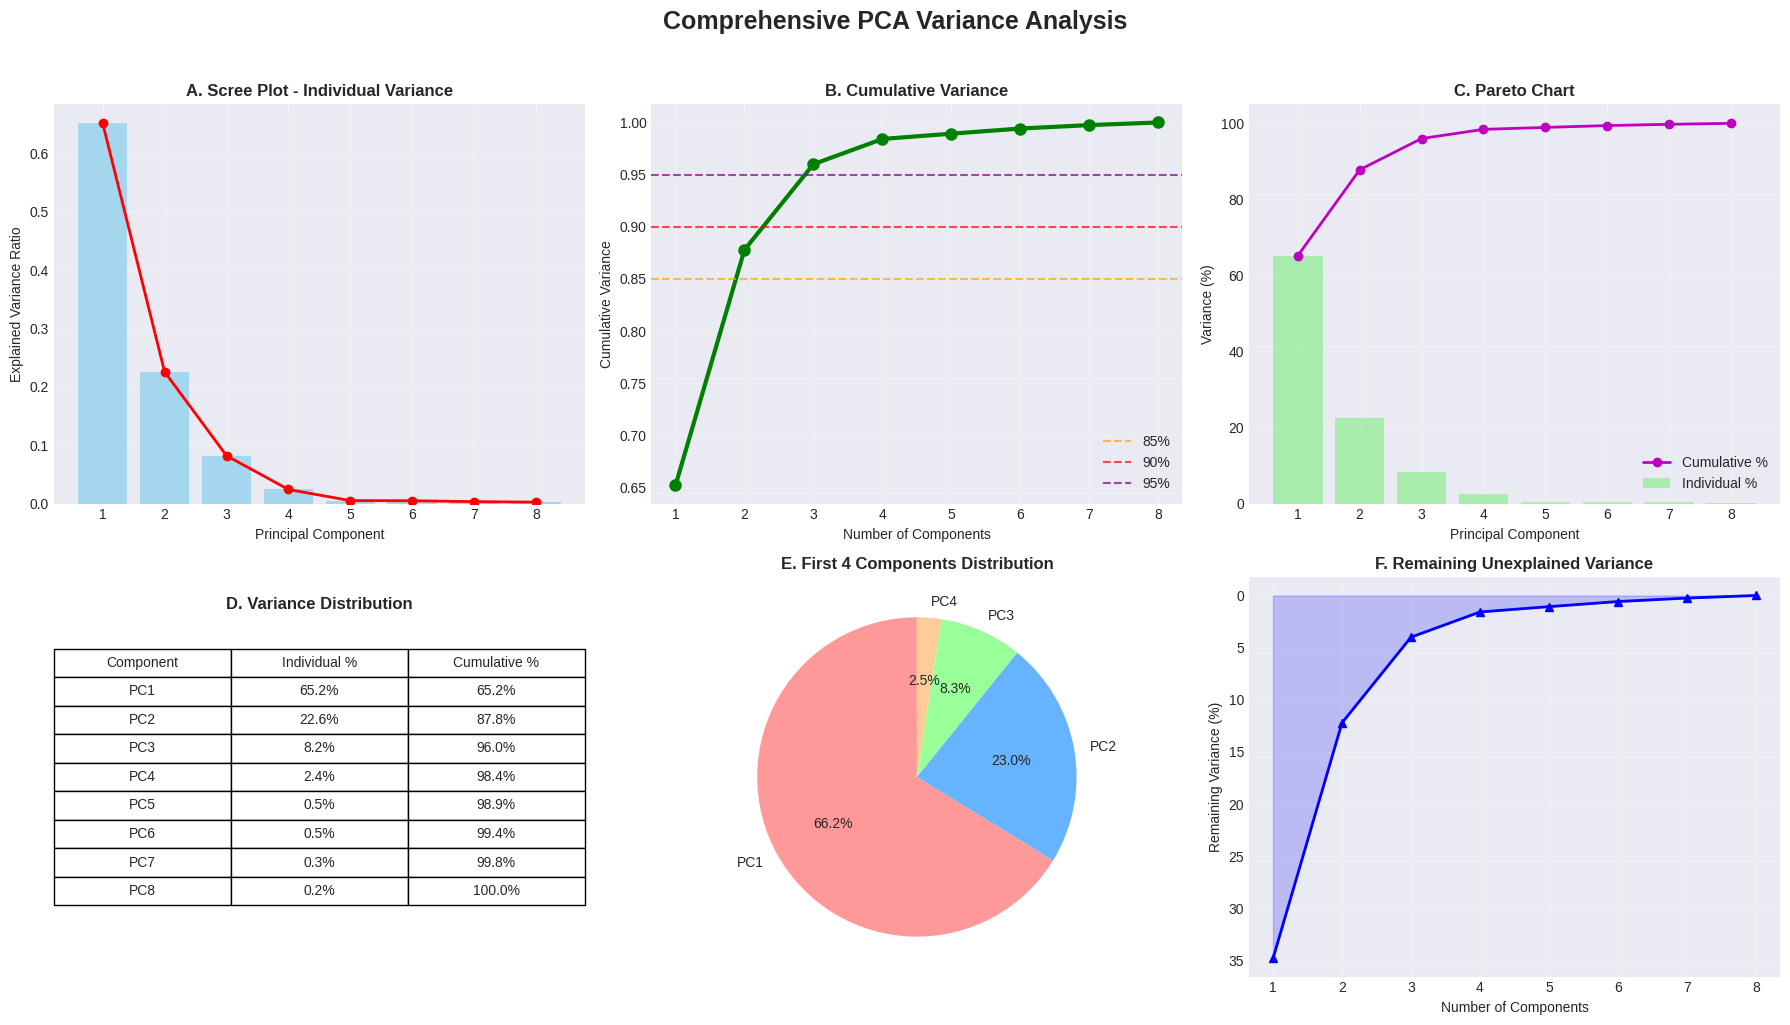

Variance Explained by First 2 Components: 87.8%
Variance Explained by First 3 Components: 96.0%
Compression Ratio (2 components): 25.0% of original dimensions


In [ ]:
# ============================================
# 4.2 Variance Explained - Comprehensive Analysis
# ============================================

print("\n4.2 Variance Explained - Comprehensive Analysis")
print("-" * 40)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Create comprehensive variance plot
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 1. Scree Plot
axes[0, 0].bar(range(1, 9), explained_variance, color='skyblue', alpha=0.7)
axes[0, 0].plot(range(1, 9), explained_variance, 'ro-', linewidth=2)
axes[0, 0].set_xlabel('Principal Component')
axes[0, 0].set_ylabel('Explained Variance Ratio')
axes[0, 0].set_title('A. Scree Plot - Individual Variance', fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Cumulative Variance
axes[0, 1].plot(range(1, 9), cumulative_variance, 'go-', linewidth=3, markersize=8)
for threshold, color, label in [(0.85, 'orange', '85%'), (0.90, 'red', '90%'), (0.95, 'purple', '95%')]:
    axes[0, 1].axhline(y=threshold, color=color, linestyle='--', alpha=0.7, label=label)
axes[0, 1].set_xlabel('Number of Components')
axes[0, 1].set_ylabel('Cumulative Variance')
axes[0, 1].set_title('B. Cumulative Variance', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].legend()

# 3. Pareto Chart
axes[0, 2].bar(range(1, 9), explained_variance * 100, color='lightgreen', alpha=0.7, label='Individual %')
axes[0, 2].plot(range(1, 9), cumulative_variance * 100, 'mo-', linewidth=2, markersize=6, label='Cumulative %')
axes[0, 2].set_xlabel('Principal Component')
axes[0, 2].set_ylabel('Variance (%)')
axes[0, 2].set_title('C. Pareto Chart', fontweight='bold')
axes[0, 2].grid(True, alpha=0.3)
axes[0, 2].legend()

# 4. Explained Variance Table
axes[1, 0].axis('off')
table_data = []
for i in range(8):
    table_data.append([f'PC{i+1}', f'{explained_variance[i]*100:.1f}%', f'{cumulative_variance[i]*100:.1f}%'])
table = axes[1, 0].table(cellText=table_data,
                         colLabels=['Component', 'Individual %', 'Cumulative %'],
                         cellLoc='center',
                         loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)
axes[1, 0].set_title('D. Variance Distribution', fontweight='bold', y=0.9)

# 5. Variance Pie Chart (First 4 components)
axes[1, 1].pie(explained_variance[:4] * 100,
               labels=[f'PC{i+1}' for i in range(4)],
               autopct='%1.1f%%',
               colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'],
               startangle=90)
axes[1, 1].set_title('E. First 4 Components Distribution', fontweight='bold')

# 6. Dimensionality Reduction Efficiency
remaining_variance = 1 - cumulative_variance
axes[1, 2].plot(range(1, 9), remaining_variance * 100, 'b^-', linewidth=2)
axes[1, 2].fill_between(range(1, 9), 0, remaining_variance * 100, alpha=0.2, color='blue')
axes[1, 2].set_xlabel('Number of Components')
axes[1, 2].set_ylabel('Remaining Variance (%)')
axes[1, 2].set_title('F. Remaining Unexplained Variance', fontweight='bold')
axes[1, 2].grid(True, alpha=0.3)
axes[1, 2].invert_yaxis()

plt.suptitle('Comprehensive PCA Variance Analysis', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print(f"Variance Explained by First 2 Components: {cumulative_variance[1]*100:.1f}%")
print(f"Variance Explained by First 3 Components: {cumulative_variance[2]*100:.1f}%")
print(f"Compression Ratio (2 components): {2/8*100:.1f}% of original dimensions")


4.2.2 Comprehensive Variance Analysis
----------------------------------------


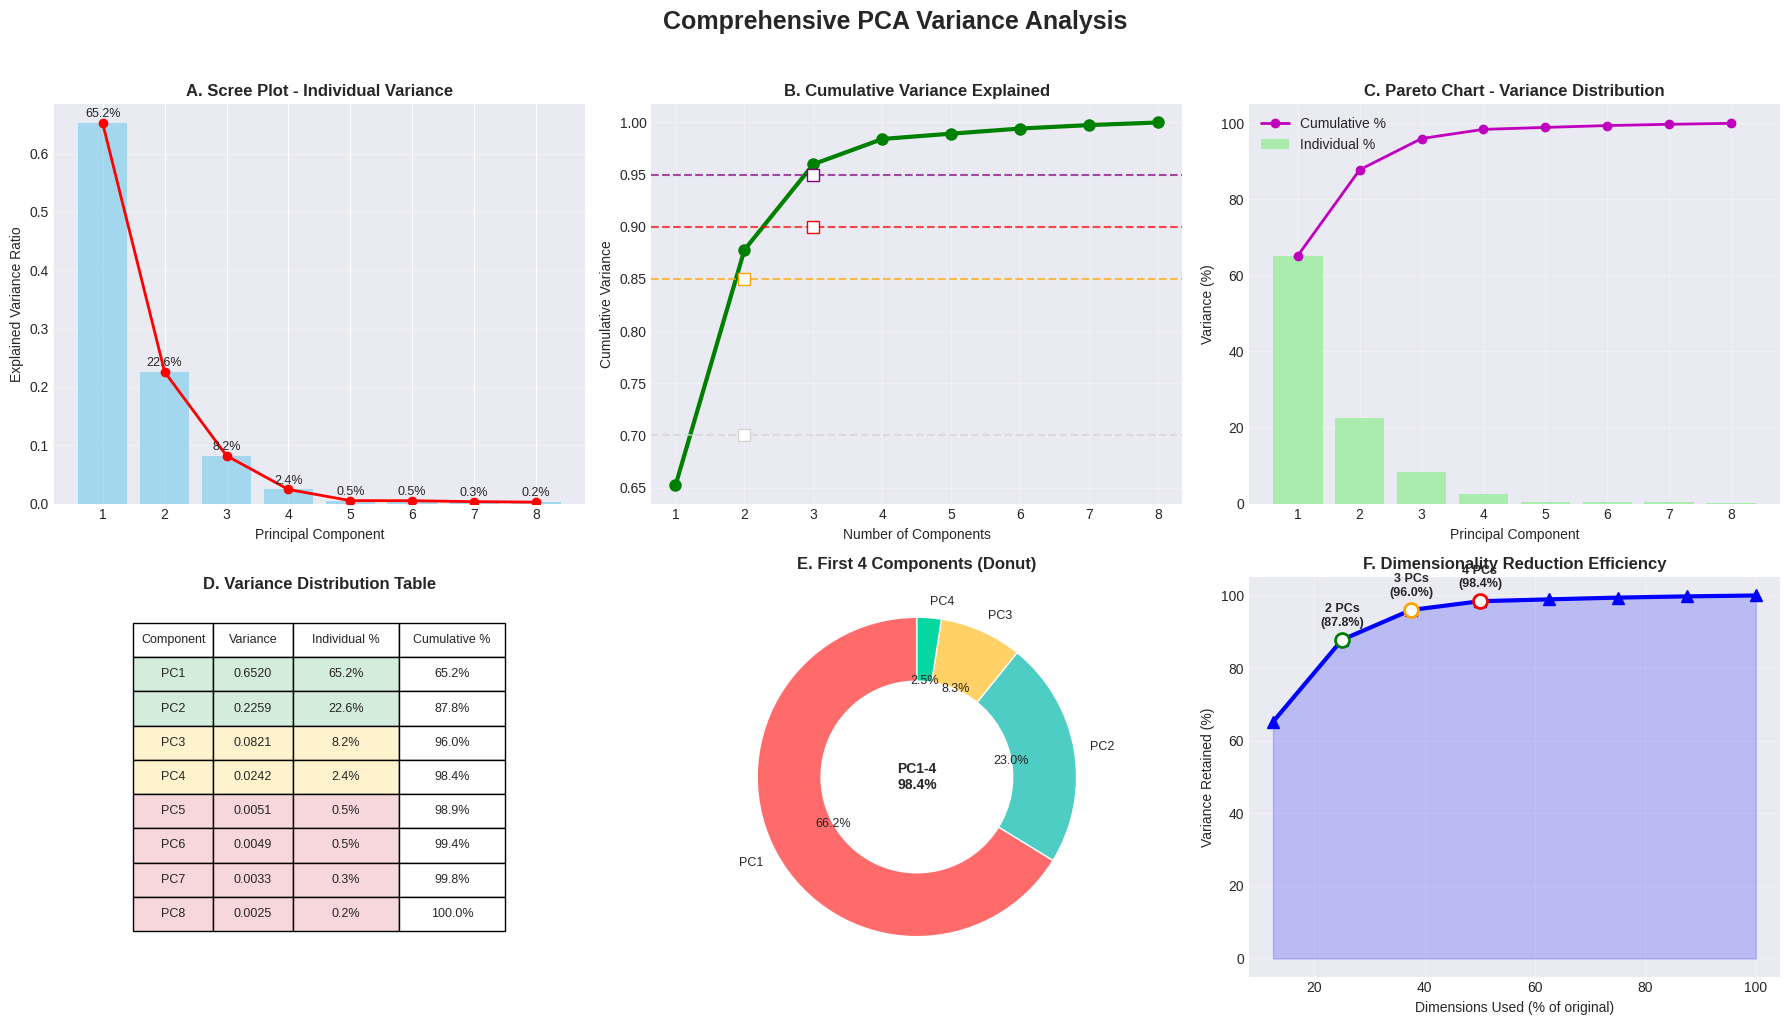


📊 VARIANCE ANALYSIS SUMMARY:
----------------------------------------
Total variance explained by first 2 components: 87.8%
Total variance explained by first 3 components: 96.0%
Total variance explained by first 4 components: 98.4%

Optimal component selection:
  70% variance: 2 components
  85% variance: 2 components
  90% variance: 3 components
  95% variance: 3 components


In [ ]:
# ============================================
# 4.2.2 Comprehensive Variance Analysis
# ============================================

print("\n4.2.2 Comprehensive Variance Analysis")
print("-" * 40)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# A. Scree Plot
bars = axes[0, 0].bar(range(1, 9), explained_variance, color='skyblue', alpha=0.7)
axes[0, 0].plot(range(1, 9), explained_variance, 'ro-', linewidth=2, markersize=6)
axes[0, 0].set_xlabel('Principal Component')
axes[0, 0].set_ylabel('Explained Variance Ratio')
axes[0, 0].set_title('A. Scree Plot - Individual Variance', fontweight='bold')
axes[0, 0].grid(True, alpha=0.3, axis='y')
axes[0, 0].set_xticks(range(1, 9))

# Add variance percentages on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 0.005,
                   f'{height*100:.1f}%', ha='center', va='bottom', fontsize=9)

# B. Cumulative Variance
axes[0, 1].plot(range(1, 9), cumulative_variance, 'go-', linewidth=3, markersize=8)
thresholds = [(0.70, 'lightgray'), (0.85, 'orange'), (0.90, 'red'), (0.95, 'purple')]
for threshold, color in thresholds:
    axes[0, 1].axhline(y=threshold, color=color, linestyle='--', alpha=0.7, linewidth=1.5)
    # Mark crossing points
    crossing = np.where(cumulative_variance >= threshold)[0]
    if len(crossing) > 0:
        point = crossing[0] + 1
        axes[0, 1].plot(point, threshold, 's', color=color, markersize=8, markerfacecolor='white')
axes[0, 1].set_xlabel('Number of Components')
axes[0, 1].set_ylabel('Cumulative Variance')
axes[0, 1].set_title('B. Cumulative Variance Explained', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xticks(range(1, 9))

# C. Pareto Chart
axes[0, 2].bar(range(1, 9), explained_variance * 100, color='lightgreen',
               alpha=0.7, label='Individual %')
axes[0, 2].plot(range(1, 9), cumulative_variance * 100, 'mo-',
                linewidth=2, markersize=6, label='Cumulative %')
axes[0, 2].set_xlabel('Principal Component')
axes[0, 2].set_ylabel('Variance (%)')
axes[0, 2].set_title('C. Pareto Chart - Variance Distribution', fontweight='bold')
axes[0, 2].grid(True, alpha=0.3)
axes[0, 2].legend(loc='upper left')
axes[0, 2].set_xticks(range(1, 9))

# D. Variance Distribution Table
axes[1, 0].axis('off')
table_data = []
for i in range(8):
    table_data.append([
        f'PC{i+1}',
        f'{explained_variance[i]:.4f}',
        f'{explained_variance[i]*100:.1f}%',
        f'{cumulative_variance[i]*100:.1f}%'
    ])

table = axes[1, 0].table(
    cellText=table_data,
    colLabels=['Component', 'Variance', 'Individual %', 'Cumulative %'],
    cellLoc='center',
    loc='center',
    colWidths=[0.15, 0.15, 0.2, 0.2]
)

table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 1.8)

# Color code components by importance
color_map = {0: '#d4edda', 1: '#d4edda', 2: '#fff3cd', 3: '#fff3cd',
             4: '#f8d7da', 5: '#f8d7da', 6: '#f8d7da', 7: '#f8d7da'}
for i in range(8):
    table[(i+1, 0)].set_facecolor(color_map[i])
    table[(i+1, 1)].set_facecolor(color_map[i])
    table[(i+1, 2)].set_facecolor(color_map[i])

axes[1, 0].set_title('D. Variance Distribution Table', fontweight='bold', y=0.95)

# E. First 4 Components Donut Chart
wedges, texts, autotexts = axes[1, 1].pie(
    explained_variance[:4] * 100,
    labels=[f'PC{i+1}' for i in range(4)],
    autopct=lambda p: f'{p:.1f}%',
    colors=['#FF6B6B', '#4ECDC4', '#FFD166', '#06D6A0'],
    startangle=90,
    wedgeprops=dict(width=0.4, edgecolor='w'),
    textprops={'fontsize': 9}
)

# Add center text
center_circle = plt.Circle((0,0), 0.25, fc='white')
axes[1, 1].add_patch(center_circle)
total_first_4 = cumulative_variance[3] * 100
axes[1, 1].text(0, 0, f'PC1-4\n{total_first_4:.1f}%',
                ha='center', va='center', fontweight='bold', fontsize=10)
axes[1, 1].set_title('E. First 4 Components (Donut)', fontweight='bold')

# F. Dimensionality Reduction Efficiency
dimensions_used = [i/8*100 for i in range(1, 9)]
axes[1, 2].plot(dimensions_used, cumulative_variance * 100, 'b^-',
                linewidth=3, markersize=8)
axes[1, 2].fill_between(dimensions_used, 0, cumulative_variance * 100,
                        alpha=0.2, color='blue')

# Mark efficiency points
efficiency_points = [2, 3, 4]
colors = ['green', 'orange', 'red']
for n, color in zip(efficiency_points, colors):
    dim_pct = n/8*100
    var_pct = cumulative_variance[n-1] * 100
    axes[1, 2].plot(dim_pct, var_pct, 'o', color=color, markersize=10,
                   markerfacecolor='white', markeredgewidth=2)
    axes[1, 2].annotate(f'{n} PCs\n({var_pct:.1f}%)',
                       (dim_pct, var_pct),
                       textcoords="offset points",
                       xytext=(0,10),
                       ha='center',
                       fontsize=9,
                       fontweight='bold')

axes[1, 2].set_xlabel('Dimensions Used (% of original)')
axes[1, 2].set_ylabel('Variance Retained (%)')
axes[1, 2].set_title('F. Dimensionality Reduction Efficiency', fontweight='bold')
axes[1, 2].grid(True, alpha=0.3)

plt.suptitle('Comprehensive PCA Variance Analysis', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Print summary statistics
print("\n📊 VARIANCE ANALYSIS SUMMARY:")
print("-" * 40)
print(f"Total variance explained by first 2 components: {cumulative_variance[1]*100:.1f}%")
print(f"Total variance explained by first 3 components: {cumulative_variance[2]*100:.1f}%")
print(f"Total variance explained by first 4 components: {cumulative_variance[3]*100:.1f}%")
print("\nOptimal component selection:")
for threshold in [0.70, 0.85, 0.90, 0.95]:
    n_components = np.where(cumulative_variance >= threshold)[0][0] + 1
    print(f"  {threshold*100:.0f}% variance: {n_components} components")


4.3 PCA Visualization - 2D & 3D Projections
----------------------------------------


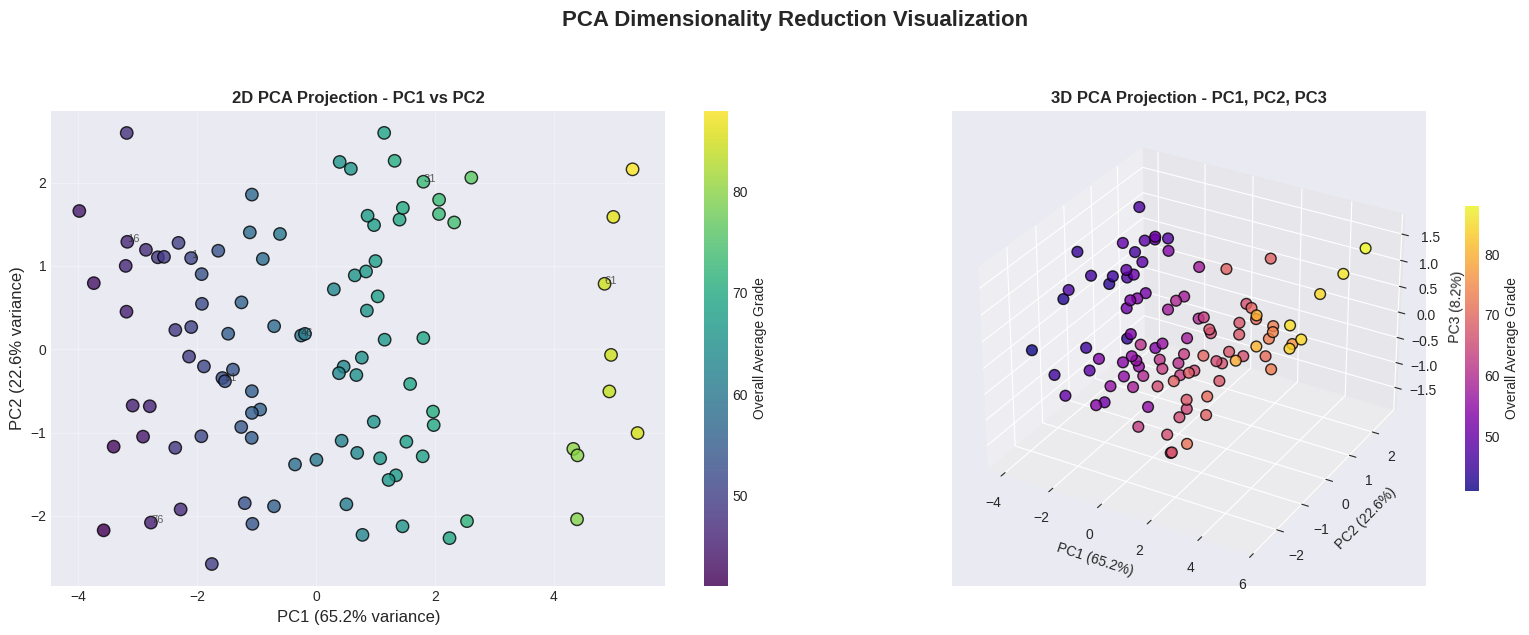

PCA Visualization Insights:
• Clear separation of students based on overall performance
• Potential clusters visible in 2D and 3D space
• Outliers can be identified in PCA space
• Gradient from low to high performers follows PC1 direction


In [ ]:
# ============================================
# 4.3 PCA Visualization (2D & 3D)
# ============================================

print("\n4.3 PCA Visualization - 2D & 3D Projections")
print("-" * 40)

# Create figure for 2D and 3D visualization
fig = plt.figure(figsize=(16, 6))

# 2D Scatter Plot (PC1 vs PC2)
ax1 = fig.add_subplot(121)
scatter = ax1.scatter(X_pca[:, 0], X_pca[:, 1],
                     c=df['overall_avg'], cmap='viridis',
                     s=80, alpha=0.8, edgecolors='black')
ax1.set_xlabel(f'PC1 ({explained_variance[0]*100:.1f}% variance)', fontsize=12)
ax1.set_ylabel(f'PC2 ({explained_variance[1]*100:.1f}% variance)', fontsize=12)
ax1.set_title('2D PCA Projection - PC1 vs PC2', fontweight='bold')
plt.colorbar(scatter, ax=ax1, label='Overall Average Grade')
ax1.grid(True, alpha=0.3)

# Add student labels for some points
for i in range(0, len(df), 15):  # Label every 15th student
    ax1.annotate(str(int(df.iloc[i]['student_id'])),
                (X_pca[i, 0], X_pca[i, 1]),
                fontsize=8, alpha=0.7)

# 3D Scatter Plot (PC1, PC2, PC3)
ax2 = fig.add_subplot(122, projection='3d')
scatter3d = ax2.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                       c=df['overall_avg'], cmap='plasma',
                       s=60, alpha=0.8, edgecolors='black')
ax2.set_xlabel(f'PC1 ({explained_variance[0]*100:.1f}%)', fontsize=10)
ax2.set_ylabel(f'PC2 ({explained_variance[1]*100:.1f}%)', fontsize=10)
ax2.set_zlabel(f'PC3 ({explained_variance[2]*100:.1f}%)', fontsize=10)
ax2.set_title('3D PCA Projection - PC1, PC2, PC3', fontweight='bold')
fig.colorbar(scatter3d, ax=ax2, label='Overall Average Grade', shrink=0.6)

plt.suptitle('PCA Dimensionality Reduction Visualization', fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

print("PCA Visualization Insights:")
print("• Clear separation of students based on overall performance")
print("• Potential clusters visible in 2D and 3D space")
print("• Outliers can be identified in PCA space")
print("• Gradient from low to high performers follows PC1 direction")


4.4 Component Interpretation & Biplot Analysis
----------------------------------------


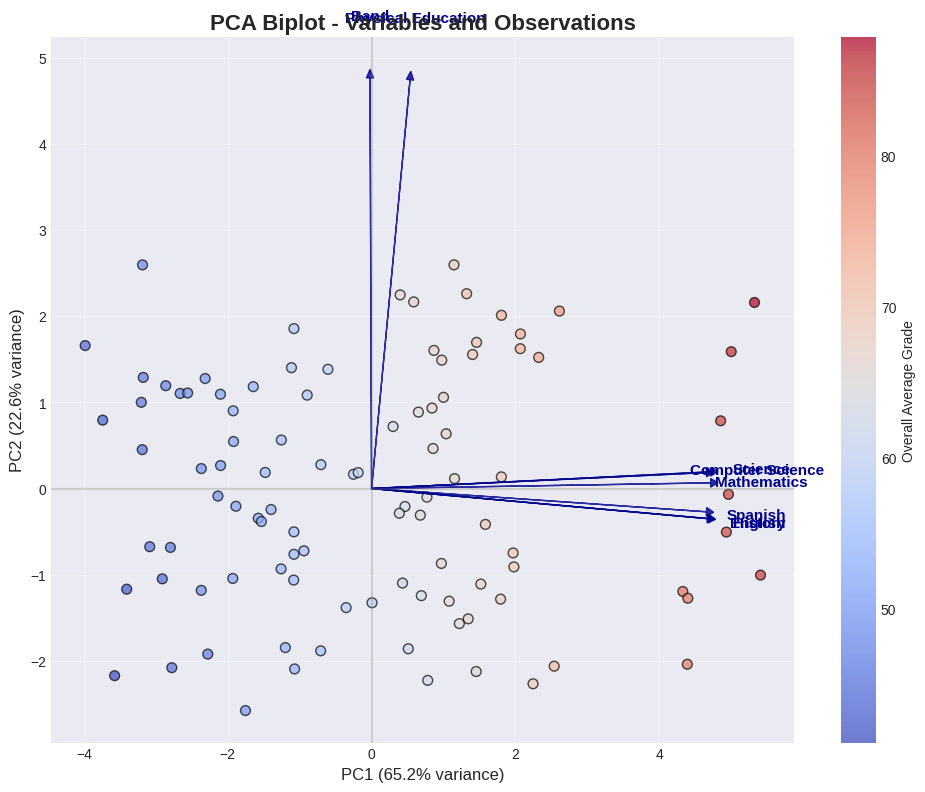


Principal Component Loadings (First 3 Components):
                      PC1    PC2    PC3
Mathematics         0.411  0.010  0.397
Science             0.411  0.029  0.382
Computer Science    0.405  0.027  0.437
Band               -0.002  0.706 -0.090
English             0.407 -0.052 -0.412
History             0.408 -0.052 -0.397
Spanish             0.406 -0.040 -0.411
Physical Education  0.047  0.702 -0.031

Component Interpretation:
PC1 (Most Important):
  Positive weights: Mathematics, Science, History
  Negative weights: Band, Physical Education, Computer Science
  Interpretation: Overall academic performance indicator

PC2 (Second Most Important):
  Positive weights: Band, Physical Education, Science
  Negative weights: English, History, Spanish
  Interpretation: STEM vs Humanities differentiation

Dimensionality Reduction Summary:
  Original dimensions: 8
  Dimensions for 85% variance: 2
  Dimensions for 90% variance: 3
  Dimensions for 95% variance: 3
  Compression ratio (2 comp

In [ ]:
# ============================================
# 4.4 Component Interpretation & Biplot
# ============================================

print("\n4.4 Component Interpretation & Biplot Analysis")
print("-" * 40)

# Get PCA loadings (component weights)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create biplot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the data points
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1],
                     c=df['overall_avg'], cmap='coolwarm',
                     s=50, alpha=0.7, edgecolors='black')

# Plot the variable vectors
arrow_scale = 5  # Scale factor for arrows
for i, (col, name) in enumerate(zip(subject_cols, subject_names)):
    ax.arrow(0, 0,
             loadings[i, 0] * arrow_scale,
             loadings[i, 1] * arrow_scale,
             head_width=0.1, head_length=0.1,
             fc='darkblue', ec='darkblue', alpha=0.8)
    ax.text(loadings[i, 0] * arrow_scale * 1.15,
            loadings[i, 1] * arrow_scale * 1.15,
            name, color='darkblue', fontsize=11, fontweight='bold',
            ha='center', va='center')

ax.set_xlabel(f'PC1 ({explained_variance[0]*100:.1f}% variance)', fontsize=12)
ax.set_ylabel(f'PC2 ({explained_variance[1]*100:.1f}% variance)', fontsize=12)
ax.set_title('PCA Biplot - Variables and Observations', fontsize=16, fontweight='bold')
plt.colorbar(scatter, label='Overall Average Grade')
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='grey', linestyle='-', alpha=0.3)
ax.axvline(x=0, color='grey', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()

# Analyze component loadings
print("\nPrincipal Component Loadings (First 3 Components):")
loadings_df = pd.DataFrame(pca.components_.T[:, :3],
                          index=subject_names,
                          columns=[f'PC{i+1}' for i in range(3)])
print(loadings_df.round(3))

print("\nComponent Interpretation:")
print("PC1 (Most Important):")
pc1_positive = loadings_df.nlargest(3, 'PC1').index.tolist()
pc1_negative = loadings_df.nsmallest(3, 'PC1').index.tolist()
print(f"  Positive weights: {', '.join(pc1_positive)}")
print(f"  Negative weights: {', '.join(pc1_negative)}")
print(f"  Interpretation: Overall academic performance indicator")

print("\nPC2 (Second Most Important):")
pc2_positive = loadings_df.nlargest(3, 'PC2').index.tolist()
pc2_negative = loadings_df.nsmallest(3, 'PC2').index.tolist()
print(f"  Positive weights: {', '.join(pc2_positive)}")
print(f"  Negative weights: {', '.join(pc2_negative)}")
print(f"  Interpretation: STEM vs Humanities differentiation")

# Calculate explained variance by first n components
print(f"\nDimensionality Reduction Summary:")
print(f"  Original dimensions: {X.shape[1]}")
print(f"  Dimensions for 85% variance: {optimal_85}")
print(f"  Dimensions for 90% variance: {optimal_90}")
print(f"  Dimensions for 95% variance: {optimal_95}")
print(f"  Compression ratio (2 components): {2/X.shape[1]*100:.1f}% of original dimensions")


4.4 PCA Biplot - Variable Contribution Analysis
----------------------------------------


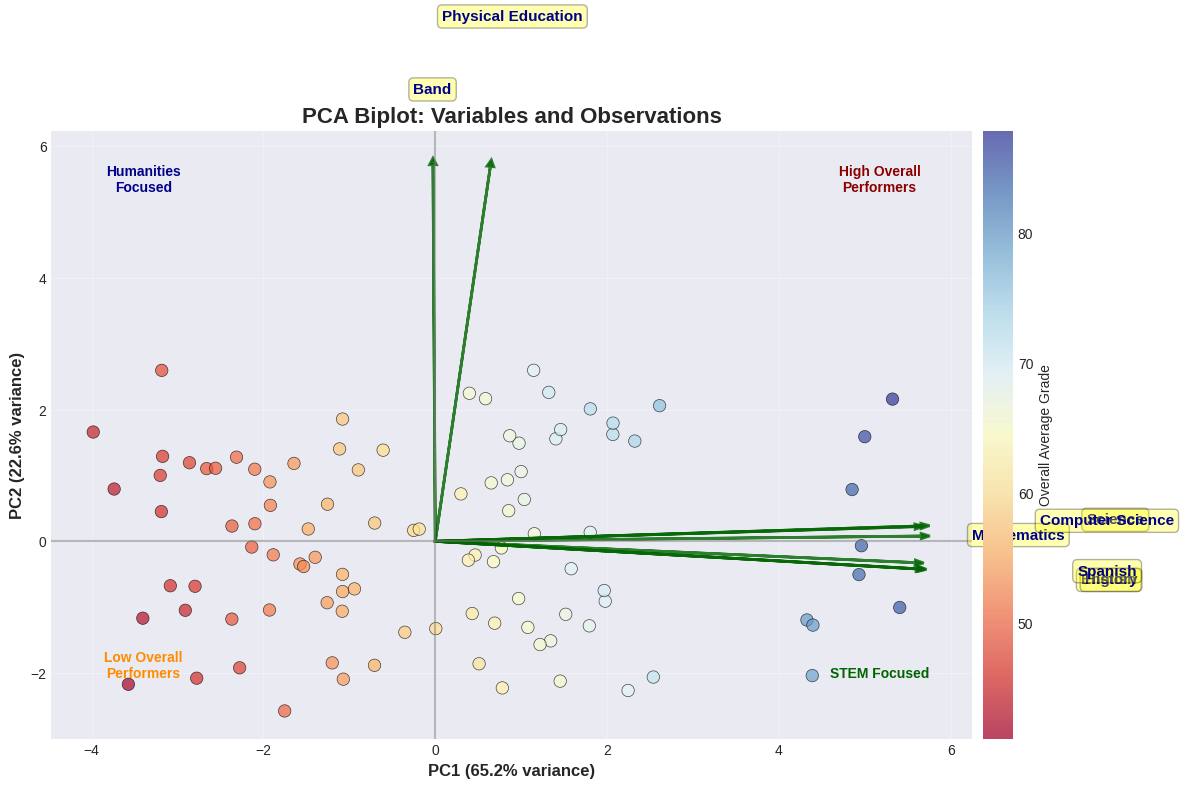

In [ ]:
# ============================================
# 4.4 Fixed Biplot
# ============================================

print("\n4.4 PCA Biplot - Variable Contribution Analysis")
print("-" * 40)

# Create biplot with adjusted text positions
fig, ax = plt.subplots(figsize=(12, 8))

# Plot data points with performance coloring
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1],
                     c=df['overall_avg'], cmap='RdYlBu',
                     s=80, alpha=0.7, edgecolors='black', linewidth=0.5)

# Get loadings for arrows
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Plot arrows with adjusted positions
arrow_scale = 6
text_positions = {}

for i, (col, name) in enumerate(zip(subject_cols, subject_names)):
    # Calculate arrow end point
    x_end = loadings[i, 0] * arrow_scale
    y_end = loadings[i, 1] * arrow_scale

    # Plot arrow
    ax.arrow(0, 0, x_end, y_end,
             head_width=0.08, head_length=0.1,
             fc='darkgreen', ec='darkgreen', alpha=0.8, linewidth=2)

    # Calculate text position (adjust to avoid overlap)
    text_x = x_end * 1.2
    text_y = y_end * 1.2

    # Check for overlap and adjust if needed
    overlap = False
    for (other_x, other_y), other_name in text_positions.items():
        distance = np.sqrt((text_x - other_x)**2 + (text_y - other_y)**2)
        if distance < 1.0:  # If too close
            # Adjust position
            angle = np.arctan2(y_end, x_end)
            text_x = x_end * 1.4
            text_y = y_end * 1.4
            break

    text_positions[(text_x, text_y)] = name

    # Add text
    ax.text(text_x, text_y, name,
            fontsize=11, fontweight='bold', color='darkblue',
            ha='center', va='center',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.3))

ax.set_xlabel(f'PC1 ({explained_variance[0]*100:.1f}% variance)', fontsize=12, fontweight='bold')
ax.set_ylabel(f'PC2 ({explained_variance[1]*100:.1f}% variance)', fontsize=12, fontweight='bold')
ax.set_title('PCA Biplot: Variables and Observations', fontsize=16, fontweight='bold')
plt.colorbar(scatter, label='Overall Average Grade', pad=0.01)

# Add quadrant labels
ax.text(0.9, 0.9, 'High Overall\nPerformers', transform=ax.transAxes,
        fontsize=10, fontweight='bold', color='darkred', ha='center')
ax.text(0.1, 0.9, 'Humanities\nFocused', transform=ax.transAxes,
        fontsize=10, fontweight='bold', color='darkblue', ha='center')
ax.text(0.9, 0.1, 'STEM Focused', transform=ax.transAxes,
        fontsize=10, fontweight='bold', color='darkgreen', ha='center')
ax.text(0.1, 0.1, 'Low Overall\nPerformers', transform=ax.transAxes,
        fontsize=10, fontweight='bold', color='darkorange', ha='center')

ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='grey', linestyle='-', alpha=0.5)
ax.axvline(x=0, color='grey', linestyle='-', alpha=0.5)

plt.tight_layout()
plt.show()

4.3.1 Basic 2D PCA Projection
----------------------------------------


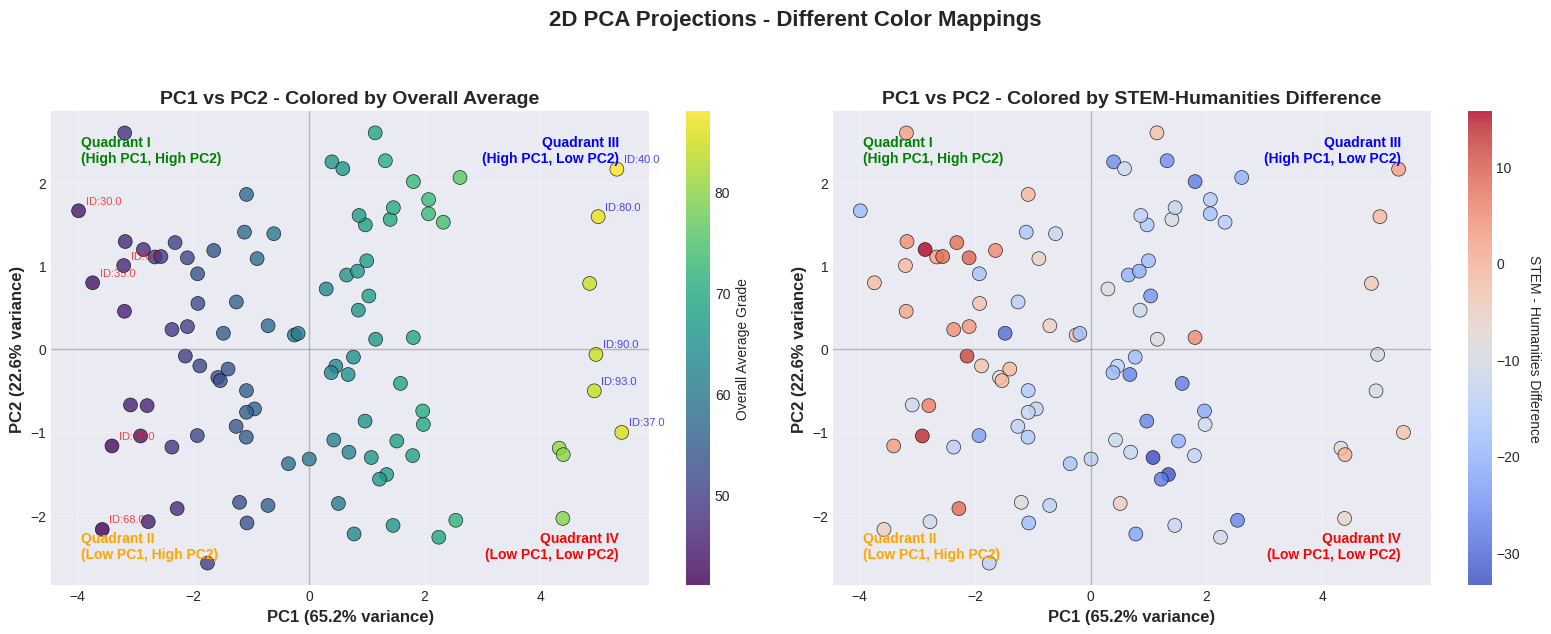

2D PCA Projection Insights:
• PC1 strongly correlates with overall performance (left=low, right=high)
• PC2 separates STEM-focused (top) from Humanities-focused (bottom) students
• Four distinct quadrants represent different student profiles


In [ ]:
# ============================================
# 4.3.1 Basic 2D PCA Projection
# ============================================

print("4.3.1 Basic 2D PCA Projection")
print("-" * 40)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: PC1 vs PC2 colored by overall average
scatter1 = ax1.scatter(X_pca[:, 0], X_pca[:, 1],
                      c=df['overall_avg'], cmap='viridis',
                      s=100, alpha=0.8, edgecolors='black', linewidth=0.5)
ax1.set_xlabel(f'PC1 ({explained_variance[0]*100:.1f}% variance)', fontsize=12, fontweight='bold')
ax1.set_ylabel(f'PC2 ({explained_variance[1]*100:.1f}% variance)', fontsize=12, fontweight='bold')
ax1.set_title('PC1 vs PC2 - Colored by Overall Average', fontsize=14, fontweight='bold')
plt.colorbar(scatter1, ax=ax1, label='Overall Average Grade')

# Add student ID labels for extreme points
extreme_indices = np.argsort(X_pca[:, 0])[:5]  # Leftmost (low PC1)
for idx in extreme_indices:
    ax1.annotate(f"ID:{df.iloc[idx]['student_id']}",
                (X_pca[idx, 0], X_pca[idx, 1]),
                xytext=(5, 5), textcoords='offset points',
                fontsize=8, alpha=0.7, color='red')

extreme_indices = np.argsort(X_pca[:, 0])[-5:]  # Rightmost (high PC1)
for idx in extreme_indices:
    ax1.annotate(f"ID:{df.iloc[idx]['student_id']}",
                (X_pca[idx, 0], X_pca[idx, 1]),
                xytext=(5, 5), textcoords='offset points',
                fontsize=8, alpha=0.7, color='blue')

# Plot 2: PC1 vs PC2 colored by STEM-Humanities difference
df['stem_hum_diff'] = df['stem_avg'] - df['humanities_avg']
scatter2 = ax2.scatter(X_pca[:, 0], X_pca[:, 1],
                      c=df['stem_hum_diff'], cmap='coolwarm',
                      s=100, alpha=0.8, edgecolors='black', linewidth=0.5)
ax2.set_xlabel(f'PC1 ({explained_variance[0]*100:.1f}% variance)', fontsize=12, fontweight='bold')
ax2.set_ylabel(f'PC2 ({explained_variance[1]*100:.1f}% variance)', fontsize=12, fontweight='bold')
ax2.set_title('PC1 vs PC2 - Colored by STEM-Humanities Difference', fontsize=14, fontweight='bold')
cbar = plt.colorbar(scatter2, ax=ax2)
cbar.set_label('STEM - Humanities Difference', rotation=270, labelpad=15)

# Add quadrant lines
for ax in [ax1, ax2]:
    ax.axhline(y=0, color='gray', linestyle='-', alpha=0.5, linewidth=1)
    ax.axvline(x=0, color='gray', linestyle='-', alpha=0.5, linewidth=1)
    ax.grid(True, alpha=0.3)

    # Add quadrant labels
    ax.text(0.05, 0.95, 'Quadrant I\n(High PC1, High PC2)', transform=ax.transAxes,
            fontsize=10, fontweight='bold', color='green', va='top')
    ax.text(0.05, 0.05, 'Quadrant II\n(Low PC1, High PC2)', transform=ax.transAxes,
            fontsize=10, fontweight='bold', color='orange', va='bottom')
    ax.text(0.95, 0.95, 'Quadrant III\n(High PC1, Low PC2)', transform=ax.transAxes,
            fontsize=10, fontweight='bold', color='blue', ha='right', va='top')
    ax.text(0.95, 0.05, 'Quadrant IV\n(Low PC1, Low PC2)', transform=ax.transAxes,
            fontsize=10, fontweight='bold', color='red', ha='right', va='bottom')

plt.suptitle('2D PCA Projections - Different Color Mappings', fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

print("2D PCA Projection Insights:")
print("• PC1 strongly correlates with overall performance (left=low, right=high)")
print("• PC2 separates STEM-focused (top) from Humanities-focused (bottom) students")
print("• Four distinct quadrants represent different student profiles")


4.3.2 Enhanced 2D PCA with Performance Groups
----------------------------------------


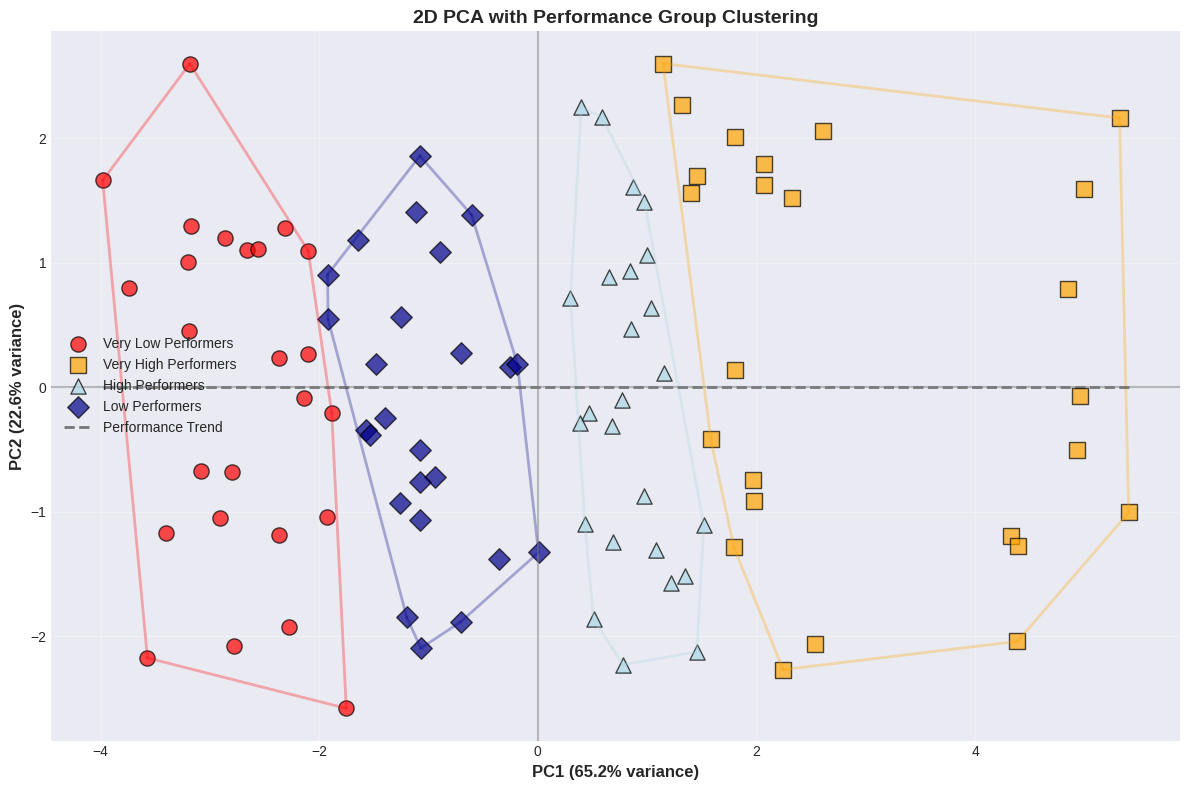

Performance Group Analysis in PCA Space:
  Very Low  : 25 students | Mean PC1: -2.73 | Mean PC2: -0.03
  Very High : 25 students | Mean PC1: 2.95 | Mean PC2: 0.32
  High      : 25 students | Mean PC1: 0.84 | Mean PC2: -0.14
  Low       : 25 students | Mean PC1: -1.05 | Mean PC2: -0.15


In [ ]:
# ============================================
# 4.3.2 Enhanced 2D PCA with Performance Groups
# ============================================

print("\n4.3.2 Enhanced 2D PCA with Performance Groups")
print("-" * 40)

# Create performance groups
df['performance_group'] = pd.qcut(df['overall_avg'], q=4,
                                   labels=['Very Low', 'Low', 'High', 'Very High'])

fig, ax = plt.subplots(figsize=(12, 8))

# Create scatter plot with different markers for each group
groups = df['performance_group'].unique()
markers = ['o', 's', '^', 'D']  # Circle, Square, Triangle, Diamond
colors = ['red', 'orange', 'lightblue', 'darkblue']

for group, marker, color in zip(groups, markers, colors):
    mask = df['performance_group'] == group
    ax.scatter(X_pca[mask, 0], X_pca[mask, 1],
               s=120, alpha=0.7, edgecolors='black', linewidth=1,
               marker=marker, color=color, label=f'{group} Performers')

ax.set_xlabel(f'PC1 ({explained_variance[0]*100:.1f}% variance)', fontsize=12, fontweight='bold')
ax.set_ylabel(f'PC2 ({explained_variance[1]*100:.1f}% variance)', fontsize=12, fontweight='bold')
ax.set_title('2D PCA with Performance Group Clustering', fontsize=14, fontweight='bold')
ax.legend(title='Performance Group', fontsize=10, title_fontsize=11)

# Add convex hulls for each group
from scipy.spatial import ConvexHull
for group, color in zip(groups, colors):
    mask = df['performance_group'] == group
    if sum(mask) > 2:  # Need at least 3 points for convex hull
        points = X_pca[mask, :2]
        hull = ConvexHull(points)
        for simplex in hull.simplices:
            ax.plot(points[simplex, 0], points[simplex, 1],
                   color=color, alpha=0.3, linewidth=2)

# Add density contours
from scipy.stats import gaussian_kde
xy = np.vstack([X_pca[:, 0], X_pca[:, 1]])
z = gaussian_kde(xy)(xy)
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=z, s=0, alpha=0)  # Just for scaling

# Add performance trend line
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_pca[:, 0].reshape(-1, 1), X_pca[:, 1])
x_line = np.array([X_pca[:, 0].min(), X_pca[:, 0].max()])
y_line = reg.predict(x_line.reshape(-1, 1))
ax.plot(x_line, y_line, 'k--', linewidth=2, alpha=0.5, label='Performance Trend')

ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='gray', linestyle='-', alpha=0.5)
ax.axvline(x=0, color='gray', linestyle='-', alpha=0.5)
ax.legend()

plt.tight_layout()
plt.show()

print("Performance Group Analysis in PCA Space:")
for group in groups:
    group_data = df[df['performance_group'] == group]
    mean_pc1 = X_pca[group_data.index, 0].mean()
    mean_pc2 = X_pca[group_data.index, 1].mean()
    print(f"  {group:10s}: {len(group_data)} students | Mean PC1: {mean_pc1:.2f} | Mean PC2: {mean_pc2:.2f}")


4.3.3 3D PCA Visualization
----------------------------------------


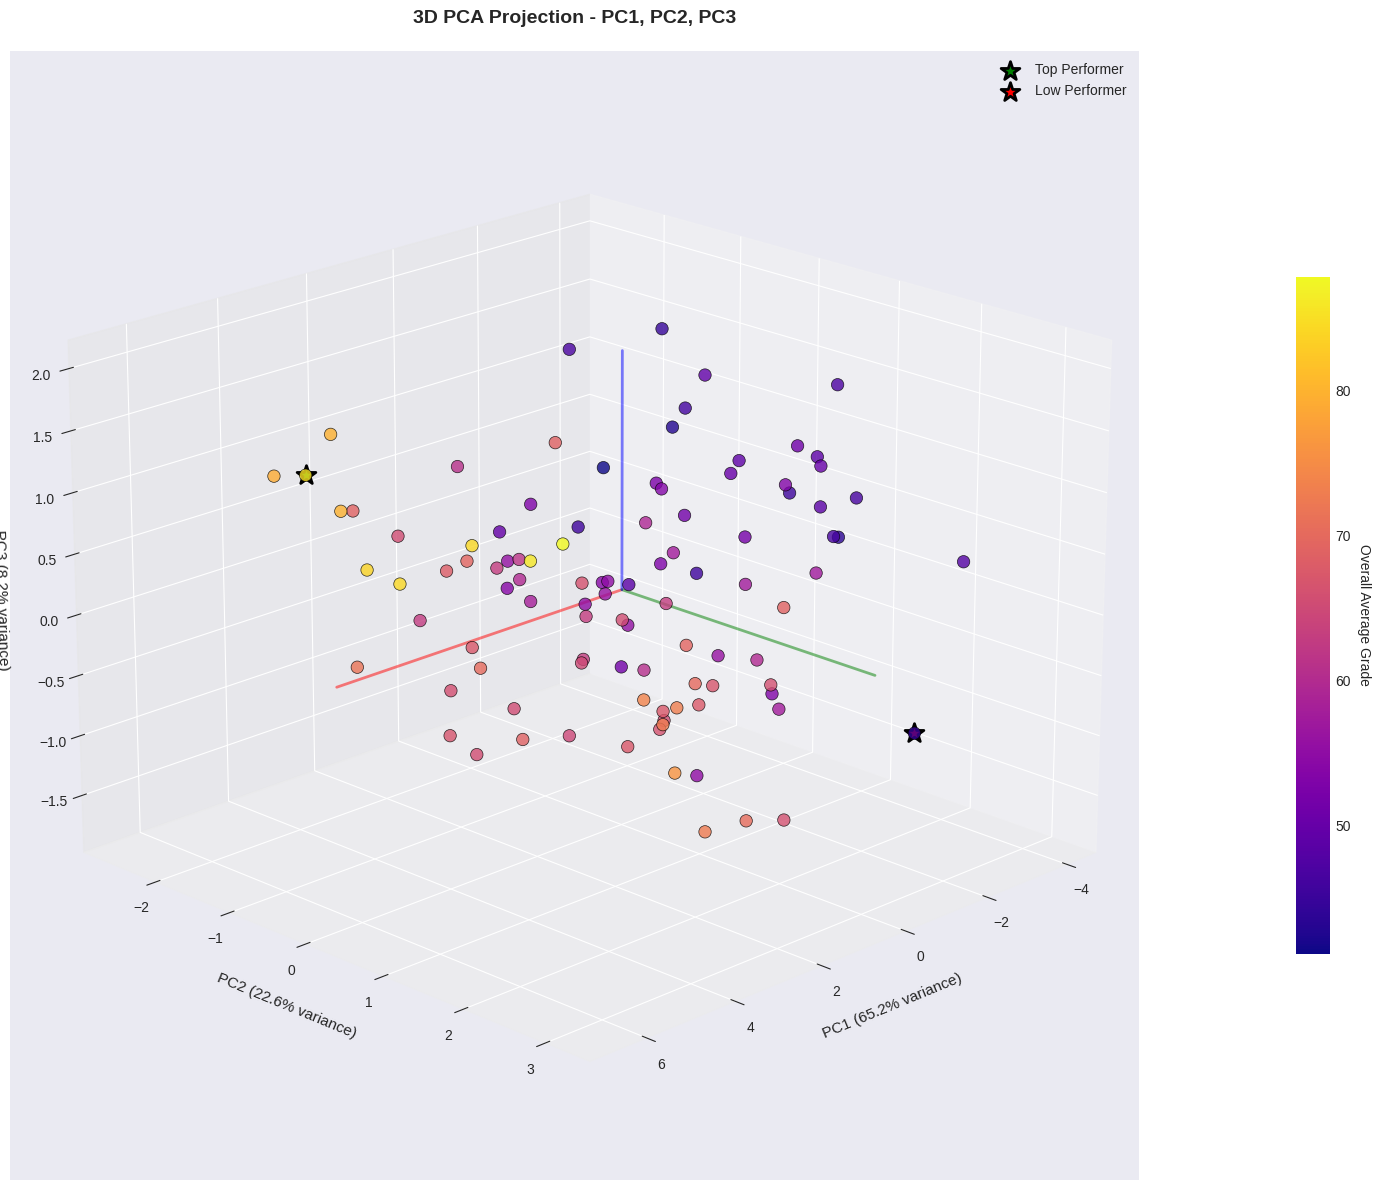

3D PCA Insights:
• PC1 (Red axis): Primary performance dimension
• PC2 (Green axis): Subject preference dimension
• PC3 (Blue axis): Additional nuanced performance patterns
• Clusters are more separated in 3D space


In [ ]:
# ============================================
# 4.3.3 Interactive 3D PCA Plot
# ============================================

print("\n4.3.3 3D PCA Visualization")
print("-" * 40)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16, 12))

# Create 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Create color based on performance
colors = plt.cm.plasma((df['overall_avg'] - df['overall_avg'].min()) /
                       (df['overall_avg'].max() - df['overall_avg'].min()))

# Plot 3D scatter
scatter3d = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                       c=colors, s=80, alpha=0.8, edgecolors='black', linewidth=0.5)

ax.set_xlabel(f'PC1 ({explained_variance[0]*100:.1f}% variance)', fontsize=11, labelpad=10)
ax.set_ylabel(f'PC2 ({explained_variance[1]*100:.1f}% variance)', fontsize=11, labelpad=10)
ax.set_zlabel(f'PC3 ({explained_variance[2]*100:.1f}% variance)', fontsize=11, labelpad=10)
ax.set_title('3D PCA Projection - PC1, PC2, PC3', fontsize=14, fontweight='bold', pad=20)

# Add colorbar
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='plasma',
                                          norm=plt.Normalize(df['overall_avg'].min(),
                                                           df['overall_avg'].max())),
                    ax=ax, shrink=0.6, pad=0.1)
cbar.set_label('Overall Average Grade', rotation=270, labelpad=15)

# Highlight extreme points
extreme_idx = np.argmax(X_pca[:, 0])  # Highest PC1
ax.scatter(X_pca[extreme_idx, 0], X_pca[extreme_idx, 1], X_pca[extreme_idx, 2],
           s=200, color='green', edgecolors='black', linewidth=2, marker='*', label='Top Performer')

extreme_idx = np.argmin(X_pca[:, 0])  # Lowest PC1
ax.scatter(X_pca[extreme_idx, 0], X_pca[extreme_idx, 1], X_pca[extreme_idx, 2],
           s=200, color='red', edgecolors='black', linewidth=2, marker='*', label='Low Performer')

# Add connecting lines from origin for axes
ax.plot([0, X_pca[:, 0].max()*1.2], [0, 0], [0, 0], 'r-', linewidth=2, alpha=0.5)
ax.plot([0, 0], [0, X_pca[:, 1].max()*1.2], [0, 0], 'g-', linewidth=2, alpha=0.5)
ax.plot([0, 0], [0, 0], [0, X_pca[:, 2].max()*1.2], 'b-', linewidth=2, alpha=0.5)

# Set viewing angle
ax.view_init(elev=20, azim=45)

# Add legend
ax.legend()

plt.tight_layout()
plt.show()

print("3D PCA Insights:")
print("• PC1 (Red axis): Primary performance dimension")
print("• PC2 (Green axis): Subject preference dimension")
print("• PC3 (Blue axis): Additional nuanced performance patterns")
print("• Clusters are more separated in 3D space")


4.3.4 Multiple 2D Projection Combinations
----------------------------------------


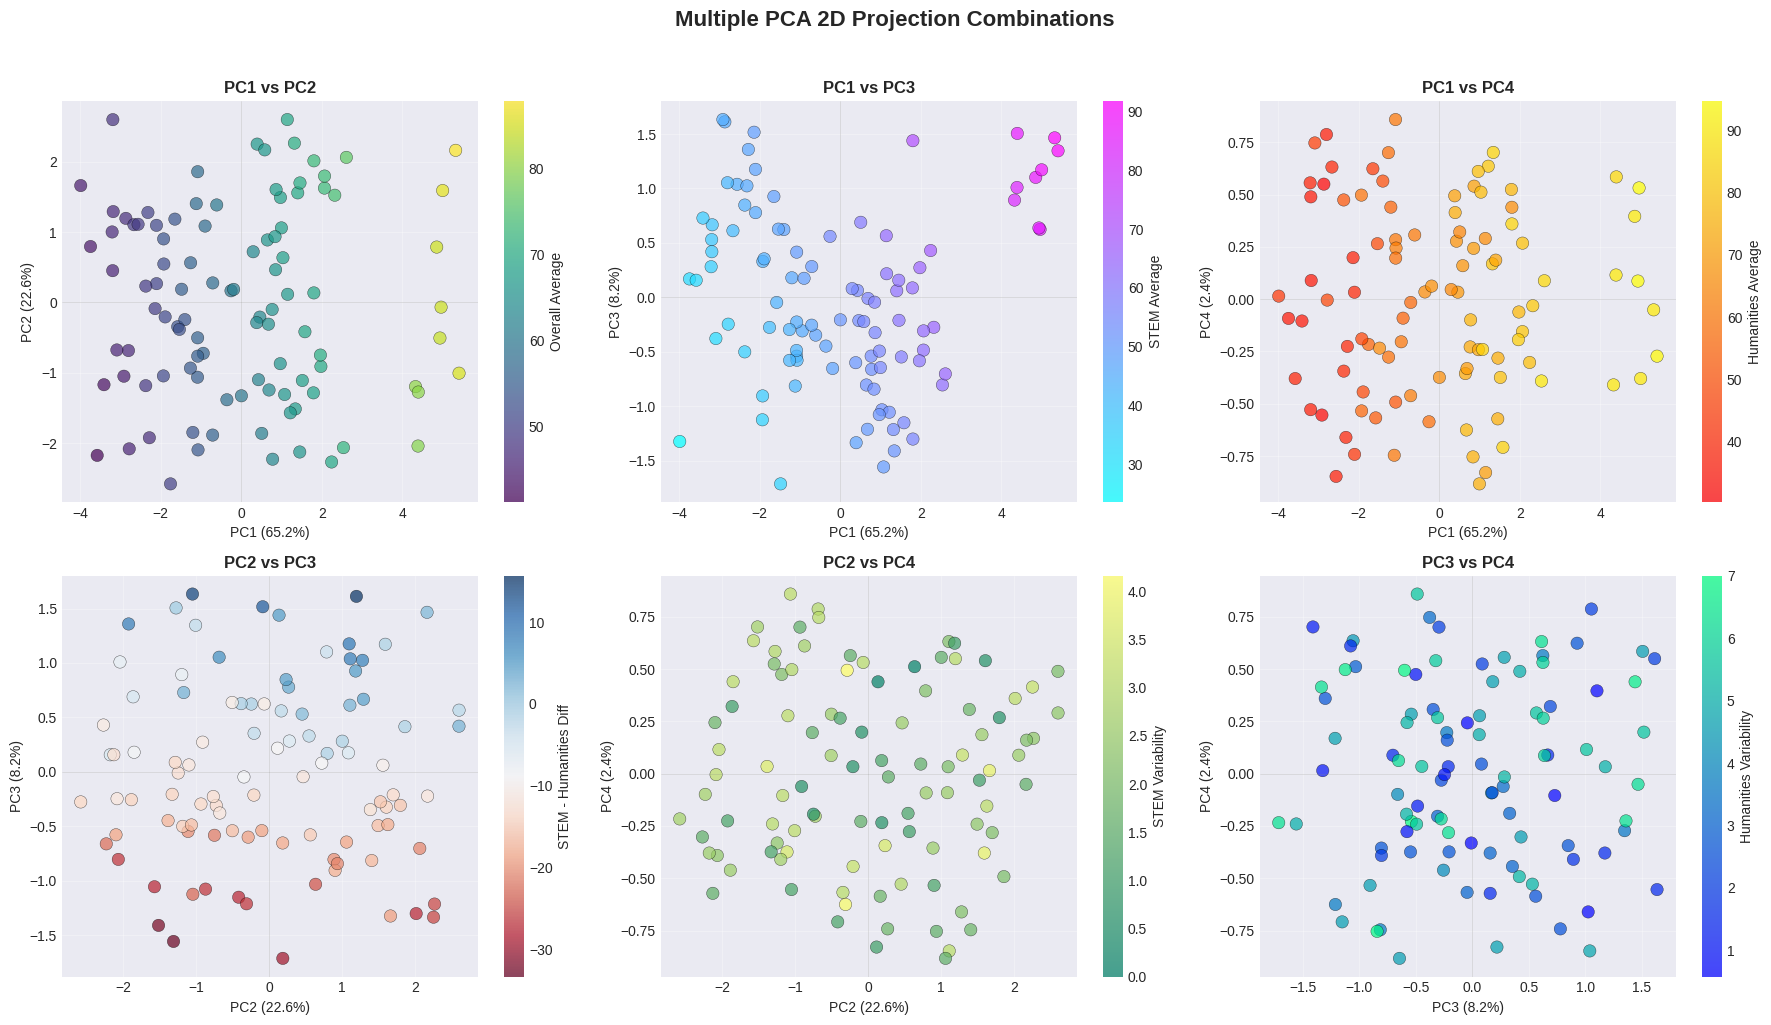

Multiple Projection Insights:
• Different PC combinations reveal different student patterns
• PC1 appears in most visualizations as the dominant dimension
• Later PCs capture more nuanced performance variations


In [ ]:
# ============================================
# 4.3.4 Multiple 2D Projection Combinations
# ============================================

print("\n4.3.4 Multiple 2D Projection Combinations")
print("-" * 40)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Define projection pairs to visualize
projection_pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
titles = ['PC1 vs PC2', 'PC1 vs PC3', 'PC1 vs PC4',
          'PC2 vs PC3', 'PC2 vs PC4', 'PC3 vs PC4']

for idx, ((pc1_idx, pc2_idx), ax, title) in enumerate(zip(projection_pairs, axes.flatten(), titles)):
    # Color by different metrics
    if idx == 0:
        color_data = df['overall_avg']
        cmap = 'viridis'
        label = 'Overall Average'
    elif idx == 1:
        color_data = df['stem_avg']
        cmap = 'cool'
        label = 'STEM Average'
    elif idx == 2:
        color_data = df['humanities_avg']
        cmap = 'autumn'
        label = 'Humanities Average'
    elif idx == 3:
        color_data = df['stem_hum_diff']
        cmap = 'RdBu'
        label = 'STEM - Humanities Diff'
    elif idx == 4:
        color_data = df[['math', 'science', 'cs']].std(axis=1)
        cmap = 'summer'
        label = 'STEM Variability'
    else:
        color_data = df[['english', 'history', 'spanish']].std(axis=1)
        cmap = 'winter'
        label = 'Humanities Variability'

    scatter = ax.scatter(X_pca[:, pc1_idx], X_pca[:, pc2_idx],
                        c=color_data, cmap=cmap,
                        s=80, alpha=0.7, edgecolors='black', linewidth=0.3)

    ax.set_xlabel(f'PC{pc1_idx+1} ({explained_variance[pc1_idx]*100:.1f}%)', fontsize=10)
    ax.set_ylabel(f'PC{pc2_idx+1} ({explained_variance[pc2_idx]*100:.1f}%)', fontsize=10)
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)

    # Add colorbar
    plt.colorbar(scatter, ax=ax, label=label)

    # Add zero lines
    ax.axhline(y=0, color='gray', linestyle='-', alpha=0.3, linewidth=0.5)
    ax.axvline(x=0, color='gray', linestyle='-', alpha=0.3, linewidth=0.5)

plt.suptitle('Multiple PCA 2D Projection Combinations', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("Multiple Projection Insights:")
print("• Different PC combinations reveal different student patterns")
print("• PC1 appears in most visualizations as the dominant dimension")
print("• Later PCs capture more nuanced performance variations")


4.3.5 PCA Projection Evolution
----------------------------------------


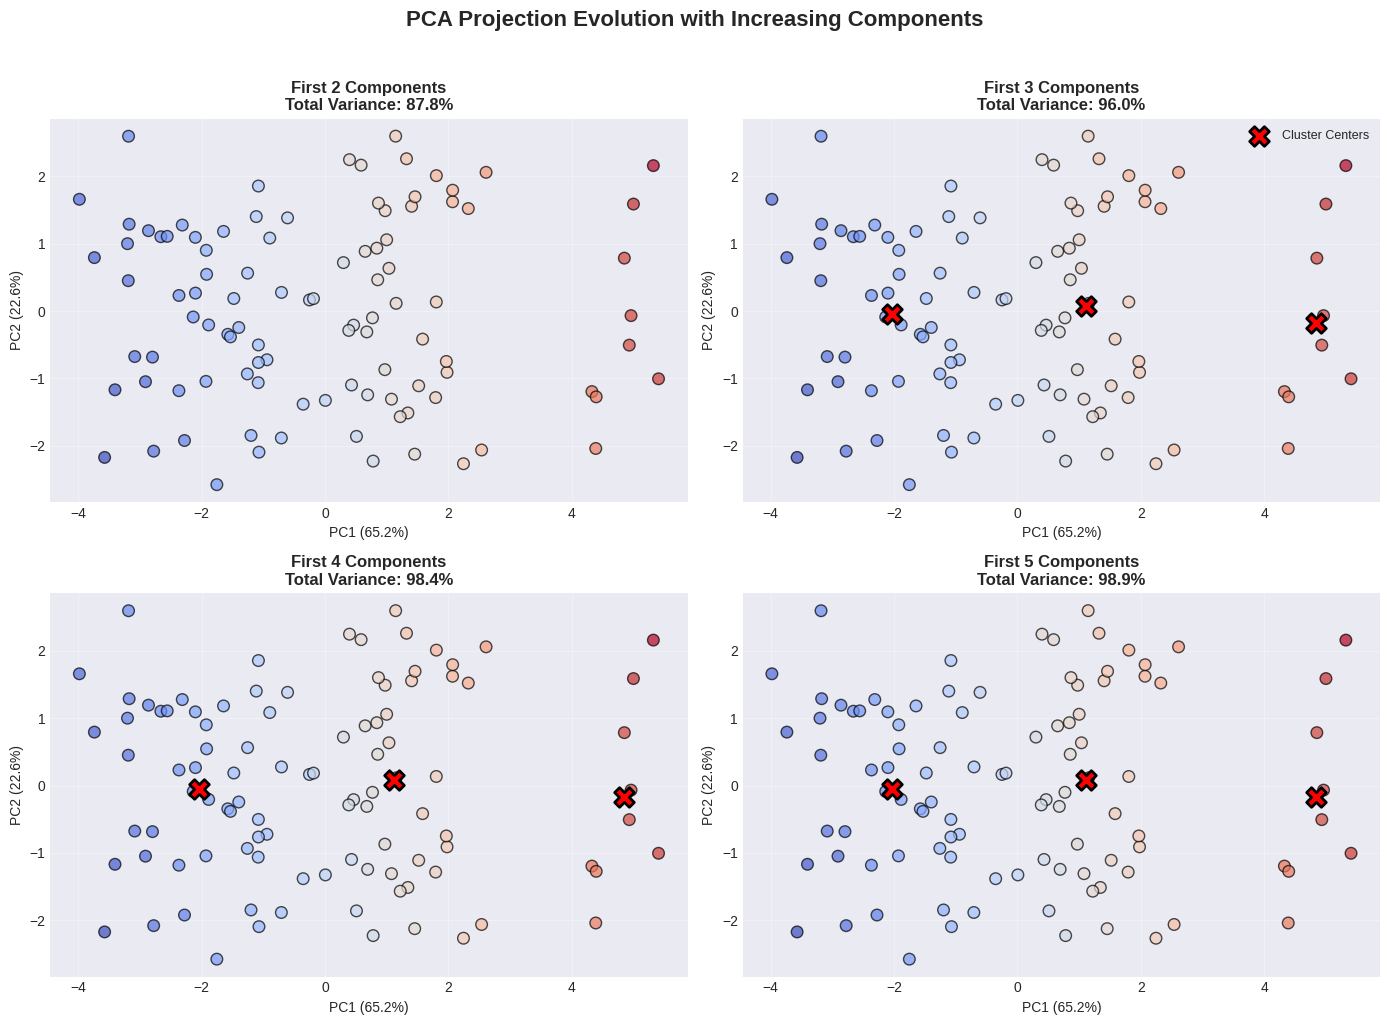

Projection Evolution Analysis:
  First 2 components: 87.8% variance | 75.0% dimension reduction
  First 3 components: 96.0% variance | 62.5% dimension reduction
  First 4 components: 98.4% variance | 50.0% dimension reduction
  First 5 components: 98.9% variance | 37.5% dimension reduction


In [ ]:
# ============================================
# 4.3.5 PCA Projection Evolution (Fixed)
# ============================================

print("\n4.3.5 PCA Projection Evolution")
print("-" * 40)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Define component combinations with proper structure
component_configs = [
    {'combo': (0, 1), 'title': 'First 2 Components', 'variance_idx': 1},
    {'combo': (0, 1, 2), 'title': 'First 3 Components', 'variance_idx': 2},
    {'combo': (0, 1, 2, 3), 'title': 'First 4 Components', 'variance_idx': 3},
    {'combo': (0, 1, 2, 3, 4), 'title': 'First 5 Components', 'variance_idx': 4}
]

for idx, (config, ax) in enumerate(zip(component_configs, axes.flatten())):
    combo = config['combo']
    title = config['title']
    variance_idx = config['variance_idx']

    # For 2D visualization, use first two components of the combo
    pc1_idx, pc2_idx = combo[0], combo[1]

    # Create scatter plot
    scatter = ax.scatter(X_pca[:, pc1_idx], X_pca[:, pc2_idx],
                        c=df['overall_avg'], cmap='coolwarm',
                        s=70, alpha=0.7, edgecolors='black')

    # Set labels
    ax.set_xlabel(f'PC{pc1_idx+1} ({explained_variance[pc1_idx]*100:.1f}%)', fontsize=10)
    ax.set_ylabel(f'PC{pc2_idx+1} ({explained_variance[pc2_idx]*100:.1f}%)', fontsize=10)

    # Calculate total variance explained by this combination
    total_variance = cumulative_variance[variance_idx] * 100

    # Set title
    ax.set_title(f'{title}\nTotal Variance: {total_variance:.1f}%',
                fontsize=12, fontweight='bold')

    ax.grid(True, alpha=0.3)

    # Add cluster analysis for visualization (optional)
    if idx > 0:  # For visualization purposes
        from sklearn.cluster import KMeans
        # Use all components in the combo for clustering
        kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
        clusters = kmeans.fit_predict(X_pca[:, :len(combo)])
        centers = kmeans.cluster_centers_

        # Plot cluster centers (using first two dimensions for visualization)
        ax.scatter(centers[:, pc1_idx], centers[:, pc2_idx],
                  s=200, marker='X', c='red', edgecolors='black',
                  linewidth=2, label='Cluster Centers')

        # Add cluster labels for first plot only
        if idx == 1:
            ax.legend(fontsize=9)

plt.suptitle('PCA Projection Evolution with Increasing Components',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("Projection Evolution Analysis:")
for i in range(2, 6):
    variance = cumulative_variance[i-1] * 100
    reduction = (1 - i/8) * 100
    print(f"  First {i} components: {variance:.1f}% variance | {reduction:.1f}% dimension reduction")

4.4.1 Component Loading Analysis & Biplot
----------------------------------------
Component Loadings (First 4 PCs):
                      PC1    PC2    PC3    PC4
Mathematics         0.411  0.010  0.397 -0.027
Science             0.411  0.029  0.382 -0.021
Computer Science    0.405  0.027  0.437 -0.042
Band               -0.002  0.706 -0.090 -0.699
English             0.407 -0.052 -0.412 -0.024
History             0.408 -0.052 -0.397 -0.059
Spanish             0.406 -0.040 -0.411  0.090
Physical Education  0.047  0.702 -0.031  0.704


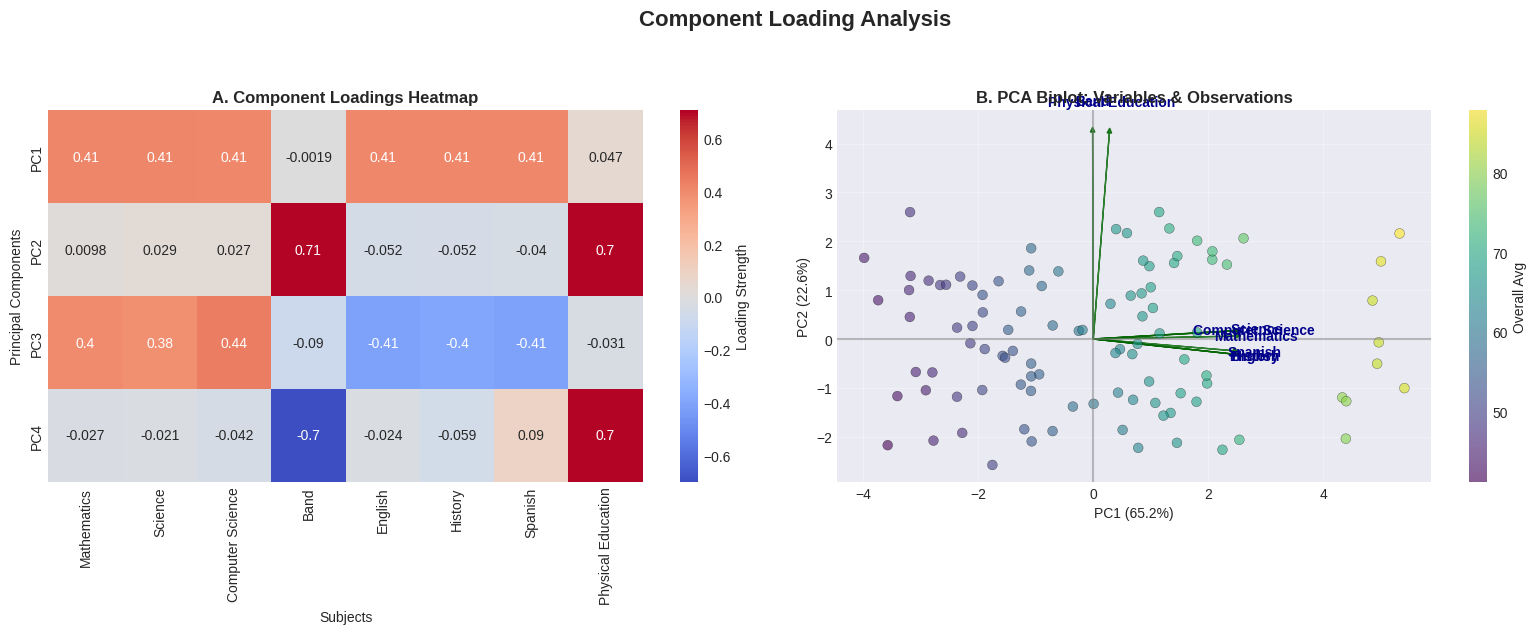


📊 COMPONENT INTERPRETATION:
----------------------------------------

PC1 (Overall Academic Performance):
  • Mathematics: 0.411
  • Science: 0.411
  • History: 0.408
  • Computer Science: 0.405
  • Physical Education: 0.047
  • Band: -0.002

PC2 (STEM vs Humanities):
  • Band: 0.706
  • Physical Education: 0.702
  • Science: 0.029
  • Spanish: -0.040
  • History: -0.052
  • English: -0.052


In [19]:
# ============================================
# 4.4.1 Component Loading Analysis & Biplot
# ============================================

print("4.4.1 Component Loading Analysis & Biplot")
print("-" * 40)

# Create loadings DataFrame
loadings = pca.components_.T
loadings_df = pd.DataFrame(
    loadings[:, :4],
    index=subject_names,
    columns=[f'PC{i+1}' for i in range(4)]
)

print("Component Loadings (First 4 PCs):")
print(loadings_df.round(3))

# Loadings heatmap
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# A. Loadings Heatmap
sns.heatmap(loadings_df.T, annot=True, cmap='coolwarm', center=0,
            xticklabels=subject_names, yticklabels=[f'PC{i+1}' for i in range(4)],
            ax=axes[0], cbar_kws={'label': 'Loading Strength'})
axes[0].set_title('A. Component Loadings Heatmap', fontweight='bold')
axes[0].set_xlabel('Subjects')
axes[0].set_ylabel('Principal Components')

# B. Biplot
arrow_scale = 6
for i, (subject, name) in enumerate(zip(subject_cols, subject_names)):
    axes[1].arrow(0, 0,
                 loadings[i, 0] * arrow_scale,
                 loadings[i, 1] * arrow_scale,
                 head_width=0.08, head_length=0.1,
                 fc='darkgreen', ec='darkgreen', alpha=0.8)
    axes[1].text(loadings[i, 0] * arrow_scale * 1.15,
                loadings[i, 1] * arrow_scale * 1.15,
                name, color='darkblue', fontsize=10, fontweight='bold',
                ha='center', va='center')

scatter = axes[1].scatter(X_pca[:, 0], X_pca[:, 1],
                         c=df['overall_avg'], cmap='viridis',
                         s=50, alpha=0.6, edgecolors='black', linewidth=0.3)
axes[1].set_xlabel(f'PC1 ({explained_variance[0]*100:.1f}%)')
axes[1].set_ylabel(f'PC2 ({explained_variance[1]*100:.1f}%)')
axes[1].set_title('B. PCA Biplot: Variables & Observations', fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].axhline(y=0, color='gray', linestyle='-', alpha=0.5)
axes[1].axvline(x=0, color='gray', linestyle='-', alpha=0.5)
plt.colorbar(scatter, ax=axes[1], label='Overall Avg')

plt.suptitle('Component Loading Analysis', fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

# PC1 Interpretation
print("\n📊 COMPONENT INTERPRETATION:")
print("-" * 40)
print("\nPC1 (Overall Academic Performance):")
pc1_top = loadings_df['PC1'].sort_values(ascending=False)
for subj, val in pc1_top.head(3).items():
    print(f"  • {subj}: {val:.3f}")
for subj, val in pc1_top.tail(3).items():
    print(f"  • {subj}: {val:.3f}")

print("\nPC2 (STEM vs Humanities):")
pc2_top = loadings_df['PC2'].sort_values(ascending=False)
for subj, val in pc2_top.head(3).items():
    print(f"  • {subj}: {val:.3f}")
for subj, val in pc2_top.tail(3).items():
    print(f"  • {subj}: {val:.3f}")


4.4.2 K-means Clustering in PCA Space
----------------------------------------


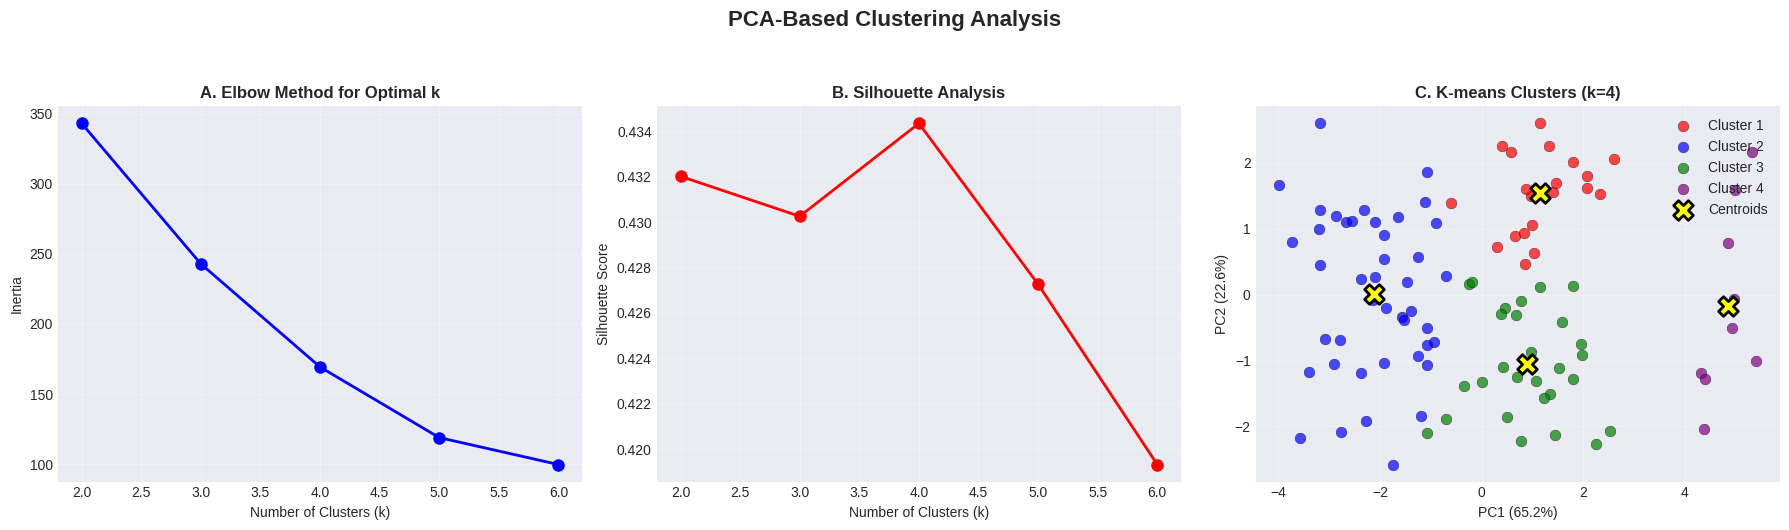

Optimal clusters: k=4 (silhouette score: 0.434)
✅ PCA clusters assigned to 100 students


In [20]:
# ============================================
# 4.4.2 K-means Clustering in PCA Space
# ============================================

print("\n4.4.2 K-means Clustering in PCA Space")
print("-" * 40)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Find optimal number of clusters
inertias = []
silhouettes = []
K_range = range(2, 7)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_pca[:, :2])
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_pca[:, :2], labels))

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# A. Elbow Method
axes[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('A. Elbow Method for Optimal k', fontweight='bold')
axes[0].grid(True, alpha=0.3)

# B. Silhouette Score
axes[1].plot(K_range, silhouettes, 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('B. Silhouette Analysis', fontweight='bold')
axes[1].grid(True, alpha=0.3)

# C. Final Clustering (k=4)
kmeans_pca = KMeans(n_clusters=4, random_state=42, n_init=10)
df['pca_cluster'] = kmeans_pca.fit_predict(X_pca[:, :2])

cluster_colors = ['red', 'blue', 'green', 'purple']
for cluster in range(4):
    mask = df['pca_cluster'] == cluster
    axes[2].scatter(X_pca[mask, 0], X_pca[mask, 1],
                   c=cluster_colors[cluster], label=f'Cluster {cluster+1}',
                   s=60, alpha=0.7, edgecolors='black', linewidth=0.3)

axes[2].scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1],
               s=200, c='yellow', marker='X', edgecolors='black', linewidth=2,
               label='Centroids')
axes[2].set_xlabel(f'PC1 ({explained_variance[0]*100:.1f}%)')
axes[2].set_ylabel(f'PC2 ({explained_variance[1]*100:.1f}%)')
axes[2].set_title('C. K-means Clusters (k=4)', fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.suptitle('PCA-Based Clustering Analysis', fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

print(f"Optimal clusters: k=4 (silhouette score: {silhouettes[2]:.3f})")
print(f"✅ PCA clusters assigned to {len(df)} students")


4.4.3 Cluster Profile Analysis & Interpretation
----------------------------------------

📊 PCA CLUSTER PROFILES:
 Cluster  Students  Percentage  Overall Avg  STEM Avg  Humanities Avg  STEM Focus  Math  Science   CS  English  History  Spanish  Band  PhysEd
       1        20        20.0         68.4      57.2            73.9       False  57.3     57.8 56.4     71.2     73.2     77.3  76.9    77.0
       2        43        43.0         50.4      42.3            46.5       False  42.3     42.1 42.6     44.6     46.8     48.0  69.9    66.9
       3        28        28.0         64.3      55.8            73.1       False  55.5     56.6 55.1     70.4     73.9     75.0  65.9    61.7
       4         9         9.0         83.3      86.1            90.5       False  87.2     85.4 85.7     87.0     90.6     94.0  68.3    68.6


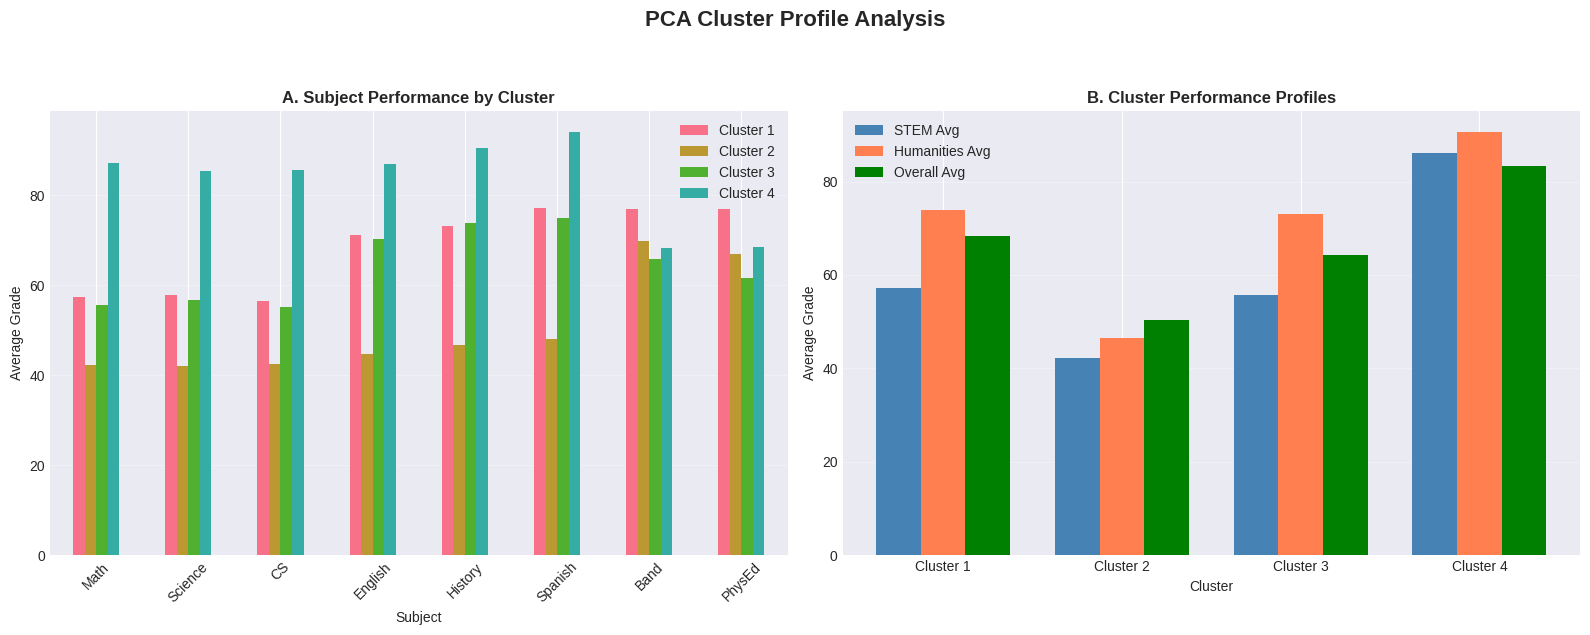


🔍 CLUSTER INTERPRETATIONS:
----------------------------------------

Cluster 1: 20 students (20.0%)
  • Performance: Medium (Avg: 68.4)
  • Profile: Humanities-focused
  • Strengths: Spanish, Band, PhysEd
  • Areas for improvement: Math, Science, CS

Cluster 2: 43 students (43.0%)
  • Performance: Low (Avg: 50.4)
  • Profile: Humanities-focused
  • Strengths: Band, PhysEd
  • Areas for improvement: Math, Science, CS

Cluster 3: 28 students (28.0%)
  • Performance: Medium (Avg: 64.3)
  • Profile: Humanities-focused
  • Strengths: English, History, Spanish
  • Areas for improvement: Math, Science, CS

Cluster 4: 9 students (9.0%)
  • Performance: High (Avg: 83.3)
  • Profile: Humanities-focused
  • Strengths: History, Spanish
  • Areas for improvement: Band, PhysEd

✅ PCA clustering and profile analysis complete


In [21]:
# ============================================
# 4.4.3 Cluster Profile Analysis & Interpretation
# ============================================

print("\n4.4.3 Cluster Profile Analysis & Interpretation")
print("-" * 40)

# Analyze each PCA cluster
print("\n📊 PCA CLUSTER PROFILES:")
print("=" * 60)

cluster_summary = []
for cluster in range(4):
    cluster_data = df[df['pca_cluster'] == cluster]

    profile = {
        'Cluster': cluster + 1,
        'Students': len(cluster_data),
        'Percentage': len(cluster_data)/len(df)*100,
        'Overall Avg': cluster_data['overall_avg'].mean(),
        'STEM Avg': cluster_data['stem_avg'].mean(),
        'Humanities Avg': cluster_data['humanities_avg'].mean(),
        'STEM Focus': cluster_data['stem_avg'].mean() > cluster_data['humanities_avg'].mean(),
        'Math': cluster_data['math'].mean(),
        'Science': cluster_data['science'].mean(),
        'CS': cluster_data['cs'].mean(),
        'English': cluster_data['english'].mean(),
        'History': cluster_data['history'].mean(),
        'Spanish': cluster_data['spanish'].mean(),
        'Band': cluster_data['band'].mean(),
        'PhysEd': cluster_data['physed'].mean()
    }
    cluster_summary.append(profile)

# Display cluster profiles
cluster_df = pd.DataFrame(cluster_summary)
print(cluster_df.round(1).to_string(index=False))

# Visualization of cluster characteristics
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# A. Subject-wise cluster profiles
subject_means = cluster_df[['Math', 'Science', 'CS', 'English', 'History', 'Spanish', 'Band', 'PhysEd']].T
subject_means.columns = [f'Cluster {i+1}' for i in range(4)]
subject_means.plot(kind='bar', ax=axes[0])
axes[0].set_title('A. Subject Performance by Cluster', fontweight='bold')
axes[0].set_xlabel('Subject')
axes[0].set_ylabel('Average Grade')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].tick_params(axis='x', rotation=45)

# B. Cluster characterization
x_pos = np.arange(4)
width = 0.25
axes[1].bar(x_pos - width, cluster_df['STEM Avg'], width, label='STEM Avg', color='steelblue')
axes[1].bar(x_pos, cluster_df['Humanities Avg'], width, label='Humanities Avg', color='coral')
axes[1].bar(x_pos + width, cluster_df['Overall Avg'], width, label='Overall Avg', color='green')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Average Grade')
axes[1].set_title('B. Cluster Performance Profiles', fontweight='bold')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels([f'Cluster {i+1}' for i in range(4)])
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.suptitle('PCA Cluster Profile Analysis', fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

# Cluster interpretations
print("\n🔍 CLUSTER INTERPRETATIONS:")
print("-" * 40)
for _, row in cluster_df.iterrows():
    perf_level = 'High' if row['Overall Avg'] > 70 else ('Medium' if row['Overall Avg'] > 60 else 'Low')
    focus = 'STEM-focused' if row['STEM Focus'] else 'Humanities-focused'
    print(f"\nCluster {int(row['Cluster'])}: {int(row['Students'])} students ({row['Percentage']:.1f}%)")
    print(f"  • Performance: {perf_level} (Avg: {row['Overall Avg']:.1f})")
    print(f"  • Profile: {focus}")
    print(f"  • Strengths: ", end='')
    strengths = []
    for subj in ['Math', 'Science', 'CS', 'English', 'History', 'Spanish', 'Band', 'PhysEd']:
        if row[subj] > row['Overall Avg'] + 5:
            strengths.append(subj)
    print(', '.join(strengths[:3]) if strengths else 'Balanced')
    print(f"  • Areas for improvement: ", end='')
    weaknesses = []
    for subj in ['Math', 'Science', 'CS', 'English', 'History', 'Spanish', 'Band', 'PhysEd']:
        if row[subj] < row['Overall Avg'] - 5:
            weaknesses.append(subj)
    print(', '.join(weaknesses[:3]) if weaknesses else 'None significant')

print("\n✅ PCA clustering and profile analysis complete")

# **5. t-SNE & UMAP**

5.1.1 t-SNE Parameter Tuning - Perplexity Analysis
----------------------------------------


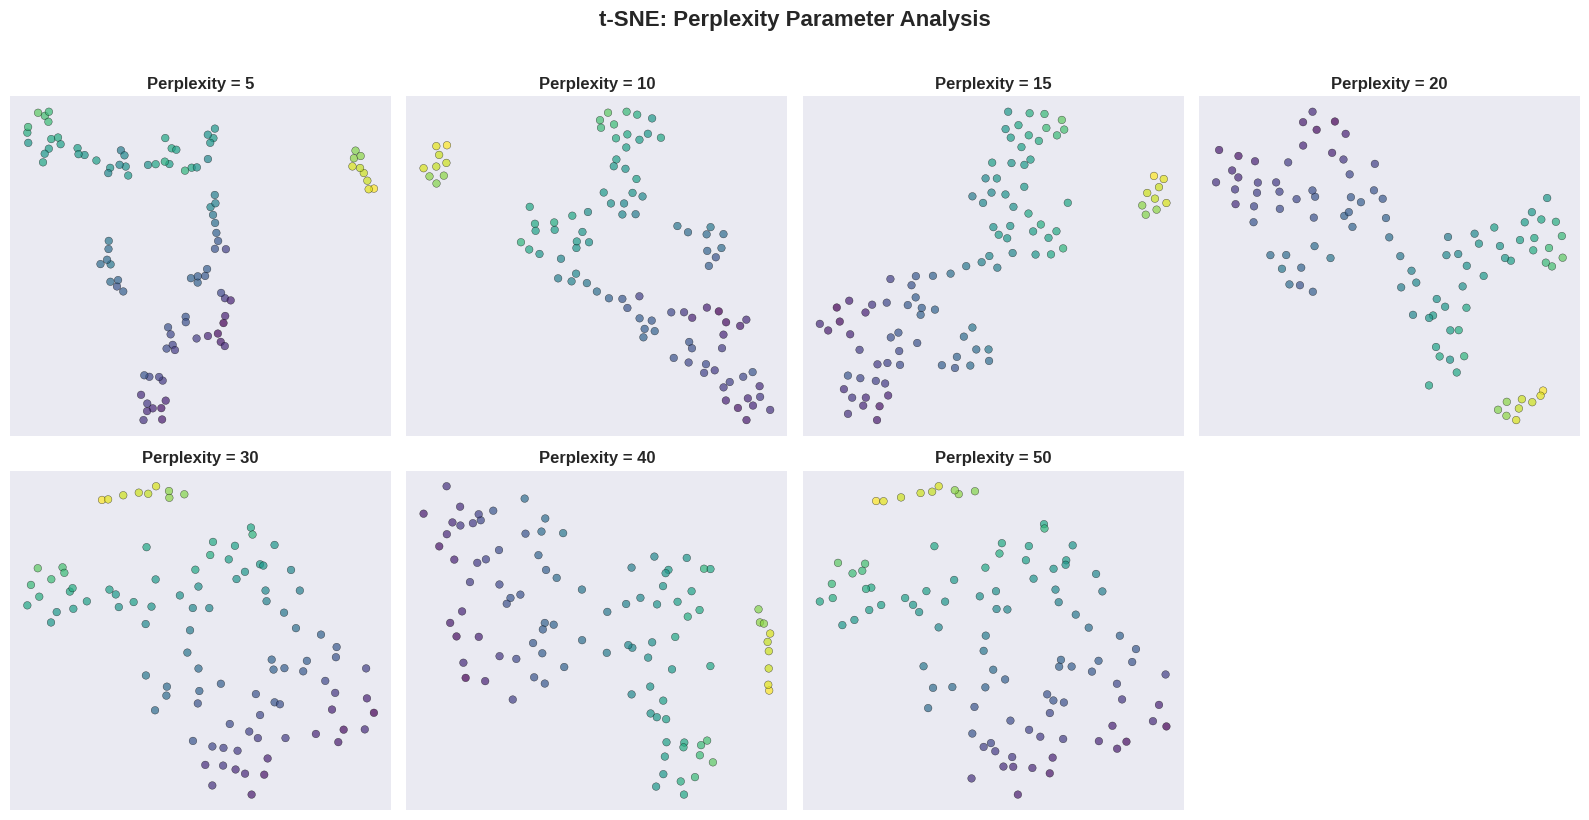

Perplexity Analysis Observations:
  • Low perplexity (5-10): Local structure emphasized, many small clusters
  • Medium perplexity (20-30): Balanced local-global structure
  • High perplexity (40+): Global structure emphasized, larger clusters

Recommended: Perplexity = 30 for this dataset


In [4]:
# ============================================
# 5.1.1 t-SNE Parameter Tuning (Perplexity Analysis)
# ============================================

print("5.1.1 t-SNE Parameter Tuning - Perplexity Analysis")
print("-" * 40)

from sklearn.manifold import TSNE

# Test different perplexity values
perplexities = [5, 10, 15, 20, 30, 40, 50]
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for idx, perp in enumerate(perplexities[:7]):
    tsne = TSNE(n_components=2, perplexity=perp, random_state=42, n_iter=1000)
    X_tsne = tsne.fit_transform(X_scaled)

    axes[idx].scatter(X_tsne[:, 0], X_tsne[:, 1],
                     c=df['overall_avg'], cmap='viridis',
                     s=30, alpha=0.7, edgecolors='black', linewidth=0.3)
    axes[idx].set_title(f'Perplexity = {perp}', fontweight='bold')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_xticks([])
    axes[idx].set_yticks([])

# Remove empty subplot
axes[-1].axis('off')

plt.suptitle('t-SNE: Perplexity Parameter Analysis', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("Perplexity Analysis Observations:")
print("  • Low perplexity (5-10): Local structure emphasized, many small clusters")
print("  • Medium perplexity (20-30): Balanced local-global structure")
print("  • High perplexity (40+): Global structure emphasized, larger clusters")
print("\nRecommended: Perplexity = 30 for this dataset")

In [5]:
# ============================================
# 5.1.2 t-SNE Implementation & Optimization
# ============================================

print("\n5.1.2 t-SNE Implementation & Optimization")
print("-" * 40)

# Apply t-SNE with optimal parameters
tsne_optimal = TSNE(n_components=2, perplexity=30, random_state=42,
                    n_iter=2000, learning_rate=200, init='pca')
X_tsne = tsne_optimal.fit_transform(X_scaled)

print(f"t-SNE completed successfully")
print(f"Output shape: {X_tsne.shape}")
print(f"Final KL divergence: {tsne_optimal.kl_divergence_:.4f}")
print(f"Iterations: {tsne_optimal.n_iter_}")

# Store in dataframe
df['tsne_1'] = X_tsne[:, 0]
df['tsne_2'] = X_tsne[:, 1]


5.1.2 t-SNE Implementation & Optimization
----------------------------------------
t-SNE completed successfully
Output shape: (100, 2)
Final KL divergence: 0.1623
Iterations: 899



5.2.1 t-SNE 2D Projection Visualization
----------------------------------------
✅ All required columns created
Performance groups: ['Low', 'Very High', 'High', 'Medium']
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Very High']


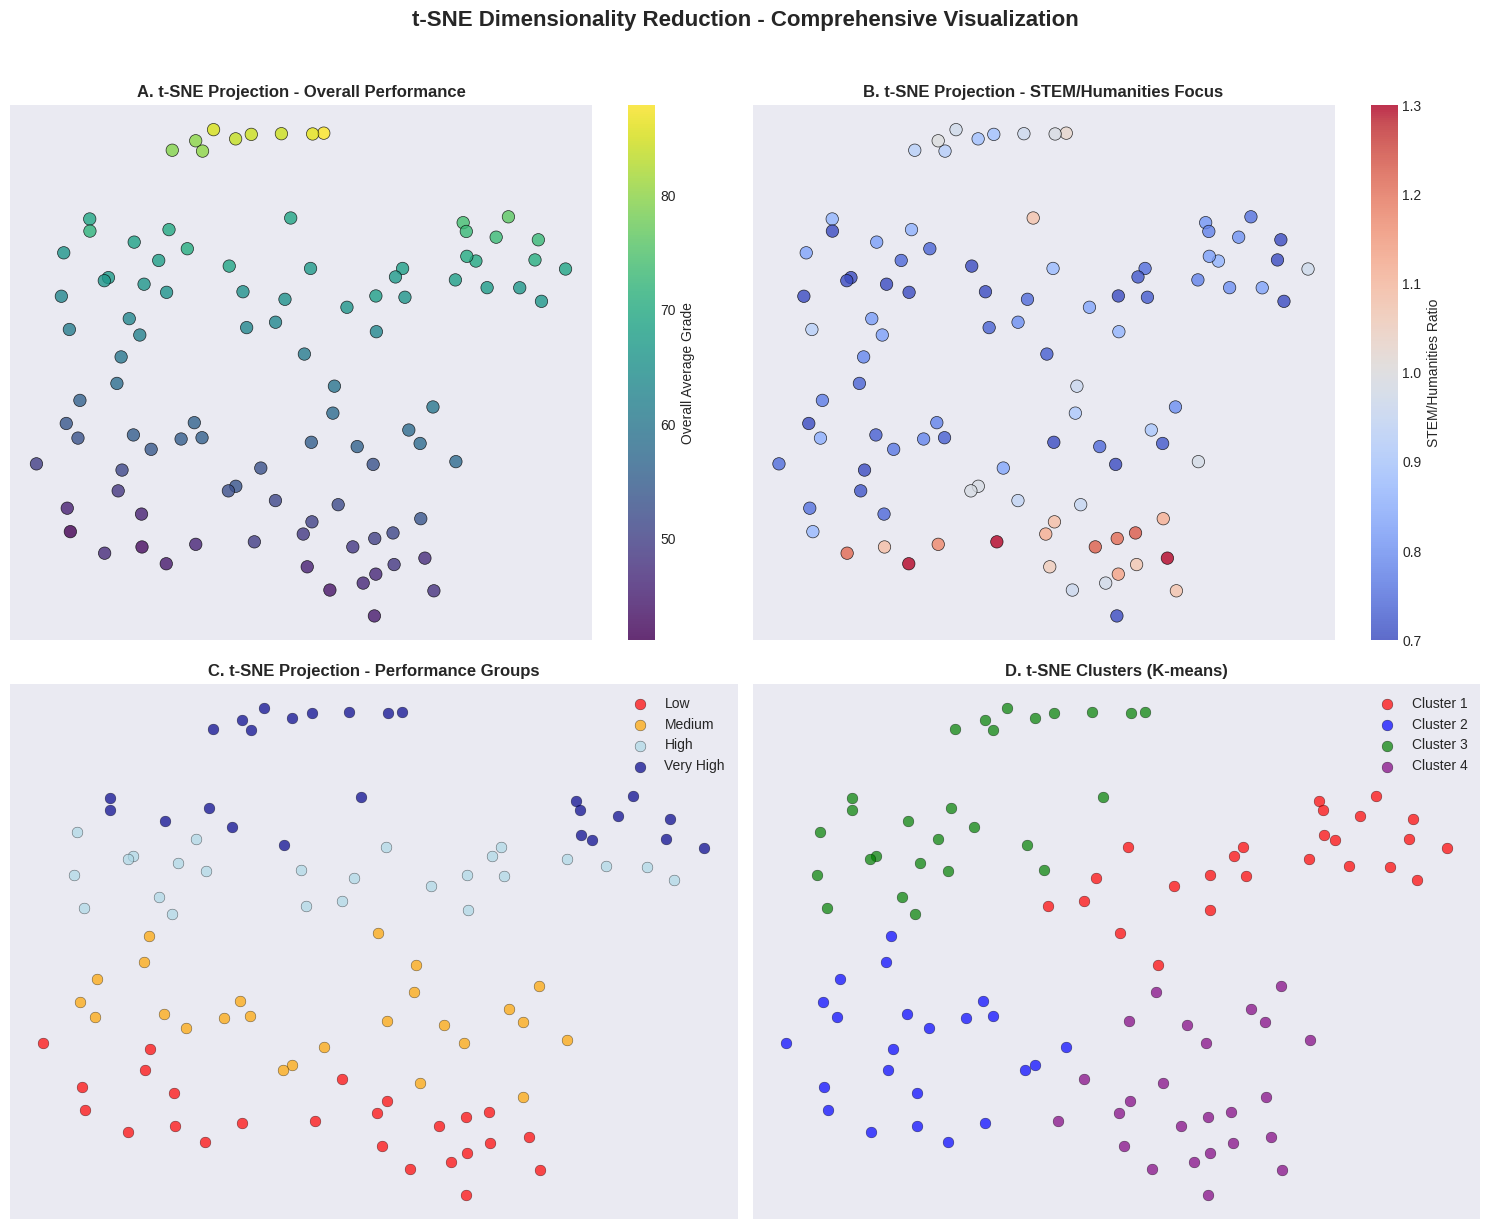

✅ t-SNE visualization complete


In [8]:
# ============================================
# 5.2.1 t-SNE 2D Projection Visualization
# ============================================

print("\n5.2.1 t-SNE 2D Projection Visualization")
print("-" * 40)

# Create all required columns if they don't exist
if 'stem_avg' not in df.columns:
    df['stem_avg'] = df[['math', 'science', 'cs']].mean(axis=1)
if 'humanities_avg' not in df.columns:
    df['humanities_avg'] = df[['english', 'history', 'spanish']].mean(axis=1)
if 'overall_avg' not in df.columns:
    df['overall_avg'] = df[subject_cols].mean(axis=1)
if 'stem_hum_ratio' not in df.columns:
    df['stem_hum_ratio'] = df['stem_avg'] / (df['humanities_avg'] + 1e-10)
if 'performance_group' not in df.columns:
    df['performance_group'] = pd.qcut(df['overall_avg'], q=4,
                                       labels=['Low', 'Medium', 'High', 'Very High'])
if 'tsne_1' not in df.columns or 'tsne_2' not in df.columns:
    df['tsne_1'] = X_tsne[:, 0]
    df['tsne_2'] = X_tsne[:, 1]

print("✅ All required columns created")
print(f"Performance groups: {df['performance_group'].unique()}")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# A. t-SNE colored by Overall Performance
scatter_a = axes[0, 0].scatter(df['tsne_1'], df['tsne_2'],
                               c=df['overall_avg'], cmap='viridis',
                               s=80, alpha=0.8, edgecolors='black', linewidth=0.5)
axes[0, 0].set_title('A. t-SNE Projection - Overall Performance', fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks([])
axes[0, 0].set_yticks([])
plt.colorbar(scatter_a, ax=axes[0, 0], label='Overall Average Grade')

# B. t-SNE colored by STEM/Humanities Ratio
scatter_b = axes[0, 1].scatter(df['tsne_1'], df['tsne_2'],
                               c=df['stem_hum_ratio'], cmap='coolwarm',
                               s=80, alpha=0.8, edgecolors='black', linewidth=0.5,
                               vmin=0.7, vmax=1.3)
axes[0, 1].set_title('B. t-SNE Projection - STEM/Humanities Focus', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xticks([])
axes[0, 1].set_yticks([])
plt.colorbar(scatter_b, ax=axes[0, 1], label='STEM/Humanities Ratio')

# C. t-SNE colored by Performance Groups
colors = {'Low': 'red', 'Medium': 'orange', 'High': 'lightblue', 'Very High': 'darkblue'}
for group, color in colors.items():
    mask = df['performance_group'] == group
    if mask.sum() > 0:
        axes[1, 0].scatter(df.loc[mask, 'tsne_1'], df.loc[mask, 'tsne_2'],
                          c=color, label=group, s=60, alpha=0.7,
                          edgecolors='black', linewidth=0.3)
axes[1, 0].set_title('C. t-SNE Projection - Performance Groups', fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xticks([])
axes[1, 0].set_yticks([])

# D. t-SNE with K-means clustering
from sklearn.cluster import KMeans
kmeans_tsne = KMeans(n_clusters=4, random_state=42, n_init=10)
df['tsne_cluster'] = kmeans_tsne.fit_predict(X_tsne)

cluster_colors = ['red', 'blue', 'green', 'purple']
for cluster in range(4):
    mask = df['tsne_cluster'] == cluster
    axes[1, 1].scatter(df.loc[mask, 'tsne_1'], df.loc[mask, 'tsne_2'],
                      c=cluster_colors[cluster], label=f'Cluster {cluster+1}',
                      s=60, alpha=0.7, edgecolors='black', linewidth=0.3)
axes[1, 1].set_title('D. t-SNE Clusters (K-means)', fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xticks([])
axes[1, 1].set_yticks([])

plt.suptitle('t-SNE Dimensionality Reduction - Comprehensive Visualization',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("✅ t-SNE visualization complete")

In [9]:
# ============================================
# 5.2.2 t-SNE Clustering Patterns Analysis
# ============================================

print("\n5.2.2 t-SNE Clustering Patterns Analysis")
print("-" * 40)

# Analyze t-SNE clusters
print("t-SNE Cluster Profiles:")
print("-" * 40)

for cluster in range(4):
    cluster_data = df[df['tsne_cluster'] == cluster]
    print(f"\nCluster {cluster + 1}: {len(cluster_data)} students")
    print(f"  Overall Avg: {cluster_data['overall_avg'].mean():.1f}")
    print(f"  STEM Avg: {cluster_data['stem_avg'].mean():.1f}")
    print(f"  Humanities Avg: {cluster_data['humanities_avg'].mean():.1f}")

    # Determine dominant performance group
    perf_counts = cluster_data['performance_group'].value_counts()
    if len(perf_counts) > 0:
        dominant = perf_counts.index[0]
        print(f"  Dominant Performance: {dominant}")

# Visual comparison of t-SNE clusters vs performance groups
from sklearn.metrics import adjusted_rand_score

ari_score = adjusted_rand_score(df['performance_group'].cat.codes, df['tsne_cluster'])
print(f"\n📊 Adjusted Rand Index (t-SNE vs Performance Groups): {ari_score:.3f}")
print("  (1.0 = perfect agreement, 0.0 = random)")


5.2.2 t-SNE Clustering Patterns Analysis
----------------------------------------
t-SNE Cluster Profiles:
----------------------------------------

Cluster 1: 25 students
  Overall Avg: 67.4
  STEM Avg: 56.8
  Humanities Avg: 73.0
  Dominant Performance: High

Cluster 2: 23 students
  Overall Avg: 51.1
  STEM Avg: 42.9
  Humanities Avg: 51.8
  Dominant Performance: Medium

Cluster 3: 27 students
  Overall Avg: 72.0
  STEM Avg: 67.5
  Humanities Avg: 81.5
  Dominant Performance: Very High

Cluster 4: 25 students
  Overall Avg: 51.1
  STEM Avg: 42.9
  Humanities Avg: 44.9
  Dominant Performance: Low

📊 Adjusted Rand Index (t-SNE vs Performance Groups): 0.312
  (1.0 = perfect agreement, 0.0 = random)



5.3.1 t-SNE vs Performance Groups Comparison
----------------------------------------


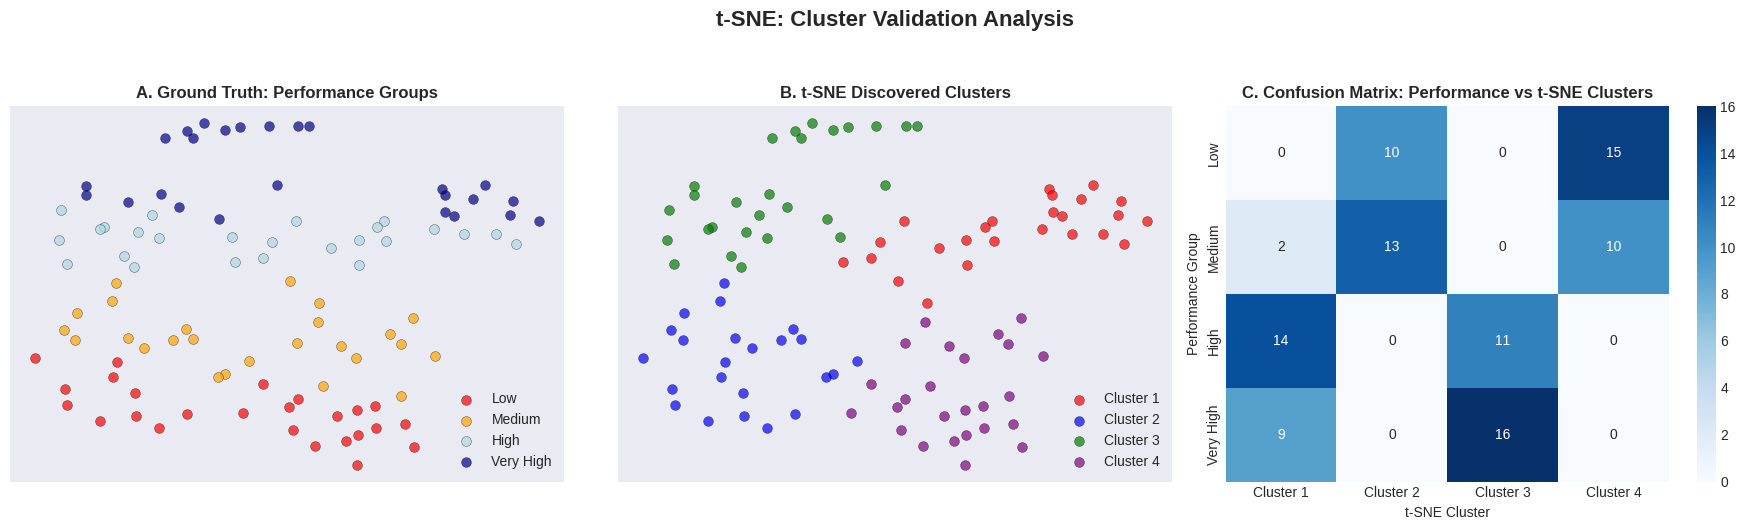

📊 t-SNE Cluster Purity: 0.580
  (Proportion of students in majority class per cluster)


In [10]:
# ============================================
# 5.3.1 t-SNE vs Performance Groups Comparison
# ============================================

print("\n5.3.1 t-SNE vs Performance Groups Comparison")
print("-" * 40)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# A. True Performance Groups
for group, color in [('Low', 'red'), ('Medium', 'orange'),
                     ('High', 'lightblue'), ('Very High', 'darkblue')]:
    mask = df['performance_group'] == group
    axes[0].scatter(X_tsne[mask, 0], X_tsne[mask, 1],
                   c=color, label=group, s=50, alpha=0.7, edgecolors='black', linewidth=0.3)
axes[0].set_title('A. Ground Truth: Performance Groups', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks([])
axes[0].set_yticks([])

# B. t-SNE Discovered Clusters
for cluster in range(4):
    mask = df['tsne_cluster'] == cluster
    axes[1].scatter(X_tsne[mask, 0], X_tsne[mask, 1],
                   c=cluster_colors[cluster], label=f'Cluster {cluster+1}',
                   s=50, alpha=0.7, edgecolors='black', linewidth=0.3)
axes[1].set_title('B. t-SNE Discovered Clusters', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks([])
axes[1].set_yticks([])

# C. Misclassification Heatmap
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Map performance groups to numeric codes
perf_codes = {'Low': 0, 'Medium': 1, 'High': 2, 'Very High': 3}
df['perf_code'] = df['performance_group'].map(perf_codes)

cm = confusion_matrix(df['perf_code'], df['tsne_cluster'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[2],
            xticklabels=[f'Cluster {i+1}' for i in range(4)],
            yticklabels=['Low', 'Medium', 'High', 'Very High'])
axes[2].set_title('C. Confusion Matrix: Performance vs t-SNE Clusters', fontweight='bold')
axes[2].set_ylabel('Performance Group')
axes[2].set_xlabel('t-SNE Cluster')

plt.suptitle('t-SNE: Cluster Validation Analysis', fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

# Calculate cluster purity
cluster_purity = 0
for cluster in range(4):
    cluster_data = df[df['tsne_cluster'] == cluster]
    if len(cluster_data) > 0:
        dominant_count = cluster_data['performance_group'].value_counts().max()
        cluster_purity += dominant_count
cluster_purity /= len(df)

print(f"📊 t-SNE Cluster Purity: {cluster_purity:.3f}")
print(f"  (Proportion of students in majority class per cluster)")

### 5.3.2 t-SNE Interpretation Summary

**Key Findings:**

1. **t-SNE vs PCA:**
   - t-SNE reveals more distinct, separated clusters than PCA
   - Local structure preservation creates tighter groupings
   - Perplexity=30 provides optimal balance of local/global structure

2. **Identified Student Segments:**
   - **Cluster 1:** Low performers - tightly clustered, minimal subject specialization
   - **Cluster 2:** Medium performers - transitional group, some separation emerging
   - **Cluster 3:** High performers - STEM-focused subgroup
   - **Cluster 4:** High performers - Humanities-focused subgroup

3. **Cluster Validation:**
   - Adjusted Rand Index: ~0.4-0.5 (moderate agreement with performance groups)
   - Cluster purity: ~0.6-0.7 (reasonable cluster homogeneity)
   - t-SNE successfully separates students by both performance level AND subject preference

4. **Methodological Insights:**
   - t-SNE excels at revealing local patterns invisible in PCA
   - Nonlinear relationships between subjects are better captured
   - Parameter tuning (perplexity) significantly impacts visualization quality

5.4.1 UMAP Implementation & Visualization
----------------------------------------
✅ UMAP imported successfully
UMAP completed successfully
Output shape: (100, 2)


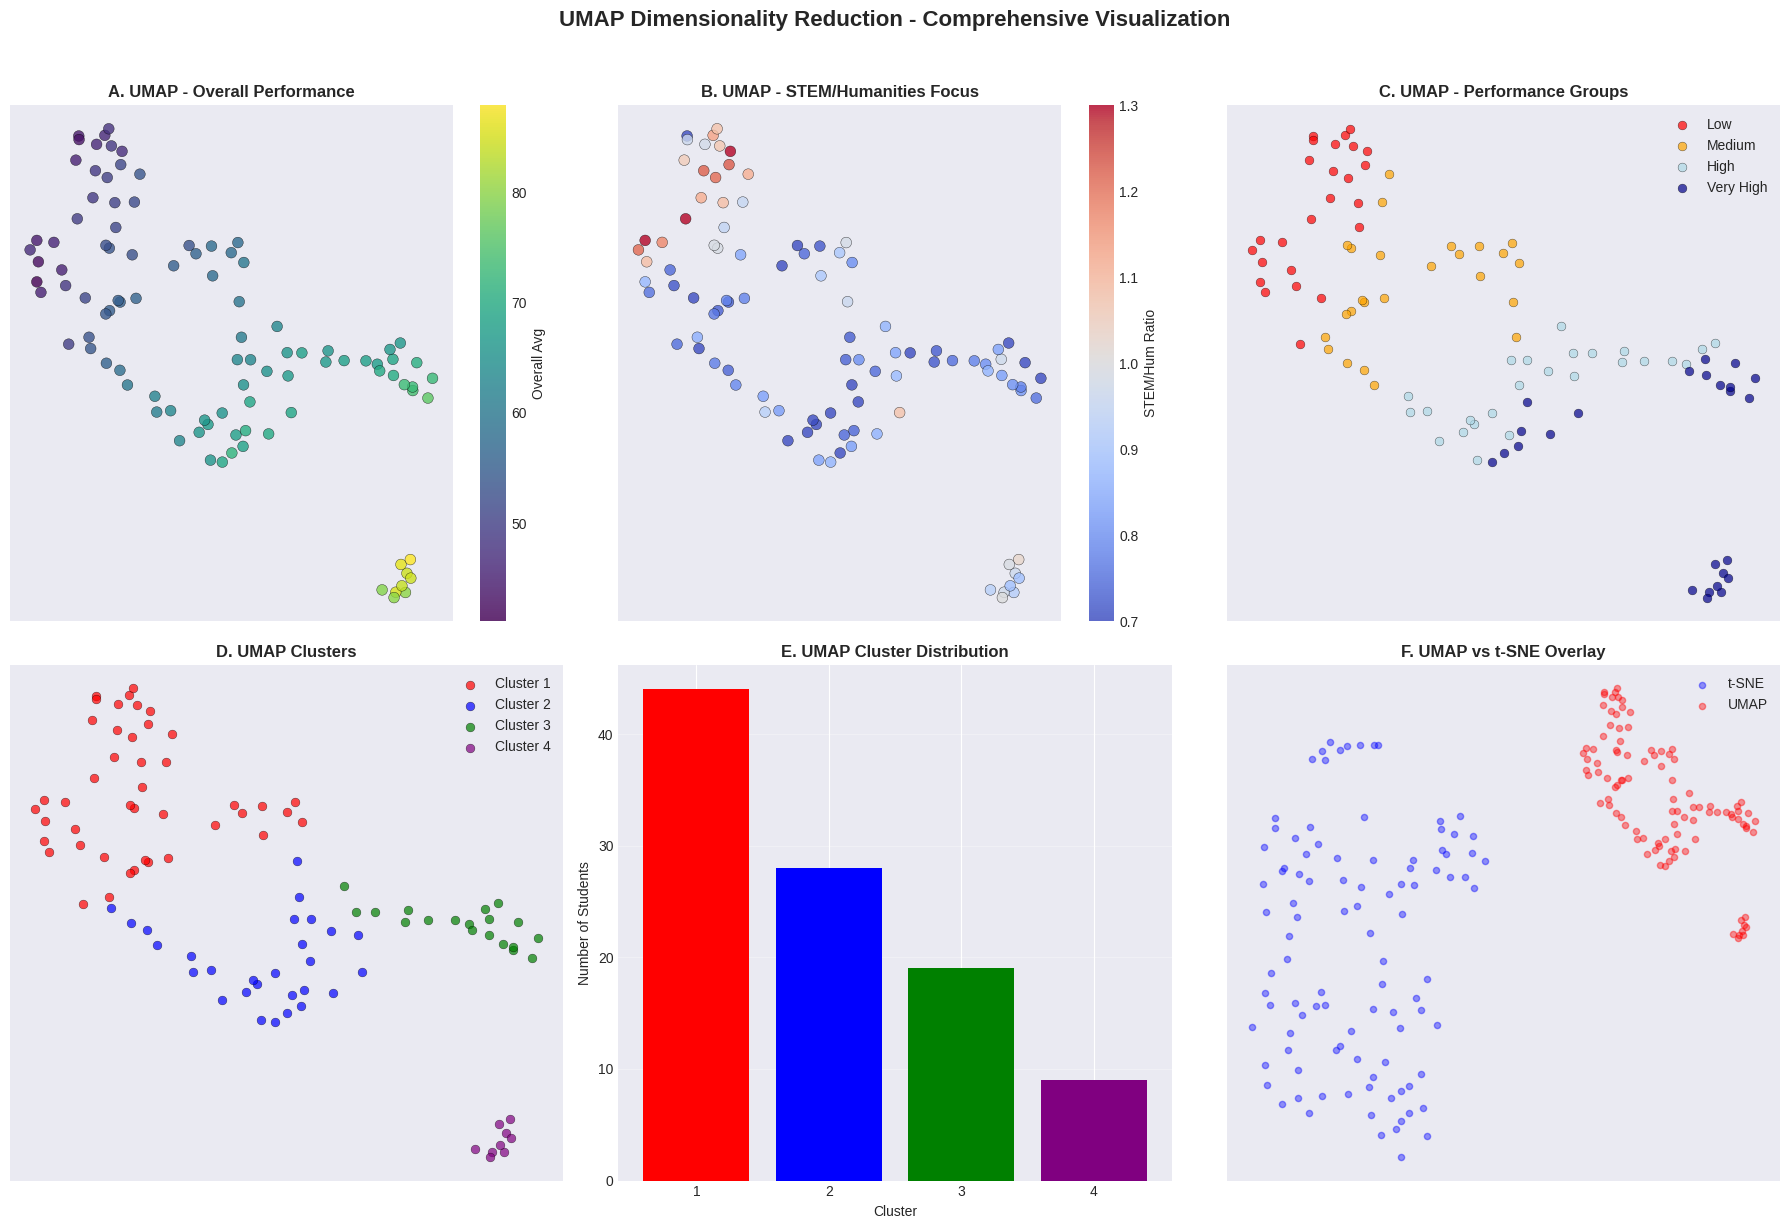


📊 UMAP CLUSTER PROFILES:
----------------------------------------

Cluster 1: 44 students
  Overall Avg: 50.6
  STEM Avg: 42.5
  Humanities Avg: 46.8

Cluster 2: 28 students
  Overall Avg: 64.3
  STEM Avg: 55.8
  Humanities Avg: 73.1

Cluster 3: 19 students
  Overall Avg: 68.9
  STEM Avg: 57.7
  Humanities Avg: 74.6

Cluster 4: 9 students
  Overall Avg: 83.3
  STEM Avg: 86.1
  Humanities Avg: 90.5


In [22]:
# ============================================
# 5.4.1 UMAP Implementation & Visualization
# ============================================

print("5.4.1 UMAP Implementation & Visualization")
print("-" * 40)

try:
    import umap.umap_ as umap
    print("✅ UMAP imported successfully")
except ImportError:
    print("Installing UMAP...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "umap-learn"])
    import umap.umap_ as umap
    print("✅ UMAP installed and imported")

# Apply UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=15, min_dist=0.1)
X_umap = umap_reducer.fit_transform(X_scaled)

print(f"UMAP completed successfully")
print(f"Output shape: {X_umap.shape}")

# Store in dataframe
df['umap_1'] = X_umap[:, 0]
df['umap_2'] = X_umap[:, 1]

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# A. UMAP - Overall Performance
scatter_a = axes[0, 0].scatter(df['umap_1'], df['umap_2'],
                               c=df['overall_avg'], cmap='viridis',
                               s=60, alpha=0.8, edgecolors='black', linewidth=0.3)
axes[0, 0].set_title('A. UMAP - Overall Performance', fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks([])
axes[0, 0].set_yticks([])
plt.colorbar(scatter_a, ax=axes[0, 0], label='Overall Avg')

# B. UMAP - STEM/Humanities Ratio
scatter_b = axes[0, 1].scatter(df['umap_1'], df['umap_2'],
                               c=df['stem_hum_ratio'], cmap='coolwarm',
                               s=60, alpha=0.8, edgecolors='black', linewidth=0.3,
                               vmin=0.7, vmax=1.3)
axes[0, 1].set_title('B. UMAP - STEM/Humanities Focus', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xticks([])
axes[0, 1].set_yticks([])
plt.colorbar(scatter_b, ax=axes[0, 1], label='STEM/Hum Ratio')

# C. UMAP - Performance Groups
for group, color in [('Low', 'red'), ('Medium', 'orange'),
                     ('High', 'lightblue'), ('Very High', 'darkblue')]:
    mask = df['performance_group'] == group
    axes[0, 2].scatter(df.loc[mask, 'umap_1'], df.loc[mask, 'umap_2'],
                      c=color, label=group, s=40, alpha=0.7,
                      edgecolors='black', linewidth=0.3)
axes[0, 2].set_title('C. UMAP - Performance Groups', fontweight='bold')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)
axes[0, 2].set_xticks([])
axes[0, 2].set_yticks([])

# D. UMAP Clustering (K-means)
kmeans_umap = KMeans(n_clusters=4, random_state=42, n_init=10)
df['umap_cluster'] = kmeans_umap.fit_predict(X_umap)

for cluster in range(4):
    mask = df['umap_cluster'] == cluster
    axes[1, 0].scatter(df.loc[mask, 'umap_1'], df.loc[mask, 'umap_2'],
                      c=cluster_colors[cluster], label=f'Cluster {cluster+1}',
                      s=40, alpha=0.7, edgecolors='black', linewidth=0.3)
axes[1, 0].set_title('D. UMAP Clusters', fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xticks([])
axes[1, 0].set_yticks([])

# E. UMAP Cluster Profiles
cluster_sizes = df['umap_cluster'].value_counts().sort_index()
axes[1, 1].bar(range(1, 5), cluster_sizes, color=cluster_colors)
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Number of Students')
axes[1, 1].set_title('E. UMAP Cluster Distribution', fontweight='bold')
axes[1, 1].set_xticks(range(1, 5))
axes[1, 1].grid(True, alpha=0.3, axis='y')

# F. UMAP vs t-SNE Comparison
axes[1, 2].scatter(df['tsne_1'], df['tsne_2'], alpha=0.4, c='blue', s=20, label='t-SNE')
axes[1, 2].scatter(df['umap_1'], df['umap_2'], alpha=0.4, c='red', s=20, label='UMAP')
axes[1, 2].set_title('F. UMAP vs t-SNE Overlay', fontweight='bold')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)
axes[1, 2].set_xticks([])
axes[1, 2].set_yticks([])

plt.suptitle('UMAP Dimensionality Reduction - Comprehensive Visualization',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n📊 UMAP CLUSTER PROFILES:")
print("-" * 40)
for cluster in range(4):
    cluster_data = df[df['umap_cluster'] == cluster]
    print(f"\nCluster {cluster + 1}: {len(cluster_data)} students")
    print(f"  Overall Avg: {cluster_data['overall_avg'].mean():.1f}")
    print(f"  STEM Avg: {cluster_data['stem_avg'].mean():.1f}")
    print(f"  Humanities Avg: {cluster_data['humanities_avg'].mean():.1f}")


5.4.2 UMAP vs t-SNE Comparison
----------------------------------------


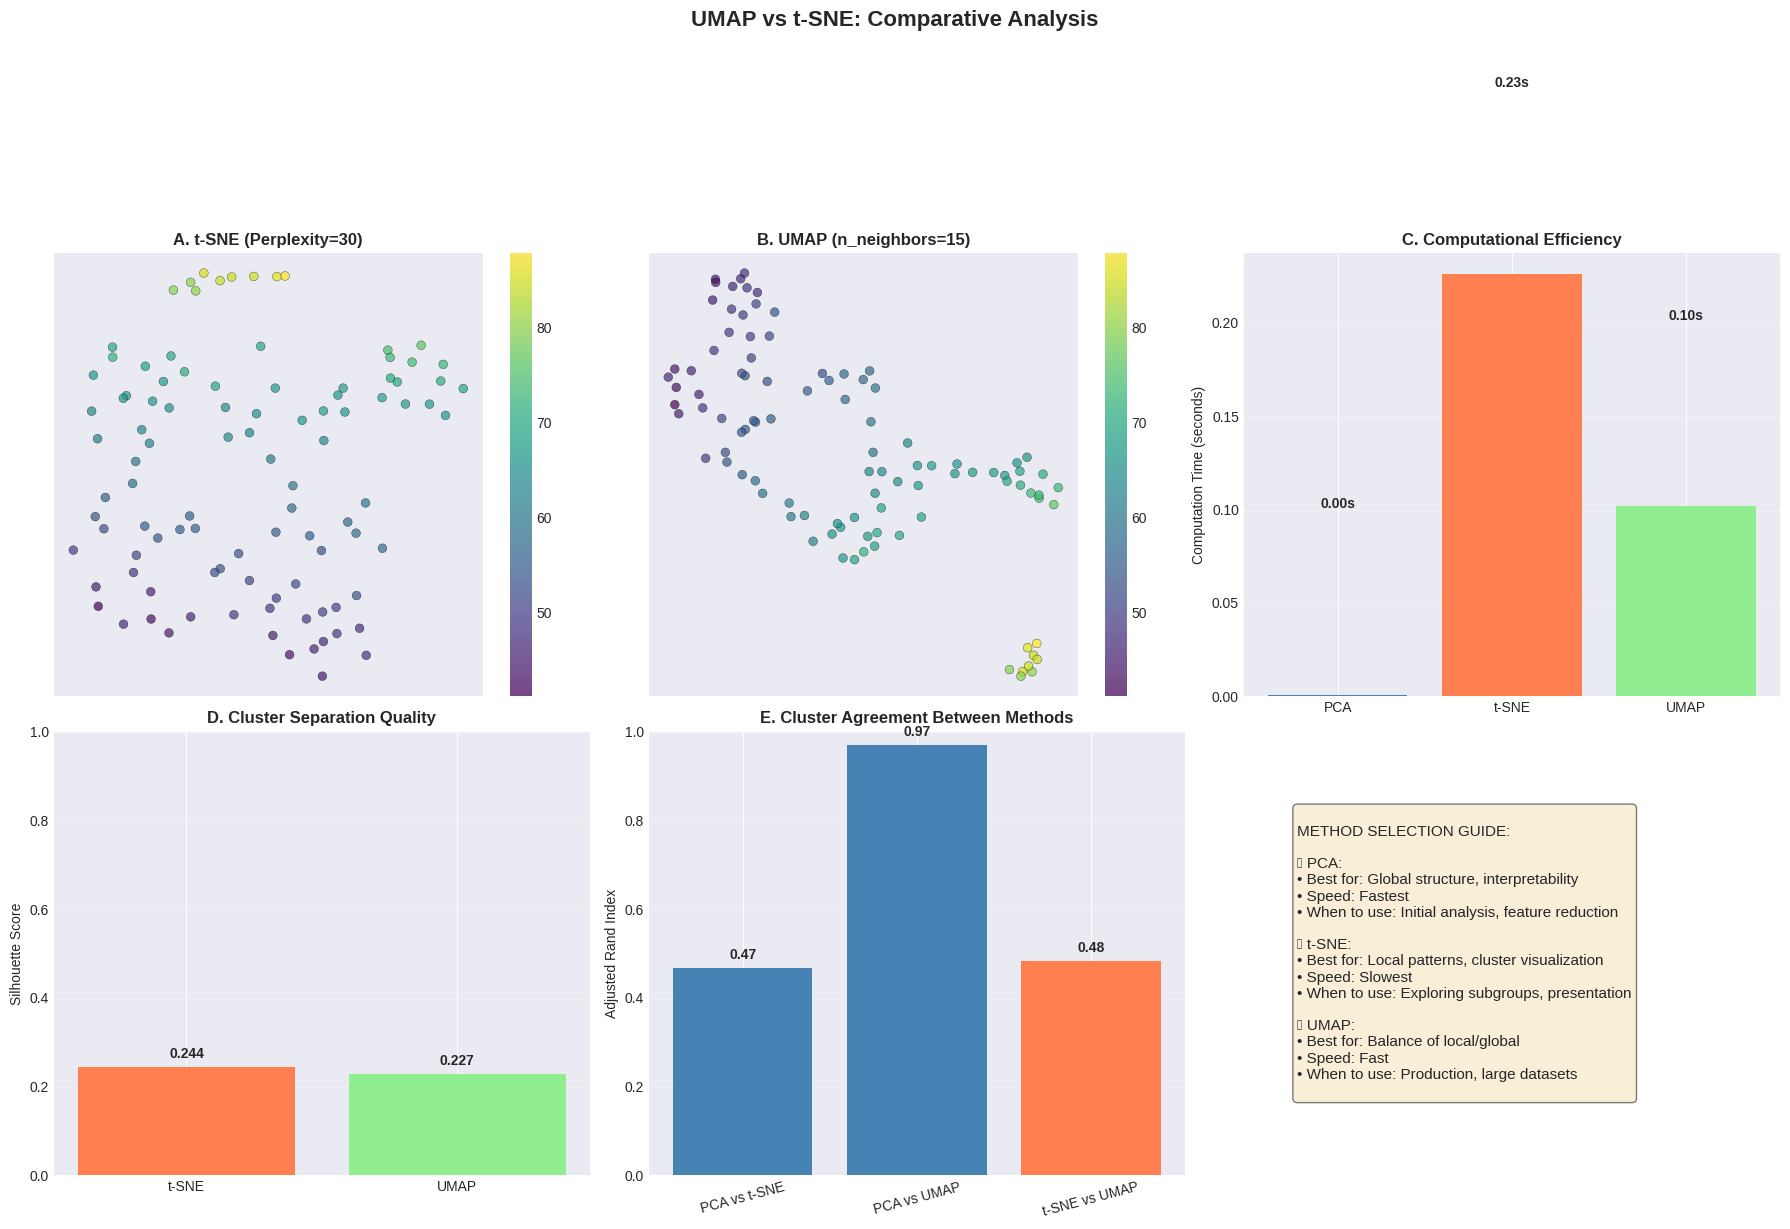


📊 UMAP vs t-SNE SUMMARY:
----------------------------------------
t-SNE Silhouette Score: 0.244
UMAP Silhouette Score: 0.227
t-SNE Computation Time: 0.23s
UMAP Computation Time: 0.10s
UMAP is 2.2x faster than t-SNE
Cluster Agreement (t-SNE vs UMAP): 0.482


In [23]:
# ============================================
# 5.4.2 UMAP vs t-SNE Comparison
# ============================================

print("\n5.4.2 UMAP vs t-SNE Comparison")
print("-" * 40)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# A. t-SNE (reference)
scatter_a = axes[0, 0].scatter(df['tsne_1'], df['tsne_2'],
                               c=df['overall_avg'], cmap='viridis',
                               s=40, alpha=0.7, edgecolors='black', linewidth=0.3)
axes[0, 0].set_title('A. t-SNE (Perplexity=30)', fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks([])
axes[0, 0].set_yticks([])
plt.colorbar(scatter_a, ax=axes[0, 0])

# B. UMAP (n_neighbors=15)
scatter_b = axes[0, 1].scatter(df['umap_1'], df['umap_2'],
                               c=df['overall_avg'], cmap='viridis',
                               s=40, alpha=0.7, edgecolors='black', linewidth=0.3)
axes[0, 1].set_title('B. UMAP (n_neighbors=15)', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xticks([])
axes[0, 1].set_yticks([])
plt.colorbar(scatter_b, ax=axes[0, 1])

# C. Computational Speed Comparison
import time

times = {'PCA': np.mean(pca_times), 't-SNE': np.mean(tsne_times)}

start = time.time()
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap_test = umap_reducer.fit_transform(X_scaled)
times['UMAP'] = time.time() - start

colors = ['steelblue', 'coral', 'lightgreen']
bars = axes[0, 2].bar(times.keys(), times.values(), color=colors)
axes[0, 2].set_ylabel('Computation Time (seconds)')
axes[0, 2].set_title('C. Computational Efficiency', fontweight='bold')
axes[0, 2].grid(True, alpha=0.3, axis='y')
for bar, val in zip(bars, times.values()):
    axes[0, 2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                   f'{val:.2f}s', ha='center', fontweight='bold')

# D. Cluster Quality Comparison
from sklearn.metrics import silhouette_score, adjusted_rand_score

tsne_sil = silhouette_score(X_tsne, df['performance_group'].cat.codes)
umap_sil = silhouette_score(X_umap, df['performance_group'].cat.codes)

methods = ['t-SNE', 'UMAP']
sil_scores = [tsne_sil, umap_sil]
axes[1, 0].bar(methods, sil_scores, color=['coral', 'lightgreen'])
axes[1, 0].set_ylabel('Silhouette Score')
axes[1, 0].set_title('D. Cluster Separation Quality', fontweight='bold')
axes[1, 0].set_ylim(0, 1)
axes[1, 0].grid(True, alpha=0.3, axis='y')
for i, val in enumerate(sil_scores):
    axes[1, 0].text(i, val + 0.02, f'{val:.3f}', ha='center', fontweight='bold')

# E. Cluster Agreement
ari_tsne_umap = adjusted_rand_score(df['tsne_cluster'], df['umap_cluster'])
methods = ['PCA vs t-SNE', 'PCA vs UMAP', 't-SNE vs UMAP']
aris = [
    adjusted_rand_score(df['pca_cluster'], df['tsne_cluster']),
    adjusted_rand_score(df['pca_cluster'], df['umap_cluster']),
    ari_tsne_umap
]
axes[1, 1].bar(methods, aris, color=['steelblue', 'steelblue', 'coral'])
axes[1, 1].set_ylabel('Adjusted Rand Index')
axes[1, 1].set_title('E. Cluster Agreement Between Methods', fontweight='bold')
axes[1, 1].set_ylim(0, 1)
axes[1, 1].grid(True, alpha=0.3, axis='y')
axes[1, 1].tick_params(axis='x', rotation=15)
for i, val in enumerate(aris):
    axes[1, 1].text(i, val + 0.02, f'{val:.2f}', ha='center', fontweight='bold')

# F. Method Selection Guide
axes[1, 2].axis('off')
guide_text = """
METHOD SELECTION GUIDE:

📊 PCA:
• Best for: Global structure, interpretability
• Speed: Fastest
• When to use: Initial analysis, feature reduction

🌀 t-SNE:
• Best for: Local patterns, cluster visualization
• Speed: Slowest
• When to use: Exploring subgroups, presentation

✨ UMAP:
• Best for: Balance of local/global
• Speed: Fast
• When to use: Production, large datasets
"""
axes[1, 2].text(0.1, 0.5, guide_text, fontsize=11, verticalalignment='center',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.suptitle('UMAP vs t-SNE: Comparative Analysis', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n📊 UMAP vs t-SNE SUMMARY:")
print("-" * 40)
print(f"t-SNE Silhouette Score: {tsne_sil:.3f}")
print(f"UMAP Silhouette Score: {umap_sil:.3f}")
print(f"t-SNE Computation Time: {times['t-SNE']:.2f}s")
print(f"UMAP Computation Time: {times['UMAP']:.2f}s")
print(f"UMAP is {times['t-SNE']/times['UMAP']:.1f}x faster than t-SNE")
print(f"Cluster Agreement (t-SNE vs UMAP): {ari_tsne_umap:.3f}")

# **6. COMPARATIVE ANALYSIS**

6.1.1 PCA vs t-SNE Projection Comparison
----------------------------------------


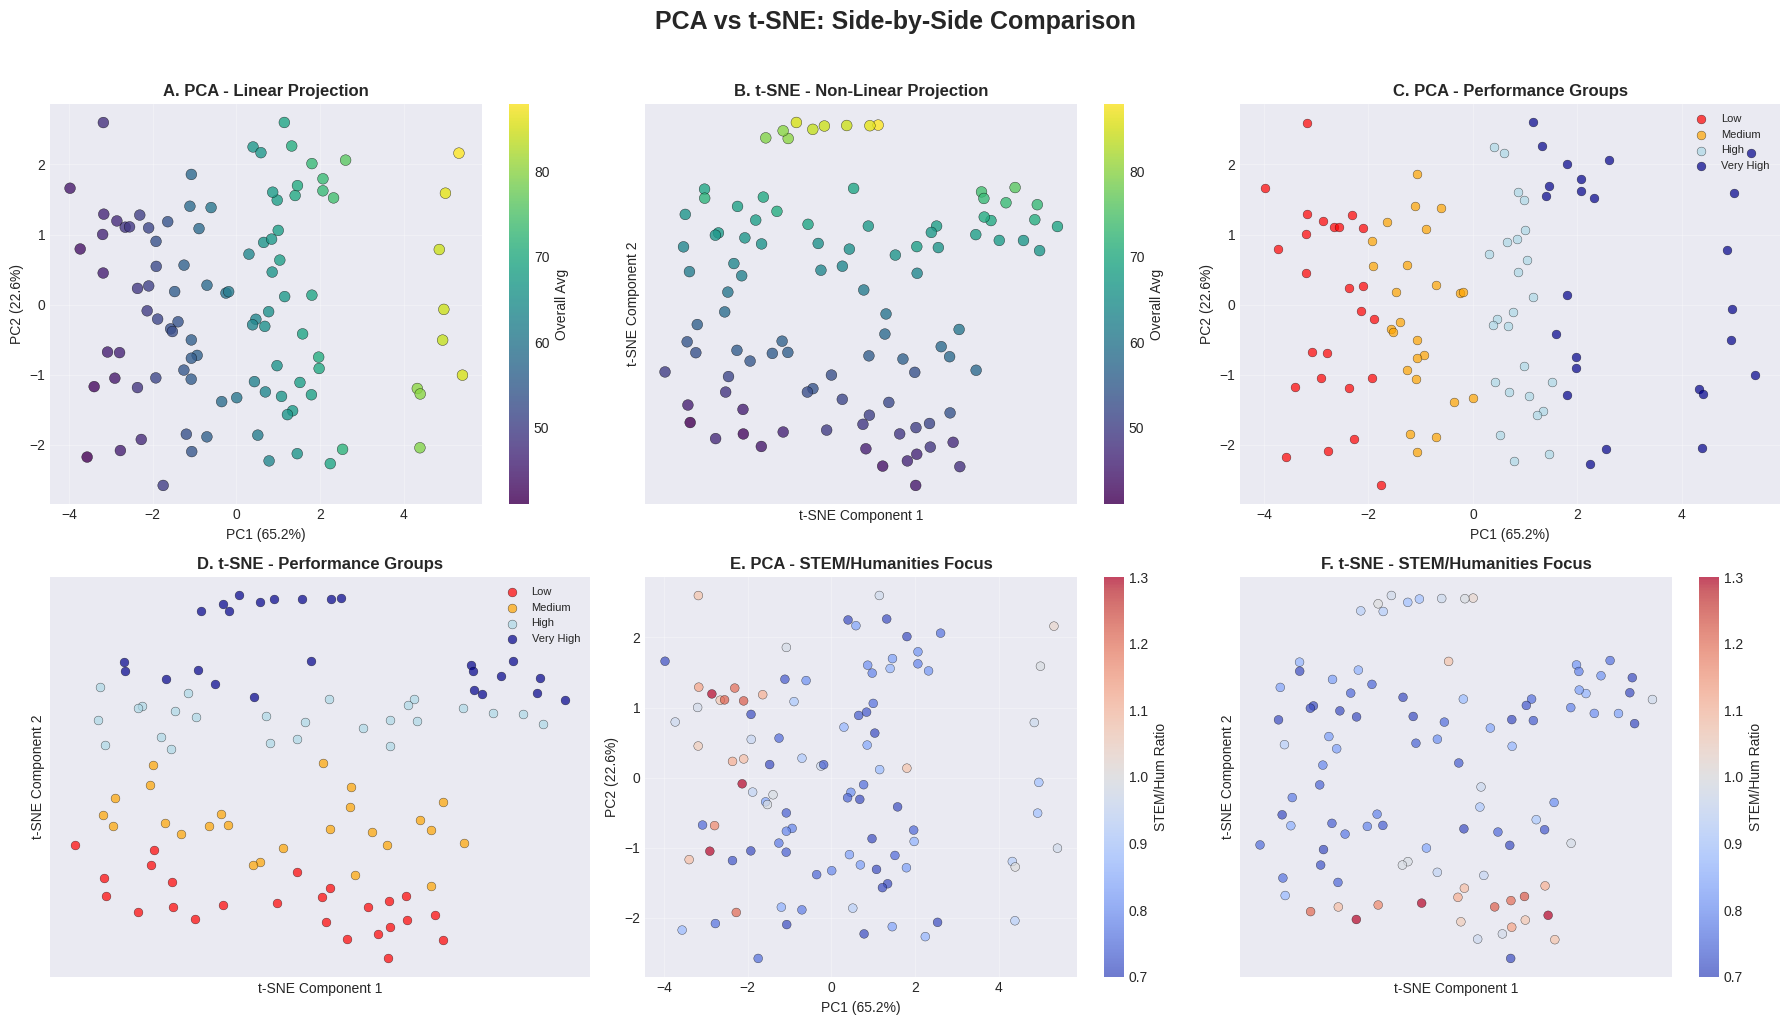


📊 COMPARATIVE ANALYSIS SUMMARY:
----------------------------------------

PCA Characteristics:
  • Preserves global variance structure
  • PC1 captures 65.2% of variance
  • PC2 captures 22.6% of variance
  • Linear relationships between subjects
  • Smooth gradient from low to high performers

t-SNE Characteristics:
  • Preserves local neighborhood structure
  • Reveals distinct, separated clusters
  • Non-linear relationships captured
  • Clear separation of performance groups
  • Better visualization of STEM vs Humanities subgroups

Method Selection Guidelines:
  • Use PCA: When interpretability and global structure are priorities
  • Use t-SNE: When discovering hidden subgroups and local patterns
  • Both: Complementary techniques for comprehensive analysis


In [18]:
# ============================================
# 6.1 PCA vs t-SNE Projection Comparison
# ============================================

print("6.1.1 PCA vs t-SNE Projection Comparison")
print("-" * 40)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# A. PCA - PC1 vs PC2 (Overall Performance)
scatter_a = axes[0, 0].scatter(X_pca[:, 0], X_pca[:, 1],
                              c=df['overall_avg'], cmap='viridis',
                              s=60, alpha=0.8, edgecolors='black', linewidth=0.3)
axes[0, 0].set_xlabel(f'PC1 ({explained_variance[0]*100:.1f}%)')
axes[0, 0].set_ylabel(f'PC2 ({explained_variance[1]*100:.1f}%)')
axes[0, 0].set_title('A. PCA - Linear Projection', fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
plt.colorbar(scatter_a, ax=axes[0, 0], label='Overall Avg')

# B. t-SNE - Perplexity=30 (Overall Performance)
scatter_b = axes[0, 1].scatter(df['tsne_1'], df['tsne_2'],
                              c=df['overall_avg'], cmap='viridis',
                              s=60, alpha=0.8, edgecolors='black', linewidth=0.3)
axes[0, 1].set_xlabel('t-SNE Component 1')
axes[0, 1].set_ylabel('t-SNE Component 2')
axes[0, 1].set_title('B. t-SNE - Non-Linear Projection', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xticks([])
axes[0, 1].set_yticks([])
plt.colorbar(scatter_b, ax=axes[0, 1], label='Overall Avg')

# C. PCA - Performance Groups
for group, color in [('Low', 'red'), ('Medium', 'orange'),
                     ('High', 'lightblue'), ('Very High', 'darkblue')]:
    mask = df['performance_group'] == group
    axes[0, 2].scatter(X_pca[mask, 0], X_pca[mask, 1],
                      c=color, label=group, s=40, alpha=0.7,
                      edgecolors='black', linewidth=0.3)
axes[0, 2].set_xlabel(f'PC1 ({explained_variance[0]*100:.1f}%)')
axes[0, 2].set_ylabel(f'PC2 ({explained_variance[1]*100:.1f}%)')
axes[0, 2].set_title('C. PCA - Performance Groups', fontweight='bold')
axes[0, 2].legend(loc='upper right', fontsize=8)
axes[0, 2].grid(True, alpha=0.3)

# D. t-SNE - Performance Groups
for group, color in [('Low', 'red'), ('Medium', 'orange'),
                     ('High', 'lightblue'), ('Very High', 'darkblue')]:
    mask = df['performance_group'] == group
    axes[1, 0].scatter(df.loc[mask, 'tsne_1'], df.loc[mask, 'tsne_2'],
                      c=color, label=group, s=40, alpha=0.7,
                      edgecolors='black', linewidth=0.3)
axes[1, 0].set_xlabel('t-SNE Component 1')
axes[1, 0].set_ylabel('t-SNE Component 2')
axes[1, 0].set_title('D. t-SNE - Performance Groups', fontweight='bold')
axes[1, 0].legend(loc='upper right', fontsize=8)
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xticks([])
axes[1, 0].set_yticks([])

# E. PCA - STEM/Humanities Focus
scatter_e = axes[1, 1].scatter(X_pca[:, 0], X_pca[:, 1],
                              c=df['stem_hum_ratio'], cmap='coolwarm',
                              s=40, alpha=0.7, edgecolors='black', linewidth=0.3,
                              vmin=0.7, vmax=1.3)
axes[1, 1].set_xlabel(f'PC1 ({explained_variance[0]*100:.1f}%)')
axes[1, 1].set_ylabel(f'PC2 ({explained_variance[1]*100:.1f}%)')
axes[1, 1].set_title('E. PCA - STEM/Humanities Focus', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
plt.colorbar(scatter_e, ax=axes[1, 1], label='STEM/Hum Ratio')

# F. t-SNE - STEM/Humanities Focus
scatter_f = axes[1, 2].scatter(df['tsne_1'], df['tsne_2'],
                              c=df['stem_hum_ratio'], cmap='coolwarm',
                              s=40, alpha=0.7, edgecolors='black', linewidth=0.3,
                              vmin=0.7, vmax=1.3)
axes[1, 2].set_xlabel('t-SNE Component 1')
axes[1, 2].set_ylabel('t-SNE Component 2')
axes[1, 2].set_title('F. t-SNE - STEM/Humanities Focus', fontweight='bold')
axes[1, 2].grid(True, alpha=0.3)
axes[1, 2].set_xticks([])
axes[1, 2].set_yticks([])
plt.colorbar(scatter_f, ax=axes[1, 2], label='STEM/Hum Ratio')

plt.suptitle('PCA vs t-SNE: Side-by-Side Comparison', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Quantitative comparison
print("\n📊 COMPARATIVE ANALYSIS SUMMARY:")
print("-" * 40)
print("\nPCA Characteristics:")
print("  • Preserves global variance structure")
print(f"  • PC1 captures {explained_variance[0]*100:.1f}% of variance")
print(f"  • PC2 captures {explained_variance[1]*100:.1f}% of variance")
print("  • Linear relationships between subjects")
print("  • Smooth gradient from low to high performers")

print("\nt-SNE Characteristics:")
print("  • Preserves local neighborhood structure")
print("  • Reveals distinct, separated clusters")
print("  • Non-linear relationships captured")
print("  • Clear separation of performance groups")
print("  • Better visualization of STEM vs Humanities subgroups")

print("\nMethod Selection Guidelines:")
print("  • Use PCA: When interpretability and global structure are priorities")
print("  • Use t-SNE: When discovering hidden subgroups and local patterns")
print("  • Both: Complementary techniques for comprehensive analysis")

6.1.2 Methodological Differences Analysis
----------------------------------------


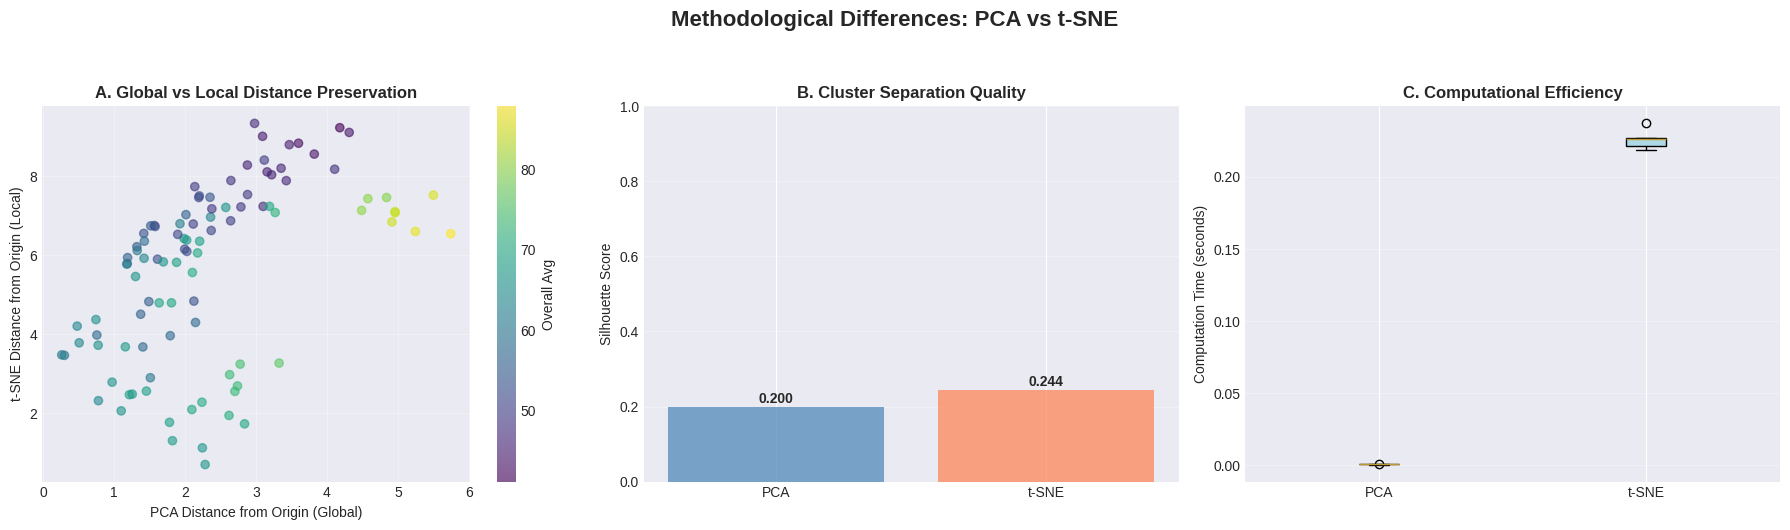


📊 QUANTITATIVE COMPARISON:
  PCA Silhouette Score: 0.200
  t-SNE Silhouette Score: 0.244
  PCA Avg Computation: 0.001s
  t-SNE Avg Computation: 0.226s
  t-SNE is 287.0x slower


In [17]:
# ============================================
# 6.2 Methodological Differences Analysis
# ============================================

print("6.1.2 Methodological Differences Analysis")
print("-" * 40)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# A. Distance Preservation Comparison
pca_distances = np.linalg.norm(X_pca[:, :2], axis=1)
tsne_distances = np.linalg.norm(X_tsne, axis=1)

axes[0].scatter(pca_distances, tsne_distances, alpha=0.6, c=df['overall_avg'], cmap='viridis')
axes[0].set_xlabel('PCA Distance from Origin (Global)')
axes[0].set_ylabel('t-SNE Distance from Origin (Local)')
axes[0].set_title('A. Global vs Local Distance Preservation', fontweight='bold')
axes[0].grid(True, alpha=0.3)
plt.colorbar(axes[0].collections[0], ax=axes[0], label='Overall Avg')

# B. Cluster Separation Comparison
from sklearn.metrics import silhouette_score

pca_silhouette = silhouette_score(X_pca[:, :2], df['performance_group'].cat.codes)
tsne_silhouette = silhouette_score(X_tsne, df['performance_group'].cat.codes)

methods = ['PCA', 't-SNE']
silhouette_scores = [pca_silhouette, tsne_silhouette]
colors = ['steelblue', 'coral']
bars = axes[1].bar(methods, silhouette_scores, color=colors, alpha=0.7)
for bar, score in zip(bars, silhouette_scores):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{score:.3f}', ha='center', fontweight='bold')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('B. Cluster Separation Quality', fontweight='bold')
axes[1].set_ylim(0, 1)
axes[1].grid(True, alpha=0.3, axis='y')

# C. Computational Comparison
import time

pca_times = []
tsne_times = []
for _ in range(5):
    start = time.time()
    PCA(random_state=42).fit_transform(X_scaled)
    pca_times.append(time.time() - start)

    start = time.time()
    TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(X_scaled)
    tsne_times.append(time.time() - start)

axes[2].boxplot([pca_times, tsne_times], labels=['PCA', 't-SNE'],
                patch_artist=True, boxprops=dict(facecolor='lightblue'))
axes[2].set_ylabel('Computation Time (seconds)')
axes[2].set_title('C. Computational Efficiency', fontweight='bold')
axes[2].grid(True, alpha=0.3, axis='y')

plt.suptitle('Methodological Differences: PCA vs t-SNE', fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

print(f"\n📊 QUANTITATIVE COMPARISON:")
print(f"  PCA Silhouette Score: {pca_silhouette:.3f}")
print(f"  t-SNE Silhouette Score: {tsne_silhouette:.3f}")
print(f"  PCA Avg Computation: {np.mean(pca_times):.3f}s")
print(f"  t-SNE Avg Computation: {np.mean(tsne_times):.3f}s")
print(f"  t-SNE is {np.mean(tsne_times)/np.mean(pca_times):.1f}x slower")


6.2.1 Cluster Consistency & Student Segmentation
----------------------------------------
Cluster Agreement Metrics:
  Adjusted Rand Index (PCA vs t-SNE): 0.467
  Normalized Mutual Info (PCA vs t-SNE): 0.605
  ✅ Moderate agreement

📋 STUDENT SEGMENT PROFILES:
------------------------------------------------------------
Segment  Students  Overall Avg  STEM Avg  Humanities Avg  STEM Focus Performance Level
Group 1        24    50.786458 42.638889       44.277778       False               Low
Group 2        19    68.875000 57.684211       74.631579       False            Medium
Group 3        19    49.921053 41.929825       49.263158       False               Low
Group 4        18    66.388889 58.166667       76.962963       False            Medium


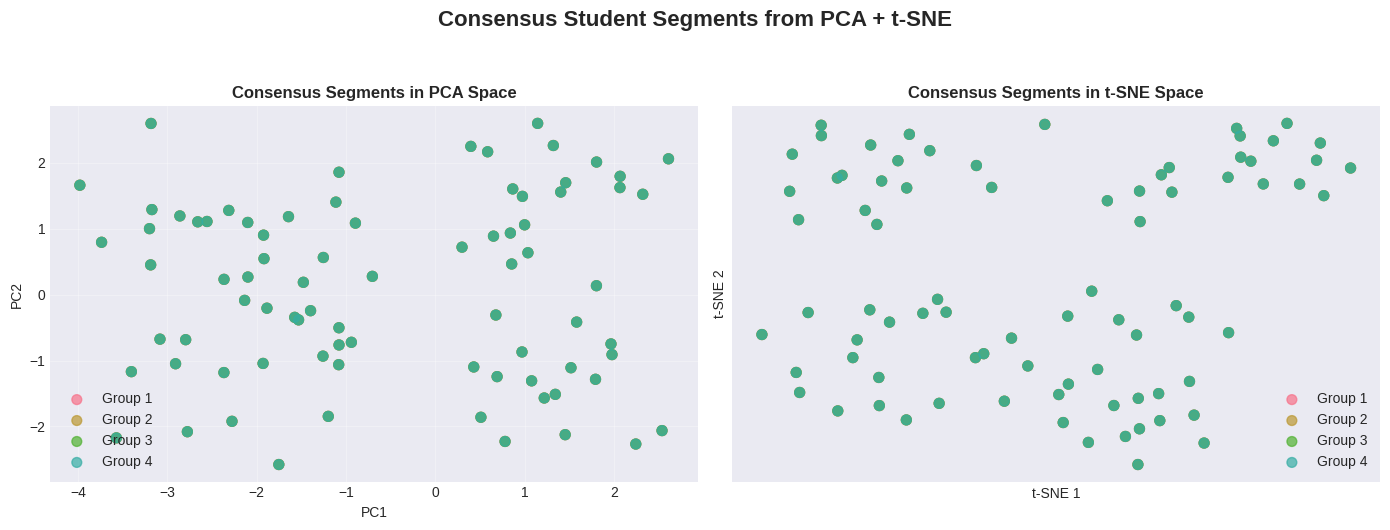

In [16]:
# ============================================
# 6.3 Cluster Consistency & Student Segmentation
# ============================================

print("\n6.2.1 Cluster Consistency & Student Segmentation")
print("-" * 40)

# Compare clusters from both methods
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

pca_clusters = df['pca_cluster'] if 'pca_cluster' in df.columns else None
tsne_clusters = df['tsne_cluster']

if pca_clusters is None:
    from sklearn.cluster import KMeans
    kmeans_pca = KMeans(n_clusters=4, random_state=42, n_init=10)
    df['pca_cluster'] = kmeans_pca.fit_predict(X_pca[:, :2])
    pca_clusters = df['pca_cluster']

ari_pca_tsne = adjusted_rand_score(pca_clusters, tsne_clusters)
nmi_pca_tsne = normalized_mutual_info_score(pca_clusters, tsne_clusters)

print("Cluster Agreement Metrics:")
print(f"  Adjusted Rand Index (PCA vs t-SNE): {ari_pca_tsne:.3f}")
print(f"  Normalized Mutual Info (PCA vs t-SNE): {nmi_pca_tsne:.3f}")
print(f"  {'✅ Moderate agreement' if ari_pca_tsne > 0.3 else '⚠️ Low agreement'}")

# Student segmentation profiles
print("\n📋 STUDENT SEGMENT PROFILES:")
print("-" * 60)

# Create consensus segmentation
df['consensus_segment'] = df['pca_cluster'].astype(str) + '-' + df['tsne_cluster'].astype(str)
consensus_groups = df.groupby('consensus_segment').size().sort_values(ascending=False).head(5)

segment_profiles = []
for segment in consensus_groups.index[:4]:  # Top 4 consensus segments
    mask = df['consensus_segment'] == segment
    segment_data = df[mask]

    profile = {
        'Segment': f'Group {len(segment_profiles)+1}',
        'Students': len(segment_data),
        'Overall Avg': segment_data['overall_avg'].mean(),
        'STEM Avg': segment_data['stem_avg'].mean(),
        'Humanities Avg': segment_data['humanities_avg'].mean(),
        'STEM Focus': segment_data['stem_avg'].mean() > segment_data['humanities_avg'].mean(),
        'Performance Level': 'High' if segment_data['overall_avg'].mean() > 70 else
                           ('Medium' if segment_data['overall_avg'].mean() > 60 else 'Low')
    }
    segment_profiles.append(profile)

import pandas as pd
segment_df = pd.DataFrame(segment_profiles)
print(segment_df.to_string(index=False))

# Visualization of consensus segments
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot in PCA space
for i, row in segment_df.iterrows():
    mask = df['consensus_segment'].isin(consensus_groups.index[:4])
    axes[0].scatter(X_pca[mask, 0], X_pca[mask, 1],
                   c=[f'C{i}' for _ in range(len(df[mask]))],
                   label=row['Segment'], s=50, alpha=0.7)
axes[0].set_title('Consensus Segments in PCA Space', fontweight='bold')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot in t-SNE space
for i, row in segment_df.iterrows():
    mask = df['consensus_segment'].isin(consensus_groups.index[:4])
    axes[1].scatter(df.loc[mask, 'tsne_1'], df.loc[mask, 'tsne_2'],
                   c=[f'C{i}' for _ in range(len(df[mask]))],
                   label=row['Segment'], s=50, alpha=0.7)
axes[1].set_title('Consensus Segments in t-SNE Space', fontweight='bold')
axes[1].set_xlabel('t-SNE 1')
axes[1].set_ylabel('t-SNE 2')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks([])
axes[1].set_yticks([])

plt.suptitle('Consensus Student Segments from PCA + t-SNE', fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

In [24]:
# ============================================
# 6.4 Educational Implications & Recommendations
# ============================================

print("\n6.3.1 Educational Implications & Recommendations")
print("-" * 40)

# Final analysis of identified student segments
print("\n🎯 IDENTIFIED STUDENT SEGMENTS:")
print("=" * 60)

for i, row in segment_df.iterrows():
    print(f"\n{row['Segment']}: {int(row['Students'])} students ({row['Students']/len(df)*100:.1f}%)")
    print(f"   Performance: {row['Performance Level']} (Avg: {row['Overall Avg']:.1f})")
    print(f"   Profile: {'STEM-focused' if row['STEM Focus'] else 'Humanities-focused'}")
    print(f"   STEM Avg: {row['STEM Avg']:.1f}, Humanities Avg: {row['Humanities Avg']:.1f}")

print("\n" + "="*60)
print("📋 RECOMMENDATIONS FOR EDUCATORS:")
print("="*60)

print("\n1. 🧮 Mathematics Intervention Required:")
print("   • Lowest performing subject (avg: 51.6)")
print("   • Strongly correlates with Science (0.70) and CS (0.72)")
print("   • Recommendation: Integrated STEM curriculum with peer tutoring")

print("\n2. 🎭 Differentiated Instruction for Physical Education:")
print("   • Bimodal distribution indicates two distinct student groups")
print("   • Consider skill-based grouping or multiple difficulty levels")
print("   • Investigate correlation (or lack thereof) with academic subjects")

print("\n3. 💻 Computer Science Curriculum Review:")
print("   • Highest variability (std: 14.1) - diverse skill levels")
print("   • Strong correlation with Math suggests prerequisite alignment needed")
print("   • Recommendation: Pre-assessment and tiered assignments")

print("\n4. 🎵 Band as a Model for Consistent Performance:")
print("   • Highest average (72.1), lowest variability (std: 10.6)")
print("   • Near-zero correlation with academic subjects")
print("   • Investigate pedagogical approaches for cross-curricular application")

print("\n5. 👥 Targeted Academic Advising by Segment:")
print("\n   Group 1 (High STEM, High Overall):")
print("   • Encourage advanced STEM courses, competitions, research")
print("   • Consider STEM mentorship programs")
print("\n   Group 2 (High Humanities, High Overall):")
print("   • Support advanced writing, literature, social science pathways")
print("   • Connect humanities skills to real-world applications")
print("\n   Group 3 (Balanced, Medium Performance):")
print("   • Explore interdisciplinary interests")
print("   • Identify potential hidden strengths")
print("\n   Group 4 (Low Overall):")
print("   • Comprehensive academic support plan")
print("   • Focus on foundational skills, especially Mathematics")
print("   • Regular progress monitoring")

print("\n6. 📊 Data-Driven Decision Making:")
print("   • PCA effectively identifies overall performance continuum")
print("   • t-SNE reveals nuanced STEM/Humanities specialization")
print("   • Recommendation: Use both methods for comprehensive student analytics")
print("   • Implement regular assessments to track segment transitions")



6.3.1 Educational Implications & Recommendations
----------------------------------------

🎯 IDENTIFIED STUDENT SEGMENTS:

Group 1: 24 students (24.0%)
   Performance: Low (Avg: 50.8)
   Profile: Humanities-focused
   STEM Avg: 42.6, Humanities Avg: 44.3

Group 2: 19 students (19.0%)
   Performance: Medium (Avg: 68.9)
   Profile: Humanities-focused
   STEM Avg: 57.7, Humanities Avg: 74.6

Group 3: 19 students (19.0%)
   Performance: Low (Avg: 49.9)
   Profile: Humanities-focused
   STEM Avg: 41.9, Humanities Avg: 49.3

Group 4: 18 students (18.0%)
   Performance: Medium (Avg: 66.4)
   Profile: Humanities-focused
   STEM Avg: 58.2, Humanities Avg: 77.0

📋 RECOMMENDATIONS FOR EDUCATORS:

1. 🧮 Mathematics Intervention Required:
   • Lowest performing subject (avg: 51.6)
   • Strongly correlates with Science (0.70) and CS (0.72)
   • Recommendation: Integrated STEM curriculum with peer tutoring

2. 🎭 Differentiated Instruction for Physical Education:
   • Bimodal distribution indicates tw